# 0 . Collect DataSet

![](https://raw.githubusercontent.com/liner-engineering/liner-pdf-chat-tutorial/main/images/liner-pdf-chat.gif)

크게 **세 단계**로 나누어 진행됩니다.
- **PDF-to-Image**
- **Text Preprocessing**
- **Vector Search**


# 1. PDF-to-Text

PDF 파일에서 언어 모델이 이해할 수 있는 플레인 텍스트를 추출하는 과정입니다. <br>
해당 과정에는 PDF를 문서 이미지로 변환하는 `PDF-to-Image`, 문서 이미지에서 텍스트를 추출하는 `Image-to-Text` 로직이 포함됩니다.

## (사용X) 1.1. PDF-to-Image

`PDF-to-Image`는 PDF 파일을 이미지 파일의 모음으로 변환하는 단계입니다. <br>
이 작업을 수행하기 위해 많은 기술들이 존재하지만, 본 튜토리얼에서는 [`pdf2image`](https://github.com/Belval/pdf2image)를 활용합니다. <br><br>
\* `pdf2image` 활용을 위해서는 `poppler` [설치](https://pdf2image.readthedocs.io/en/latest/installation.html)가 필요합니다.

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 1s (215 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!pip install pdf2image

ERROR: Operation cancelled by user


In [ ]:
# pdf2image 라이브러리 임포트
from pdf2image import convert_from_path

본 튜토리얼에서는 2017년 공개된 [**Attention Is All You Need**](https://arxiv.org/abs/1706.03762) 논문을 예제 문서로 활용합니다.

In [ ]:
# 로컬 내 PDF 파일 경로 변수로 지정
FILE_NAME = "sample_data/transformer.pdf"

In [ ]:
# `convert_from_path` 함수 통해 PDF 파일 읽어와 이미지 리스트로 변환
images = convert_from_path(FILE_NAME)

In [ ]:
len(images)

15

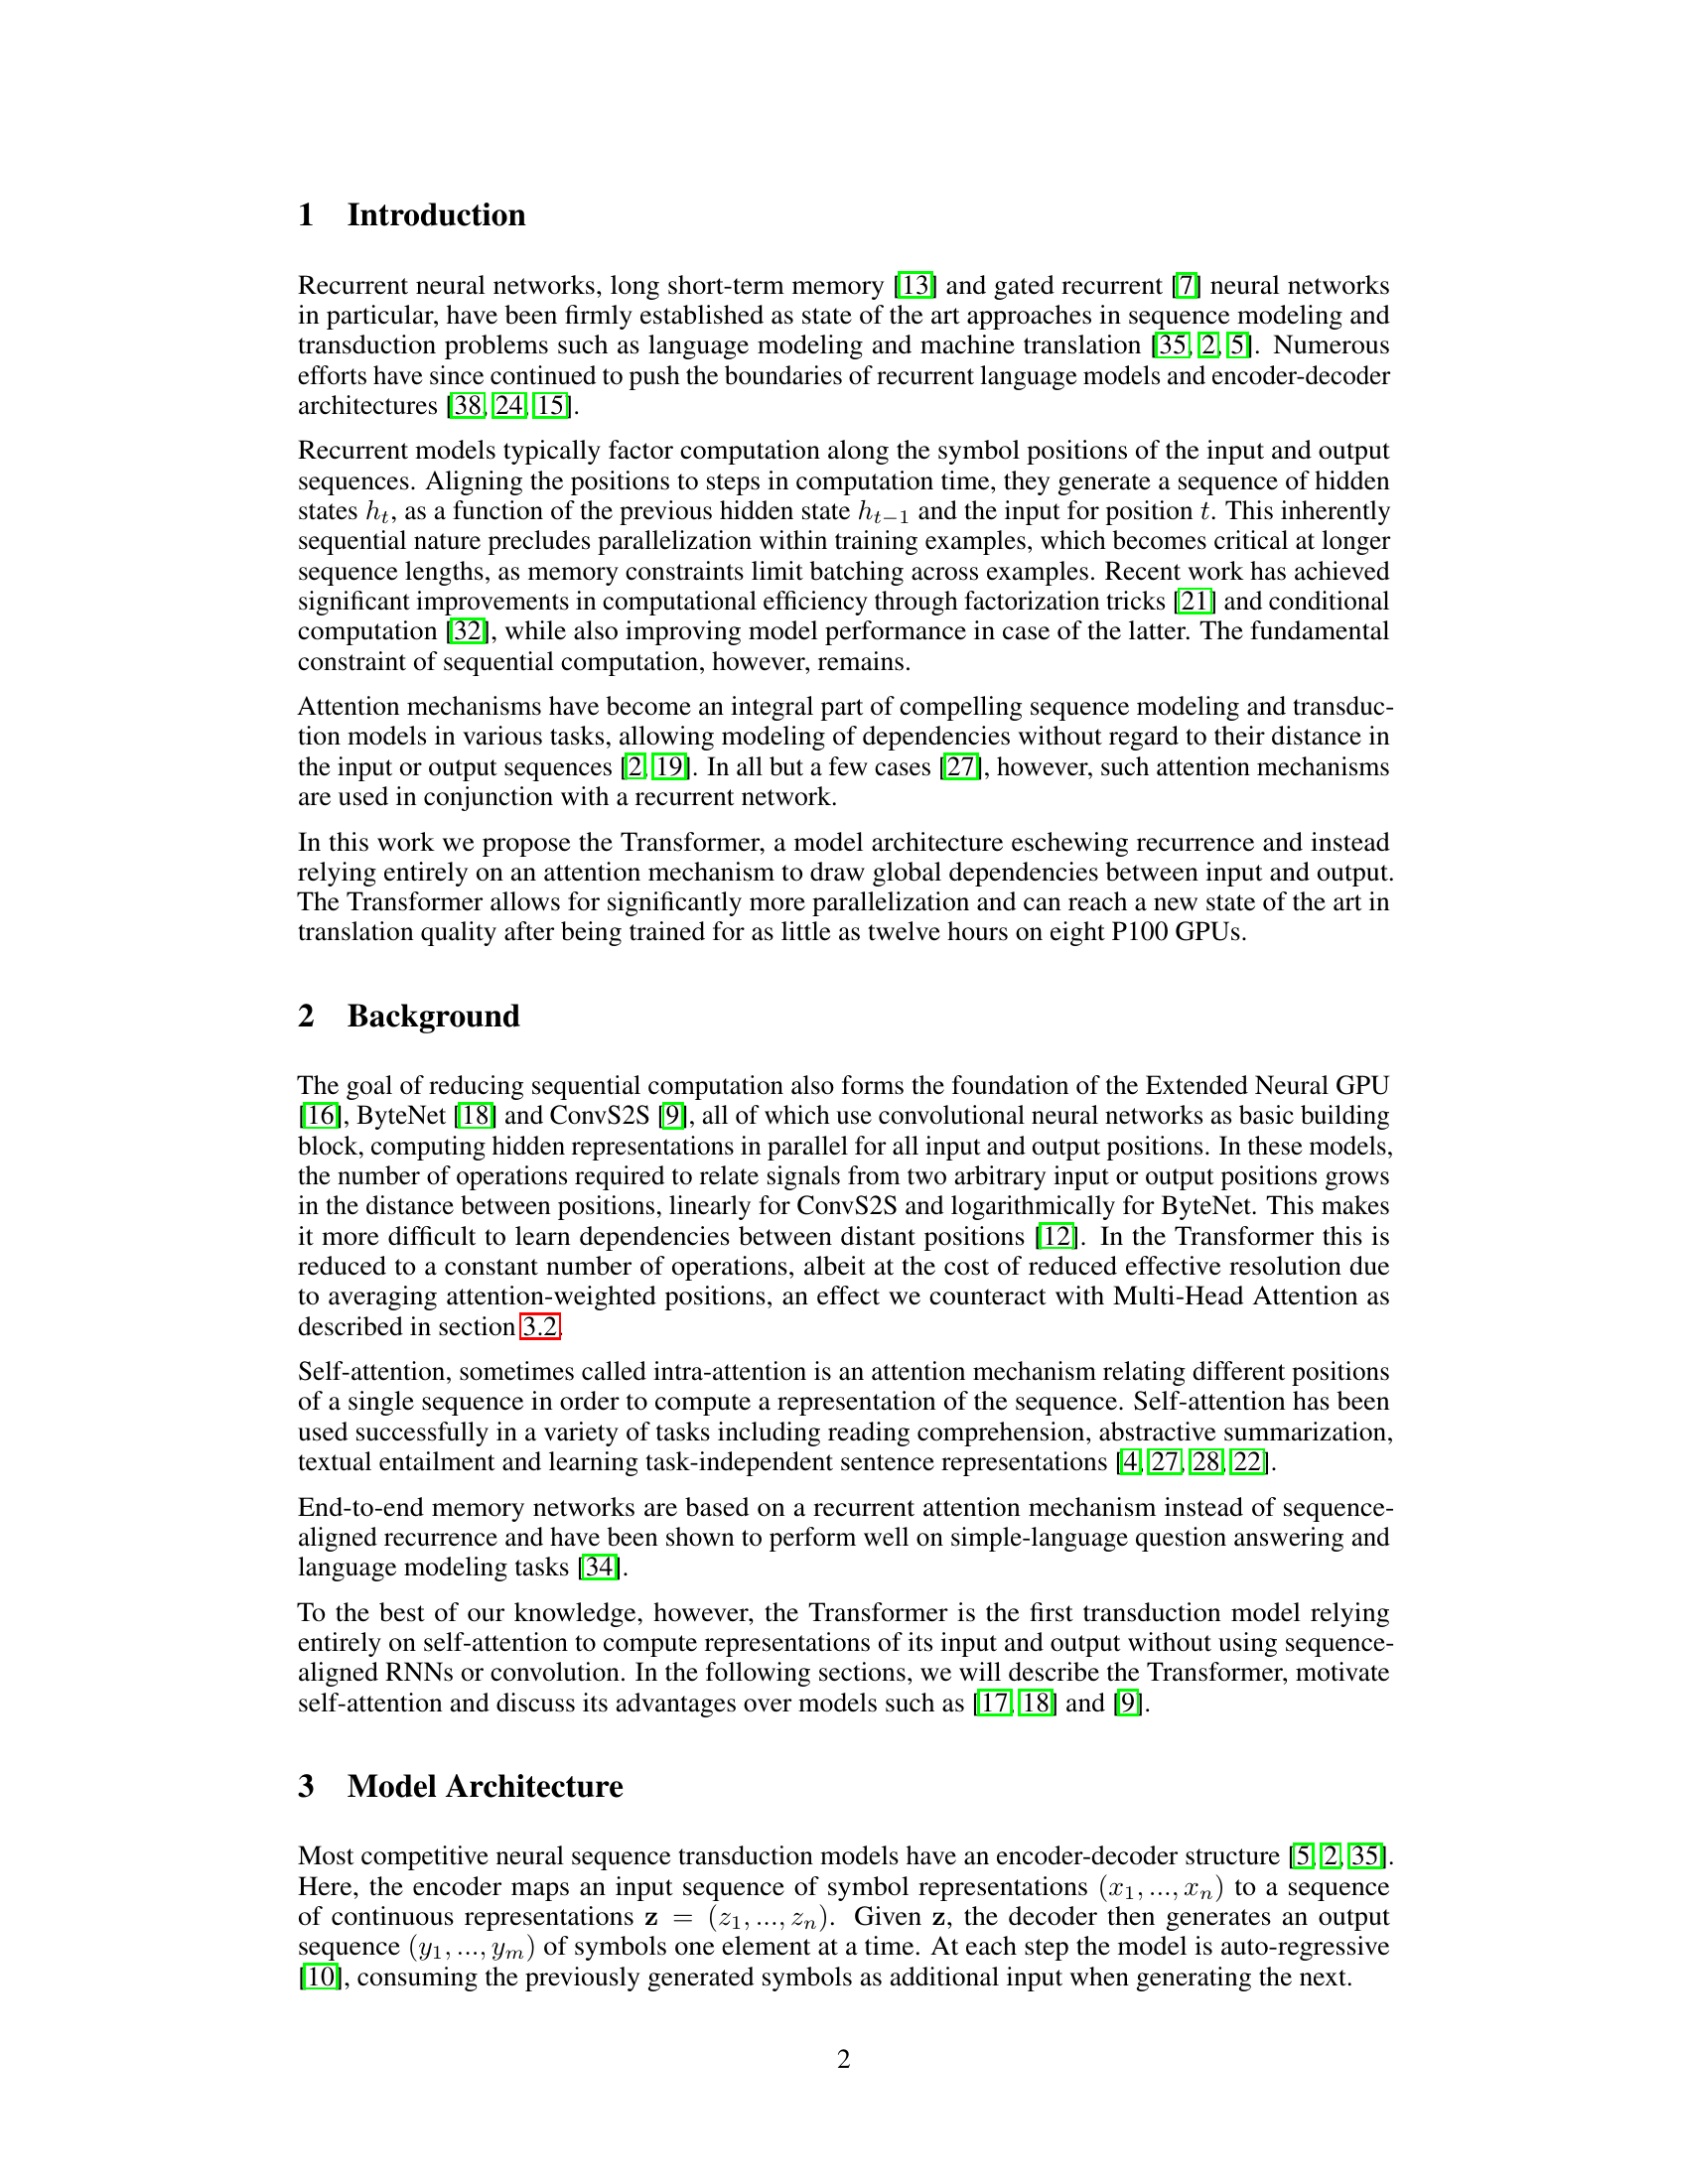

In [ ]:
# 변환된 이미지 확인
images[1]

In [ ]:
# 다음 단계를 위해 이미지 파일 로컬에 저장
for i, image in enumerate(images):
    image.save(f"page_{str(i)}.jpg", "JPEG")

## (사용X) 1.2. Image-to-Text

`Image-to-Text`는 앞서 저장한 이미지 파일에서 텍스트를 추출하는 단계입니다. <br>
본 튜토리얼에서는 [`Google OCR`](https://cloud.google.com/vision/docs/ocr)을 활용하며, 기호에 따라 다른 OCR 기술 (e.g. [HuggingFace](https://huggingface.co/), [Tesseract](https://github.com/tesseract-ocr/tesseract), ...) 을 활용하실 수도 있습니다.

https://yunwoong.tistory.com/148 를 참고하여 API키 발급

In [ ]:
!pip install opencv-contrib-python
!pip install --upgrade google-cloud-vision
!pip install --upgrade google-cloud-speech
!pip install --upgrade google-cloud-language
!pip install --upgrade google-cloud-texttospeech

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.1/444.1 kB 7.4 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.2/275.2 kB 3.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: google-cloud-language
    Found existing installation: google-cloud-language 2.9.1
    Uninstalling google-cloud-language-2.9.1:
      Successfully uninstalled google-cloud-language-2.9.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/sample_data/psychic-bliss-248504-c74da743edee.json"

In [ ]:
!echo $GOOGLE_APPLICATION_CREDENTIALS

/content/sample_data/psychic-bliss-248504-c74da743edee.json


In [ ]:
# Google OCR 라이브러리 임포트
import io
from tqdm import tqdm
from google.cloud import vision

client = vision.ImageAnnotatorClient()

In [ ]:
# Google OCR을 활용하여 이미지 파일에서 텍스트를 추출하는 메서드
def detect_text(path: str):
    with io.open(path, "rb") as image_file:
        content = image_file.read()

    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    return response.full_text_annotation

In [ ]:
detect_text("page_1.jpg").text

'1 Introduction\nRecurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks\nin particular, have been firmly established as state of the art approaches in sequence modeling and\ntransduction problems such as language modeling and machine translation [35 25. Numerous\nefforts have since continued to push the boundaries of recurrent language models and encoder-decoder\narchitectures [38 24 15.\nRecurrent models typically factor computation along the symbol positions of the input and output\nsequences. Aligning the positions to steps in computation time, they generate a sequence of hidden\nstates ht, as a function of the previous hidden state ht-1 and the input for position t. This inherently\nsequential nature precludes parallelization within training examples, which becomes critical at longer\nsequence lengths, as memory constraints limit batching across examples. Recent work has achieved\nsignificant improvements in computational efficiency through f

403 PermissionDenied 에러가 나면 Cloud Vision API 사용 설정을 안한 것 입니다.

Google OCR에서 내려준 결과를 곧바로 활용할 경우 위 예시와 같이 각 행의 마지막에 위치한 **띄어쓰기**, **개행** 등의 *Break* 정보가 유실된 상태의 텍스트 (e.g. `Numerous` 뒤에 불필요한 개행문자가 포함) 를 얻게 됩니다.<br>
Google도 이러한 점을 고려해 [**Break Detection**](https://cloud.google.com/dotnet/docs/reference/Google.Cloud.Vision.V1/latest/Google.Cloud.Vision.V1.TextAnnotation.Types.DetectedBreak.Types.BreakType) 기술을 제공하고 있습니다. <br>
따라서 *Break Detection* 에 의해 추론된 결과에 따라 **띄어쓰기**, **개행** 등을 올바르게 정렬하는 후처리 작업을 진행합니다.

In [ ]:
breaks = vision.TextAnnotation.DetectedBreak.BreakType

In [ ]:
dir(breaks)

['EOL_SURE_SPACE',
 'HYPHEN',
 'LINE_BREAK',
 'SPACE',
 'SURE_SPACE',
 'UNKNOWN',
 '__class__',
 '__doc__',
 '__members__',
 '__module__']

In [ ]:
# Break Detection 결과 적용을 위한 후처리 메서드
def postprocess_ocr(annotation) -> str:
    text = ""

    for page in annotation.pages:
        for block in page.blocks:
            for paragraph in block.paragraphs:
                for word in paragraph.words:
                    for symbol in word.symbols:
                        detected_break = symbol.property.detected_break
                        detected_break_type = detected_break.type_

                        if detected_break_type == breaks.UNKNOWN:
                            text += symbol.text
                        elif detected_break_type == breaks.SPACE:
                            text += f"{symbol.text} "
                        elif detected_break_type == breaks.SURE_SPACE:
                            text += f"{symbol.text} "
                        elif detected_break_type == breaks.EOL_SURE_SPACE:
                            text += f"{symbol.text} "
                        elif detected_break_type == breaks.HYPHEN:
                            text += f"{symbol.text}-"
                        elif detected_break_type == breaks.LINE_BREAK:
                            text += f"{symbol.text}\n"

    return text.strip()

*Break Detection* 정제 로직이 적용된 후처리 결과는 아래와 같습니다.

In [ ]:
postprocess_ocr(detect_text("page_1.jpg"))

'1 Introduction\nRecurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular, have been firmly established as state of the art approaches in sequence modeling and transduction problems such as language modeling and machine translation [35 25. Numerous efforts have since continued to push the boundaries of recurrent language models and encoder-decoder architectures [38 24 15.\nRecurrent models typically factor computation along the symbol positions of the input and output sequences. Aligning the positions to steps in computation time, they generate a sequence of hidden states ht, as a function of the previous hidden state ht-1 and the input for position t. This inherently sequential nature precludes parallelization within training examples, which becomes critical at longer sequence lengths, as memory constraints limit batching across examples. Recent work has achieved significant improvements in computational efficiency through factorizat

이제 모든 데이터에 **OCR**과 *Break Detection* 후처리를 적용합니다.

In [ ]:
documents = []

In [ ]:
for i in tqdm(range(len(images))):
    documents.append(
        {
            "page": int(i+1),
            "text": postprocess_ocr(detect_text(f"page_{i}.jpg")),
        }
    )

100%|██████████| 15/15 [00:13<00:00,  1.11it/s]


In [ ]:
documents[0]

{'page': 1,
 'text': 'arXiv:1706.03762v7 [cs.CL] 2 Aug 2023\nProvided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works.\nAttention Is All You Need\nAshish Vaswani* Google Brain avaswani@google.com\nLlion Jones* Google Research llion@google.com\nNoam Shazeer* Google Brain noam@google.com\nNiki Parmar* Google Research nikip@google.com\nAidan N. Gomez* † University of Toronto aidan@cs.toronto.edu\nIllia Polosukhin* *\nillia.polosukhin@gmail.com\nAbstract\nWork performed while at Google Brain.\n#Work performed while at Google Research.\nJakob Uszkoreit* Google Research usz@google.com\nŁukasz Kaiser* Google Brain\nlukaszkaiser@google.com\nThe dominant sequence transduction models are based on complex recurrent or convolutional neural networks that include an encoder and a decoder. The best performing models also connect the encoder and decoder through an attention mechanism. We

In [ ]:
len(documents)

15

- 실험 계획
1. 세분화된 인덱스에 대해, 그냥 RAG 할 때, 정답률이 어느 정도인지?
2. 선지 해설을 함께 넣으면, 성능이 향상되는지?
2. Reranking을 하면, 어느 정도로 향상이 되는지?

# 1 . Load DataSet



### 1.1. Load CSV Dataset
  - 시트 종류
  : ['사상가', '주제', '교과서 - 정의', '교과서 - 텍스트', '원전 - 텍스트', '질답 - 네아니오', '질답 - 서술', '평가원', '참조']

In [ ]:
# 구글 계정 마운트
from google.colab import drive
drive.mount('/content/drive')
!pip install firebase-admin > /dev/null 2>&1

Mounted at /content/drive


In [ ]:
import pandas as pd

# 열 최대 너비 설정: None은 제한 없음을 의미합니다.
pd.set_option('display.max_colwidth', None)

# 출력할 최대 행의 수 설정: None은 제한 없음을 의미합니다.
pd.set_option('display.max_rows', None)

In [ ]:
# 파일 이름

### rough
# file_name = "시민_불복종_DB"

### detail
file_name = "시민_불복종_DB_0219"

# Excel 파일 로드
xlsx_file = pd.ExcelFile(f'/content/drive/MyDrive/Colab_Notebooks/DA Matching Algorithm/AI/HDchatbot/dataset/{file_name}.xlsx')

# 시트 이름 목록 추출
sheet_names = xlsx_file.sheet_names

print(sheet_names)

['사상가', '주제', '교과서 - 정의', '교과서 - 텍스트', '원전 - 텍스트', '질답 - 네아니오', '질답 - 서술', '평가원', '참조']


#### 데이터

- Query - 평가원 선지
- Answer - 근거(교과서, 원전, 평가원, 기타 등)
- DB - (교과서 - 텍스트)/ (원전 - 텍스트)/ (평가원 - 해설)

(*전제 : 질문 핵심키워드 추출 및 주제 사전 설정으로 주제로 범위 특정 가능)

In [ ]:
sheet_name = "평가원" # Problem

datasetP = pd.read_excel(f'/content/drive/MyDrive/Colab_Notebooks/DA Matching Algorithm/AI/HDchatbot/dataset/{file_name}.xlsx', sheet_name=sheet_name)
datasetP.head()

,ID,문제 - 텍스트,문제 - 이미지,사상가,선지 - 번호,선지 - 문장,정오판단,난이도,선지 - 해설,근거 - 교과서,근거 - 원전,근거 - 평가원,근거 - 기타,단원,주제
0,P-1-1-1,다음 서양 사상가가 부정의 대답을 할 질문으로 가장 적절한 것은? [3점] [201...,NaN,롤스,1,시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가?,O,중,롤스는 체제의 합법성을 인정하는 시민들에 의해서만 시민 불복종이 발생한다고 본다. ...,NaN,O-1-1-11-7,P-1-1-17\nP-1-1-21,NaN,3-2-2단원,1
1,P-1-1-2,다음 서양 사상가가 부정의 대답을 할 질문으로 가장 적절한 것은? [3점] [201...,NaN,롤스,2,시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가?,O,하,롤스는 시민 불복종의 의도가 ‘다수의 정의감(공동체의 정의감)에 호소하려는 것’이라...,NaN,O-1-1-17-3,NaN,NaN,3-2-2단원,1
2,P-1-1-3,다음 서양 사상가가 부정의 대답을 할 질문으로 가장 적절한 것은? [3점] [201...,NaN,롤스,3,시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가?,O,하,롤스는 시민 불복종의 의도가 ‘다수의 정의감(공동체의 정의감)에 호소하려는 것’이라...,NaN,O-1-1-20,NaN,NaN,3-2-2단원,1
3,P-1-1-4,다음 서양 사상가가 부정의 대답을 할 질문으로 가장 적절한 것은? [3점] [201...,NaN,롤스,4,시민 불복종의 목적에서 정부 정책의 개혁은 제외되어야 하는가?,X,하,롤스는 시민 불복종의 의도가 부정의한 법이나 정책을 개혁하려는 것이라고 본다.,NaN,O-1-1-13-1,P-1-1-17,NaN,3-2-2단원,1
4,P-1-1-5,다음 서양 사상가가 부정의 대답을 할 질문으로 가장 적절한 것은? [3점] [201...,NaN,롤스,5,시민 불복종은 어떠한 합법적 방법도 효과가 없을 때 행해져야 하는가?,O,하,"롤스는 시민 불복종의 정당화 조건으로 ‘최후의 수단성’을 주장한다. 즉, 부정의한 ...",BT-1-1-5\nBT-1-1-11,O-1-1-24-1,NaN,NaN,3-2-2단원,1


In [ ]:
sheet_name = '원전 - 텍스트' # Origin Text

datasetO = pd.read_excel(f'/content/drive/MyDrive/Colab_Notebooks/DA Matching Algorithm/AI/HDchatbot/dataset/{file_name}.xlsx', sheet_name=sheet_name)
datasetO.rename(columns={"ID" : "ID_large", "ID 소번호" : "ID"}, inplace=True)
datasetO.head()

,ID_large,ID,텍스트,핵심 ID,사상가,책이름,주제
0,O-1-1-1,O-1-1-1-1,정의로운 체제 아래서 제정된 정의로운 법을 지켜야 할 이유를 설명하는 데는 아무런 ...,O-1-1-1-6,1,정의론,1
1,NaN,O-1-1-1-2,"일반 시민들은 정의의 의무에 구속되며, 유리한 직책과 지위를 얻은 사람들이나 자신의...",O-1-1-1-6,1,정의론,1
2,NaN,O-1-1-1-3,진정한 문제는 우리가 어떤 조건 아래서 어느 정도까지 부정의한 체제를 따라야만 하는...,O-1-1-1-6,1,정의론,1
3,NaN,O-1-1-1-4,그런데 때로는 체제가 부정의한 경우엔 그것을 따라야 할 필요가 없다고 말해지기도 한...,O-1-1-1-6,1,정의론,1
4,NaN,O-1-1-1-5,일반적으로 말해서 법의 부정의가 그것을 지키지 않아도 될 충분조건이 아닌 것은 (기...,O-1-1-1-6,1,정의론,1


In [ ]:
sheet_name = '교과서 - 텍스트' # Book Text

datasetBT = pd.read_excel(f'/content/drive/MyDrive/Colab_Notebooks/DA Matching Algorithm/AI/HDchatbot/dataset/{file_name}.xlsx', sheet_name=sheet_name)
datasetBT.head()

,ID,텍스트,사상가,출처,단원,주제
0,BT-1-1-1,"롤스는 개인의 양심보다 사회적 다수의 정의관에 주목하였는데, 평등한 자유의 원칙이나...",롤스,천재,3-3-2단원,1
1,BT-1-1-2,시민 불복종을 하는 사람은 자신이 생각하는 정의에 관한 규범적·윤리적 근거를 널리 ...,롤스,미래앤,3-3-2단원,1
2,BT-1-1-3,시민 불복종은 행위의 목적이 정당해야 한다.,롤스,미래앤,3-3-2단원,1
3,BT-1-1-4,시민 불복종은 비폭력적이어야 한다,롤스,미래앤,3-3-2단원,1
4,BT-1-1-5,시민 불복종은 최후의 수단이어야 한다.,롤스,미래앤,3-3-2단원,1


In [ ]:
sheet_name = '교과서 - 정의' #Book Definition

datasetBD = pd.read_excel(f'/content/drive/MyDrive/Colab_Notebooks/DA Matching Algorithm/AI/HDchatbot/dataset/{file_name}.xlsx', sheet_name=sheet_name)
datasetBD.head()

,ID,단어,정의,사상가,단원,주제
0,BD-1-1-1,시민 불복종,"시민 참여의 한 형태로, 정의롭지 못한 법을 개정하거나 정부 정책을 변혁하려는 목적...",롤스,3-3-2단원,시민 불복종
1,BD-1-1-2,시민 불복종,사회의 정의롭지 않은 법률이나 정책 또는 명령을 의도적으로 거부하는 시민 저항 운동,롤스,3-3-3단원,시민 불복종
2,BD-1-1-3,시민 불복종,개인의 기본권을 침해하는 정의롭지 못한 법과 정책을 변화시키려는 목적을 가지고 의도...,롤스,3-3-4단원,시민 불복종
3,BD-1-1-4,시민 불복종,시민들의 인권이 보장되고 정의가 공정하게 실현되는 바람직한 국가를 만들고자 하는 시...,롤스,3-3-5단원,시민 불복종
4,BD-1-1-5,시민 불복종,법이나 정부의 정책에 변화를 가져올 목적으로 행해지는 공공적이고 비폭력적이며 양심적...,롤스,3-3-6단원,시민 불복종


#### - 메타 데이터
1. 사상가
2. 주제
3. 단원/ 책이름(원전)


In [ ]:
sheet_name = '사상가' #Thinker

datasetT = pd.read_excel(f'/content/drive/MyDrive/Colab_Notebooks/DA Matching Algorithm/AI/HDchatbot/dataset/{file_name}.xlsx', sheet_name=sheet_name)
dict_Id_T = datasetT.set_index("ID")['사상가'].to_dict()

In [ ]:
sheet_name = '주제' #Subject

datasetS = pd.read_excel(f'/content/drive/MyDrive/Colab_Notebooks/DA Matching Algorithm/AI/HDchatbot/dataset/{file_name}.xlsx', sheet_name=sheet_name)
dict_Id_S = datasetS.set_index("ID")['주제'].to_dict()

#### - 데이터 로드
  1. 삭제할 데이터

In [ ]:
### 교과서 DB와 근거 목록에서 모두 삭제
deleteBT = ["BT-1-1-2", "BT-1-1-25", "BT-1-1-26", "BT-1-1-27", "BT-1-1-28"]
### 근거 변경
reviseAnswer = {"P-1-1-2" : ["BT-1-1-37", "BT-1-1-39"], "P-1-1-24" : ['O-1-1-13', 'O-1-1-16-1']}

In [ ]:
from copy import deepcopy

datasetP['사상가'] = len(datasetP) * ["롤스"]
### query
df_query = deepcopy(datasetP[['ID', '선지 - 문장'] + ['사상가', '단원', '주제']]).set_index("ID")
### answer
# answer에는 metadata가 필요X
df_answer = deepcopy(datasetP.set_index("ID")[[col for col in datasetP.columns if '근거' in col]].fillna("").apply(lambda x: str(x[0] + '\n' + x[1] + '\n' + x[2]).split("\n"), axis=1))
df_answer = df_answer.apply(lambda x: [idx for idx in list(x) if idx != ""]) # 빈스트링 제외
df_answer = df_answer.apply(lambda x: [idx for idx in list(x) if idx not in deleteBT]) # 근거 삭제
df_answer["P-1-1-24"] = reviseAnswer["P-1-1-24"] # 근거 변경
df_answer["P-1-1-2"] = reviseAnswer["P-1-1-2"]
### db_BT
df_dbBT = deepcopy(datasetBT[['ID', '텍스트'] + ['사상가', '단원', '주제']].set_index("ID"))
df_dbBT.drop(deleteBT, axis=0, inplace=True) # db 삭제
### db_O
df_dbO = deepcopy(datasetO[['ID', '텍스트'] + ['사상가', '책이름', '주제']].set_index("ID"))
df_dbO['사상가'] = df_dbO['사상가'].map(dict_Id_T)
df_dbO.dropna(subset=['텍스트'], inplace=True)
### db_P
df_dbP = deepcopy(datasetP[['ID', '선지 - 문장', '정오판단', '선지 - 해설'] + ['사상가', '단원', '주제']].set_index("ID"))
##### 선지 - 문장
df_dbPI = deepcopy(df_dbP[['선지 - 문장', '정오판단', '사상가', '단원', '주제']])
##### 선지 - 해설
df_dbPE = deepcopy(df_dbP[['선지 - 해설', '정오판단', '사상가', '단원', '주제']])

##### 정오를 반영한 선지
df_dbPOX = deepcopy(df_dbPI)
df_dbPOX['선지 - 문장'] = df_dbPOX[['선지 - 문장', '정오판단']].apply(lambda x: x[0][:-1] + "는 틀리다." if x[1] == "X" else x[0], axis=1)
df_dbPOX.rename(columns={'선지 - 문장': '텍스트'}, inplace=True)

#### - result

In [ ]:
df_query.head(3)

,선지 - 문장,사상가,단원,주제
ID,,,,
P-1-1-1,시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가?,롤스,3-2-2단원,1
P-1-1-2,시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가?,롤스,3-2-2단원,1
P-1-1-3,시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가?,롤스,3-2-2단원,1


In [ ]:
df_answer.head(3)

ID
P-1-1-1    [O-1-1-11-7, P-1-1-17, P-1-1-21]
P-1-1-2                        [O-1-1-17-3]
P-1-1-3                          [O-1-1-20]
dtype: object

In [ ]:
df_dbBT.head(3)

,텍스트,사상가,단원,주제
ID,,,,
BT-1-1-1,"롤스는 개인의 양심보다 사회적 다수의 정의관에 주목하였는데, 평등한 자유의 원칙이나...",롤스,3-3-2단원,1
BT-1-1-2,시민 불복종을 하는 사람은 자신이 생각하는 정의에 관한 규범적·윤리적 근거를 널리 ...,롤스,3-3-2단원,1
BT-1-1-3,시민 불복종은 행위의 목적이 정당해야 한다.,롤스,3-3-2단원,1


In [ ]:
df_dbO.head(3)

,텍스트,사상가,책이름,주제
ID,,,,
O-1-1-1-1,정의로운 체제 아래서 제정된 정의로운 법을 지켜야 할 이유를 설명하는 데는 아무런 ...,롤스,정의론,1
O-1-1-1-2,"일반 시민들은 정의의 의무에 구속되며, 유리한 직책과 지위를 얻은 사람들이나 자신의...",롤스,정의론,1
O-1-1-1-3,진정한 문제는 우리가 어떤 조건 아래서 어느 정도까지 부정의한 체제를 따라야만 하는...,롤스,정의론,1


In [ ]:
df_dbP.head(3)

,선지 - 문장,정오판단,선지 - 해설,사상가,단원,주제
ID,,,,,,
P-1-1-1,시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가?,O,롤스는 체제의 합법성을 인정하는 시민들에 의해서만 시민 불복종이 발생한다고 본다. ...,롤스,3-2-2단원,1
P-1-1-2,시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가?,O,롤스는 시민 불복종의 의도가 ‘다수의 정의감(공동체의 정의감)에 호소하려는 것’이라...,롤스,3-2-2단원,1
P-1-1-3,시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가?,O,롤스는 시민 불복종의 의도가 ‘다수의 정의감(공동체의 정의감)에 호소하려는 것’이라...,롤스,3-2-2단원,1


- 엑셀 이미지 추출 PASS
  - vision data 사용 가능할까?

In [ ]:
# from openpyxl import load_workbook
# from PIL import Image
# import io

# # 엑셀 파일 로드
# wb = load_workbook('/content/drive/MyDrive/Colab_Notebooks/DA Matching Algorithm/AI/HDchatbot/dataset/시민_불복종_DB.xlsx', data_only=True)
# sheet = wb['평가원']

# # 시트의 이미지 추출
# for img in sheet._images:
#     # img 객체에서 이미지 데이터를 추출
#     image_stream = io.BytesIO(img.anchor._from._parent._images[0].ref)

#     # PIL 이미지 객체로 변환
#     pil_image = Image.open(image_stream)

#     # 이미지 표시
#     display(pil_image)

# 2 . Text Pre-processing

언어 모델이 보다 잘 이해할 수 있는 단위로 텍스트 데이터를 **정제**하는 과정입니다. <br>
해당 과정에는 불필요한 텍스트를 제거하는 `Text Cleansing`, 텍스트를 보다 작은 의미 단위로 분할하는 `Text Chunking` 로직이 포함됩니다. <br>
일반적으로 문서 전처리에 따라 **서비스 품질이 크게 달라질 수 있기에** 이 과정에 튜토리얼 코드 이상으로 많은 공을 들이는게 좋습니다.

## 2.1. Text Cleansing

`Text Cleansing`은 문서 활용과 벡터화에 있어 불필요한 문자열을 제거하는 단계입니다. <br>
본 로직은 도메인 특성에 따라 다르게 작성될 수 있습니다. 본 튜토리얼에서는 **최소 단위 정제 작업**만 진행합니다. <br>
활용하시는 목적에 따라 아래 메서드에 추가 로직을 작성해주시면 됩니다.

In [ ]:
import re
from typing import Optional

citation_pattern = r"\[\d+\]"

def cleanse_text(text: str) -> Optional[str]:
    # 길이 단위 필터링
    if len(text) <= 5:
        return None

    # 각주 제거
    text = re.sub(citation_pattern, "", text)

    # 불필요하게 나열된 여러 개 공백 제거
    text = re.sub(" +", " ", text)

    # \t 탭 기호 제거
    text = text.replace('\t', ' ') # .replace('\n', ' ')

    # 문자열의 앞뒤 공백 제거
    text = text.strip()

    # 한글, 공백, 마침표만 남기고 나머지는 제거
    text = re.sub('[^가-힣\s.]', '', text)

    return text

가볍게 작성한 `cleanse_text` 함수에 더러운 문자열을 넘겨 봅니다.

#### - Test

In [ ]:
test_text = dataset_problem.loc[0, '선지 - 해설']
test_text

'롤스는 체제의 합법성을 인정하는 시민들에 의해서만 시민 불복종이 발생한다고 본다. 제시문에서도 알 수 있듯 시민 불복종이 성립할 수 있는 사회는 \n‘거의 정의로운 사회’ 뿐이다. 거의 정의로운 사회는 공적 정의관이 확립되어 있는 대체로 질서 정연한 사회로서, 합법적인 체제이다. 롤스는 거의 정의로운 사회에서 시민들이 체제가 합법적이라는 사실을 인지하고 있다고 주장하며, 시민들은 이러한 배경 하에서 심각하게 부정의한 법이나 정책, 제도에 대해 시민 불복종을 행한다고 본다.'

In [ ]:
cleanse_text(test_text)

'롤스는 체제의 합법성을 인정하는 시민들에 의해서만 시민 불복종이 발생한다고 본다 제시문에서도 알 수 있듯 시민 불복종이 성립할 수 있는 사회는 \n거의 정의로운 사회 뿐이다 거의 정의로운 사회는 공적 정의관이 확립되어 있는 대체로 질서 정연한 사회로서 합법적인 체제이다 롤스는 거의 정의로운 사회에서 시민들이 체제가 합법적이라는 사실을 인지하고 있다고 주장하며 시민들은 이러한 배경 하에서 심각하게 부정의한 법이나 정책 제도에 대해 시민 불복종을 행한다고 본다'

In [ ]:
dirty_text = """We show that the  Transformer generalizes well to other tasks by applying it successfully to English constituency parsing both with large    and limited   training data.\n1 Introduction\nRecurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular, have been firmly established as state of the art approaches in sequence modeling and\n*Equal contribution. Listing order is random.   Jakob proposed replacing RNNs with self-attention and started   the effort to evaluate this idea."""

In [ ]:
dirty_text

'We show that the  Transformer generalizes well to other tasks by applying it successfully to English constituency parsing both with large    and limited   training data.\n1 Introduction\nRecurrent neural networks, long short-term memory [13] and gated recurrent [7] neural networks in particular, have been firmly established as state of the art approaches in sequence modeling and\n*Equal contribution. Listing order is random.   Jakob proposed replacing RNNs with self-attention and started   the effort to evaluate this idea.'

In [ ]:
cleanse_text(dirty_text)

'We show that the Transformer generalizes well to other tasks by applying it successfully to English constituency parsing both with large and limited training data.\n1 Introduction\nRecurrent neural networks, long short-term memory and gated recurrent neural networks in particular, have been firmly established as state of the art approaches in sequence modeling and\n*Equal contribution. Listing order is random. Jakob proposed replacing RNNs with self-attention and started the effort to evaluate this idea.'

#### - Text Cleanser

In [ ]:
df_query['선지 - 문장'] = deepcopy(pd.Series(df_query['선지 - 문장']).apply(cleanse_text))
df_dbBT['텍스트'] = deepcopy(pd.Series(df_dbBT['텍스트']).apply(cleanse_text))###
df_dbO['텍스트'] = deepcopy(pd.Series(df_dbO['텍스트']).apply(cleanse_text))###
df_dbP['선지 - 문장'] = deepcopy(pd.Series(df_dbP['선지 - 문장']).apply(cleanse_text))
df_dbP['선지 - 해설'] = deepcopy(pd.Series(df_dbP['선지 - 해설']).apply(cleanse_text))
df_dbPOX['텍스트'] = deepcopy(pd.Series(df_dbPOX['텍스트']).apply(cleanse_text))

##### - result

In [ ]:
df_query.head(3)

,선지 - 문장,사상가,단원,주제
ID,,,,
P-1-1-1,시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가,롤스,3-2-2단원,1
P-1-1-2,시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가,롤스,3-2-2단원,1
P-1-1-3,시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가,롤스,3-2-2단원,1


In [ ]:
df_answer.head(3)

ID
P-1-1-1    [O-1-1-11-7, P-1-1-17, P-1-1-21]
P-1-1-2                        [O-1-1-17-3]
P-1-1-3                          [O-1-1-20]
dtype: object

In [ ]:
df_dbBT.head(3)

,텍스트,사상가,단원,주제
ID,,,,
BT-1-1-1,롤스는 개인의 양심보다 사회적 다수의 정의관에 주목하였는데 평등한 자유의 원칙이나 ...,롤스,3-3-2단원,1
BT-1-1-2,시민 불복종을 하는 사람은 자신이 생각하는 정의에 관한 규범적윤리적 근거를 널리 알...,롤스,3-3-2단원,1
BT-1-1-3,시민 불복종은 행위의 목적이 정당해야 한다.,롤스,3-3-2단원,1


In [ ]:
df_dbO.head(3)

,텍스트,사상가,책이름,주제
ID,,,,
O-1-1-1-1,정의로운 체제 아래서 제정된 정의로운 법을 지켜야 할 이유를 설명하는 데는 아무런 ...,롤스,정의론,1
O-1-1-1-2,일반 시민들은 정의의 의무에 구속되며 유리한 직책과 지위를 얻은 사람들이나 자신의 ...,롤스,정의론,1
O-1-1-1-3,진정한 문제는 우리가 어떤 조건 아래서 어느 정도까지 부정의한 체제를 따라야만 하는...,롤스,정의론,1


In [ ]:
df_dbP.head(3)

,선지 - 문장,정오판단,선지 - 해설,사상가,단원,주제
ID,,,,,,
P-1-1-1,시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가,O,롤스는 체제의 합법성을 인정하는 시민들에 의해서만 시민 불복종이 발생한다고 본다. ...,롤스,3-2-2단원,1
P-1-1-2,시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가,O,롤스는 시민 불복종의 의도가 다수의 정의감공동체의 정의감에 호소하려는 것이라고 본다...,롤스,3-2-2단원,1
P-1-1-3,시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가,O,롤스는 시민 불복종의 의도가 다수의 정의감공동체의 정의감에 호소하려는 것이라고 본다...,롤스,3-2-2단원,1


계획한 대로 불필요한 주석 기호와 공백 등이 사라지는 것을 확인할 수 있습니다.

## 2.2. Text Chunking

- 1개의 텍스트 임베딩 벡터에 1개의 의미만! 그래야 RAG의 성능이 높아진다!

`Text Chunking`은 하나의 벡터에 명료하고 확실한 정보를 담기 위해 텍스트를 **의미적으로 자르는 단계**입니다. <br>
대개 문단 단위로 자르는 로직, 토큰 갯수로 자르는 로직 등이 있으며 본 튜토리얼에서는 편의상 **토큰 갯수**로 자르는 로직을 구현합니다. <br>
`Text Cleansing`과 마찬가지로 목적에 따라 다른 분할 로직을 활용하시는게 바람직합니다.

**OpenAI**는 토큰 단위 비즈니스 로직을 지원하기 위해 문장의 토큰 갯수를 반환해주는 [`tiktoken`](https://github.com/openai/tiktoken) 라이브러리를 제공합니다. <br>
본 튜토리얼에서는 `tiktoken`을 활용해 토큰 갯수 기반 청킹을 적용합니다.

### 1 . OpenAI tokenzier

In [ ]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.6 MB/s eta 0:00:00


In [ ]:
# tiktoken 라이브러리 임포트
import tiktoken

In [ ]:
# from tiktoken._educational import *

# # Train a BPE tokeniser on a small amount of text
# enc = train_simple_encoding()

# # Visualise how the GPT-4 encoder encodes text
# enc = SimpleBytePairEncoding.from_tiktoken("cl100k_base")
# # enc.encode("hello world aaaaaaaaaaaa")

OpenAI tokenizer `tiktoken` 라이브러리와 BPE 개념

- 이 tiktoken라이브러리는 OpenAI 모델과 함께 사용하도록 설계된 빠른 BPE(바이트 쌍 인코딩) 토크나이저이며 인코딩이 포함되어 있습니다 cl100k_base. 이 인코딩은 GPT-4와 같은 다양한 모델과 함께 사용되어 텍스트 데이터를 효율적으로 토큰화하고 인코딩하는 방법을 제공합니다. 이 라이브러리는 다목적이며 영어가 아닌 언어를 포함한 다양한 유형의 텍스트를 처리할 수 있습니다.

-  일반적으로 BPE 토크나이 tiktoken저는 텍스트를 더 작은 하위 단어 단위로 분해하여 다양한 언어의 텍스트를 토큰화할 수 있습니다. BPE는 언어에 구애받지 않고 텍스트가 토크나이저의 훈련 데이터에 없더라도 텍스트를 토큰화할 수 있다는 점을 고려하면 이 프로세스는 한국어 텍스트에도 적용됩니다.

- BPE(바이트 쌍 인코딩)는 텍스트를 토큰으로 분해하는 고유한 메커니즘으로 인해 언어에 구애받지 않는 토큰화 방법으로 작동합니다. 이는 텍스트의 모든 고유 문자를 초기 토큰으로 시작합니다. 그런 다음 가장 빈번하게 인접한 문자 쌍을 연속적으로 병합하여 새 토큰을 형성합니다. 이 과정은 미리 결정된 어휘 크기에 도달할 때까지 계속됩니다. ***BPE는 문자의 언어적 의미보다는 문자 쌍의 빈도에 초점***을 맞추기 때문에 훈련 데이터에 없는 언어를 포함하여 모든 언어의 텍스트를 효과적으로 토큰화할 수 있습니다.

In [ ]:
# ChatGPT 인코딩 로직인 `cl100k_base`를 기본 인코딩으로 설정
tokenizer = tiktoken.get_encoding("cl100k_base")

In [ ]:
# 입력 문장의 토큰 갯수를 카운트 하는 메서드
def num_tokens_from_text(text: str) -> int:
    num_tokens = len(tokenizer.encode(text))
    return num_tokens

### 2 . Clova Tokenizer

In [ ]:
# -*- coding: utf-8 -*-

import base64
import json
import http.client


class TokenizerExecutor:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def _send_request(self, completion_request):
        headers = {
            'Content-Type': 'application/json; charset=utf-8',
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id
        }

        conn = http.client.HTTPSConnection(self._host)
        conn.request('POST', '/testapp/v1/api-tools/tokenize/LK-D2/adab0ecf466a40528cbb45f090b35112', json.dumps(completion_request), headers)
        response = conn.getresponse()
        result = json.loads(response.read().decode(encoding='utf-8'))
        conn.close()
        return result

    def execute(self, completion_request):
        res = self._send_request(completion_request)
        if res['status']['code'] == '20000':
            return res['result']['numTokens']
        else:
            return 'Error'


if __name__ == '__main__':

    # 입력 문장의 토큰 갯수를 카운트 하는 메서드
    def num_tokens_from_text(text: str) -> int:
        completion_executor = TokenizerExecutor(
        host='clovastudio.apigw.ntruss.com',
        api_key='NTA0MjU2MWZlZTcxNDJiY1aM5JpMNr1vYMQHOi/ifhUlI8DadYG/B7WrQXcfae6Ep+SENO/vJ30WX5njjQoAr83V5n+ELIBCnX8+4mjgpPzdcjtWqs703xqAt4u+9Ue06y/9UnwPBEZpls7eCQR5zChZlGoNK7idWqzmlKtoEq/E6iWgjYtKR0DfQHO8TExu',
        api_key_primary_val = 'GjNgIjD751QAx7ybHMnYyeyUvH4z3qhcPEGqPldN',
        request_id='c103b618b1364f689f85cc45995cb2bb'
        )

        request_data = json.loads(f'''
        {{
          "text" : "{text}"
        }}''', strict=False)

        response_text = completion_executor.execute(request_data)

        return int(response_text)

    ### test
    print(num_tokens_from_text("시민 불복종은 행위의 목적이 정당해야 한다."))


12


### 3 . Text Chunkify

여러 줄로 된 문단을 줄바꿈으로 구분하여, 각각 문장에 대해 텍스트 전처리를 해준 뒤, `text_cleanse`작업!, `CHUNK_SIZE`까지!

이제 각 문서를 개행 단위로 분할한 뒤, `chunk`에 더해가며 `CHUNK_SIZE`를 초과하면 `chunks`에 추가해주는 반복 로직을 수행합니다.

In [ ]:
# clova Embedder의 최대 토큰 갯수 지정
CHUNK_SIZE = 300

In [ ]:
from typing import List
import pandas as pd

def chunkify(text: str) -> List[str]:  # 함수 선언, 입력은 문자열, 반환값은 문자열 리스트
    lines = text.split("\n")  # 입력된 텍스트를 줄바꿈 기준으로 나누어 lines 리스트 생성

    chunks = []  # 최종적으로 반환할 청크들을 저장할 빈 리스트

    chunk = ""  # 현재 처리 중인 청크를 저장할 변수 초기화
    for line in lines:  # lines 리스트의 각 줄에 대해 반복
        line = cleanse_text(line)  # cleanse_text 함수를 사용하여 줄을 정제
        if line is None:  # 정제된 줄이 None이면 (내용이 없거나 필터링된 경우)
            continue  # 루프의 다음 반복으로 넘어감

        chunk += f" {line}"  # 정제된 줄을 현재 청크에 추가

        if num_tokens_from_text(chunk) >= CHUNK_SIZE:  # 현재 청크의 토큰 수가 CHUNK_SIZE 이상이면
            chunks.append(chunk.strip())  # 청크를 chunks 리스트에 추가하고 양쪽 공백 제거
            chunk = ""  # 청크 변수를 다시 빈 문자열로 초기화

    # 루프 종료 후, 마지막 청크 처리
    if chunk:  # 마지막 청크에 내용이 남아있으면
        chunks.append(chunk)  # 청크를 chunks 리스트에 추가

    return chunks[0].strip()  # 생성된 청크들의 리스트를 반환

0번째 이미지가 `chunk` 단위로 쪼개진 것을 확인할 수 있습니다. <br>
이제 앞서 변환해둔 모든 문서 데이터에 `Text Chunking` 로직을 적용해줍니다.

In [ ]:
df_query['선지 - 문장'] = deepcopy(pd.Series(df_query['선지 - 문장']).apply(chunkify))
df_dbBT['텍스트'] = deepcopy(pd.Series(df_dbBT['텍스트']).apply(chunkify)) ###
df_dbO['텍스트'] = deepcopy(pd.Series(df_dbO['텍스트']).apply(chunkify)) ###
df_dbP['선지 - 문장'] = deepcopy(pd.Series(df_dbP['선지 - 문장']).apply(chunkify))
df_dbP['선지 - 해설'] = deepcopy(pd.Series(df_dbP['선지 - 해설']).apply(chunkify))
df_dbPOX['텍스트'] = deepcopy(pd.Series(df_dbPOX['텍스트']).apply(chunkify))

##### - result

In [ ]:
df_query.head(3)

,선지 - 문장,사상가,단원,주제
ID,,,,
P-1-1-1,시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가,롤스,3-2-2단원,1
P-1-1-2,시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가,롤스,3-2-2단원,1
P-1-1-3,시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가,롤스,3-2-2단원,1


In [ ]:
df_answer.head(3)

ID
P-1-1-1    [O-1-1-11-7, P-1-1-17, P-1-1-21]
P-1-1-2              [BT-1-1-37, BT-1-1-39]
P-1-1-3                          [O-1-1-20]
dtype: object

In [ ]:
df_dbBT.head(3)

,텍스트,사상가,단원,주제
ID,,,,
BT-1-1-1,롤스는 개인의 양심보다 사회적 다수의 정의관에 주목하였는데 평등한 자유의 원칙이나 ...,롤스,3-3-2단원,1
BT-1-1-3,시민 불복종은 행위의 목적이 정당해야 한다.,롤스,3-3-2단원,1
BT-1-1-4,시민 불복종은 비폭력적이어야 한다,롤스,3-3-2단원,1


In [ ]:
df_dbO.head(3)

,텍스트,사상가,책이름,주제
ID,,,,
O-1-1-1-1,정의로운 체제 아래서 제정된 정의로운 법을 지켜야 할 이유를 설명하는 데는 아무런 ...,롤스,정의론,1
O-1-1-1-2,일반 시민들은 정의의 의무에 구속되며 유리한 직책과 지위를 얻은 사람들이나 자신의 ...,롤스,정의론,1
O-1-1-1-3,진정한 문제는 우리가 어떤 조건 아래서 어느 정도까지 부정의한 체제를 따라야만 하는...,롤스,정의론,1


In [ ]:
df_dbP.head(3)

,선지 - 문장,정오판단,선지 - 해설,사상가,단원,주제
ID,,,,,,
P-1-1-1,시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가,O,롤스는 체제의 합법성을 인정하는 시민들에 의해서만 시민 불복종이 발생한다고 본다. ...,롤스,3-2-2단원,1
P-1-1-2,시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가,O,롤스는 시민 불복종의 의도가 다수의 정의감공동체의 정의감에 호소하려는 것이라고 본다...,롤스,3-2-2단원,1
P-1-1-3,시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가,O,롤스는 시민 불복종의 의도가 다수의 정의감공동체의 정의감에 호소하려는 것이라고 본다...,롤스,3-2-2단원,1


#### - translation (papago)
  - 1,000,000 글자당 20,000원
  - 처음 1번만 실행하고, 저장 및 로드해서 사용하자!

In [ ]:
# Client_ID = "o7w6ihdo4r"
# Client_Sercret = "ePpY7n39guMhsSarBcLSArR0LcSGlxSQOhrZWINs"

In [ ]:
# # papago 번역 API 사용 - 함수 활용
# import requests
# import json


# # translate 함수 선언
# def translate(text, source='ko', target='en'):
#     CLIENT_ID, CLIENT_SECRET = Client_ID, Client_Sercret
#     url = "https://naveropenapi.apigw.ntruss.com/nmt/v1/translation"
#     headers = {
#         'Content-Type': 'application/json',
#         'X-NCP-APIGW-API-KEY-ID': CLIENT_ID,
#         'X-NCP-APIGW-API-KEY': CLIENT_SECRET
#     }
#     data = {'source': source, 'target': target, 'text': text}
#     response = requests.post(url, json.dumps(data), headers=headers)
#     return response.json()['message']['result']['translatedText']


# # 번역할 문장 입력 후 함수에 전달
# text_ko = '파파고 API 실습이 재미있네요.'
# text_en = 'The Papago API practice is interesting.'

# translated_text = translate(text_en, source='en', target='ko')
# print(translated_text)

파파고 API 실습은 흥미롭다.


In [ ]:
# df_query['선지 - 문장_en'] = deepcopy(pd.Series(df_query['선지 - 문장']).apply(lambda x: translate(x, source='ko', target='en')))
# df_dbBT['텍스트_en'] = deepcopy(pd.Series(df_dbBT['텍스트']).apply(lambda x: translate(x, source='ko', target='en'))) ###
# df_dbO['텍스트_en'] = deepcopy(pd.Series(df_dbO['텍스트']).apply(lambda x: translate(x, source='ko', target='en'))) ###
# df_dbP['선지 - 문장_en'] = deepcopy(pd.Series(df_dbP['선지 - 문장']).apply(lambda x: translate(x, source='ko', target='en')))
# df_dbP['선지 - 해설_en'] = deepcopy(pd.Series(df_dbP['선지 - 해설']).apply(lambda x: translate(x, source='ko', target='en')))
# df_dbPOX['텍스트_en'] = deepcopy(pd.Series(df_dbPOX['텍스트']).apply(lambda x: translate(x, source='ko', target='en')))

- 저장

In [ ]:
save_dir = "/content/drive/MyDrive/Colab_Notebooks/DA Matching Algorithm/AI/HDchatbot/dataset/"

In [ ]:
# df_query.to_csv(f"{save_dir}/df_query.csv")
# df_dbBT.to_csv(f"{save_dir}/df_dbBT.csv")
# df_dbO.to_csv(f"{save_dir}/df_dbO.csv")
# df_dbP.to_csv(f"{save_dir}/df_dbP.csv")
# df_dbPOX.to_csv(f"{save_dir}/df_dbPOX.csv")
# df_answer.to_csv(f"{save_dir}/df_answer.csv")

- 로드

In [ ]:
# prompt: df_query, df_dbBT, df_dbO, df_dbP, df_dbPOX 로드하기
df_query = pd.read_csv(f"{save_dir}/df_query.csv", index_col=0)
df_answer = pd.read_csv(f"{save_dir}/df_answer.csv", index_col=0).to_dict()['0']
df_dbBT = pd.read_csv(f"{save_dir}/df_dbBT.csv", index_col=0)
df_dbO = pd.read_csv(f"{save_dir}/df_dbO.csv", index_col=0)
df_dbP = pd.read_csv(f"{save_dir}/df_dbP.csv", index_col=0)
df_dbPOX = pd.read_csv(f"{save_dir}/df_dbPOX.csv", index_col=0)
##### 선지 - 문장
df_dbPI = deepcopy(df_dbP[['선지 - 문장', '선지 - 문장_en', '정오판단', '사상가', '단원', '주제']])
##### 선지 - 해설
df_dbPE = deepcopy(df_dbP[['선지 - 해설', '선지 - 해설_en', '정오판단', '사상가', '단원', '주제']])

#### - Chunked Document
- key("index")
- value(chunk)

ex) {"index" : chunk}

In [ ]:
from typing import List, Dict
import pandas as pd
from copy import deepcopy

# {"index", "text"} 형태로 변환
def chunked_document(document : pd.Series) -> List[Dict[str, str]]:
  chunked_document = []
  for index, text in document.items():
    chunked_document.append(
        {"index" : index,
         "text" : text
        }
    )
  return chunked_document

In [ ]:
chunked_document_query = chunked_document(df_query['선지 - 문장'])
chunked_document_dbBT = chunked_document(df_dbBT['텍스트'])
chunked_document_dbO = chunked_document(df_dbO['텍스트'])
chunked_document_dbPI = chunked_document(df_dbP['선지 - 문장'])
chunked_document_dbPE = chunked_document(df_dbP['선지 - 해설'])
chunked_document_dbPOX = chunked_document(df_dbPOX['텍스트'])

##### - result

In [ ]:
chunked_document_query[0]

{'index': 'P-1-1-1', 'text': '시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가'}

In [ ]:
chunked_document_dbBT[0]

{'index': 'BT-1-1-1',
 'text': '롤스는 개인의 양심보다 사회적 다수의 정의관에 주목하였는데 평등한 자유의 원칙이나 공정한 기회균등의 원칙과 같이 정의의 원칙에 어긋나는 법이나 정책에 대해서 저항할 수 있다고 보았다.'}

In [ ]:
chunked_document_dbO[0]

{'index': 'O-1-1-1-1',
 'text': '정의로운 체제 아래서 제정된 정의로운 법을 지켜야 할 이유를 설명하는 데는 아무런 어려움도 없음이 분명하다. 이러한 경우에는 자연적인 의무의 원칙과 공정성의 원칙이 필요한 의무와 책무를 확정해준다.'}

In [ ]:
chunked_document_dbPI[0]

{'index': 'P-1-1-1', 'text': '시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가'}

In [ ]:
chunked_document_dbPE[0]

{'index': 'P-1-1-1',
 'text': '롤스는 체제의 합법성을 인정하는 시민들에 의해서만 시민 불복종이 발생한다고 본다. 제시문에서도 알 수 있듯 시민 불복종이 성립할 수 있는 사회는 거의 정의로운 사회 뿐이다. 거의 정의로운 사회는 공적 정의관이 확립되어 있는 대체로 질서 정연한 사회로서 합법적인 체제이다. 롤스는 거의 정의로운 사회에서 시민들이 체제가 합법적이라는 사실을 인지하고 있다고 주장하며 시민들은 이러한 배경 하에서 심각하게 부정의한 법이나 정책 제도에 대해 시민 불복종을 행한다고 본다.'}

In [ ]:
print(len(chunked_document_query), len(chunked_document_dbBT), len(chunked_document_dbO), len(chunked_document_dbPI), len(chunked_document_dbPE))

71 38 97 71 71


#### - DB 설계

- 선지와 원전과 교과서 내용을 묶은 DB를 추가
  - dbPOBT

In [ ]:
df_dbOBT = pd.concat([df_dbO, df_dbBT], axis=0).fillna("")

In [ ]:
df_dbPIOBT = pd.concat([df_dbPI, df_dbOBT], axis=0).fillna("")
df_dbPEOBT = pd.concat([df_dbPE, df_dbOBT], axis=0).fillna("")

- dbPIEBT
  1. dbPI - 맞는 선지
  2. dbPE - 틀린 선지

In [ ]:
df_dbPIE = pd.concat([df_dbPI[df_dbPI['정오판단'] == "O"].rename(columns={'선지 - 문장': '텍스트', '선지 - 문장_en': '텍스트_en'}), df_dbPE[df_dbPE['정오판단'] == "X"].rename(columns={'선지 - 해설': '텍스트', '선지 - 해설_en': '텍스트_en'}) ], axis=0).fillna("")

In [ ]:
df_dbPIEOBT = pd.concat([df_dbPIE, df_dbOBT], axis=0).fillna("")

- dbPOX
  1. dbPO - 맞는 선지는 그대로
  2. dbPX - 틀린 선지는 부정어로 변환

In [ ]:
# df_dbPOX = deepcopy(df_dbPI)
# df_dbPOX['선지 - 문장'] = df_dbPOX[['선지 - 문장', '정오판단']].apply(lambda x: x[0][:-1] + "는 틀리다." if x[1] == "X" else x[0], axis=1)
# df_dbPOX.rename(columns={'선지 - 문장': '텍스트'}, inplace=True)
# db_frames["dbPOX"] = df_dbPOX

In [ ]:
df_dbPOXOBT = pd.concat([df_dbPOX, df_dbOBT], axis=0).fillna("")

In [ ]:
len(df_dbO), len(df_dbBT), len(df_dbOBT), len(df_dbPI), len(df_dbPE), len(df_dbPIE), len(df_dbPOX), len(df_dbPOBT), len(df_dbPIEOBT), len(df_dbPOXOBT)

(97, 38, 135, 71, 71, 71, 71, 206, 206, 206)

- 통합 {index : text}

In [ ]:
# PIEOBT
idx_ko_PIEOBT_dict = df_dbPIEOBT['텍스트'].drop_duplicates().to_dict()
ko_idx_PIEOBT_dict = {ko : idx for idx, ko in idx_ko_PIEOBT_dict.items()}

idx_en_PIEOBT_dict = df_dbPIEOBT['텍스트_en'].drop_duplicates().to_dict()
en_idx_PIEOBT_dict = {ko : idx for idx, ko in idx_en_PIEOBT_dict.items()}

In [ ]:
# POXOBT
idx_ko_POXOBT_dict = df_dbPOXOBT['텍스트'].drop_duplicates().to_dict()
ko_idx_POXOBT_dict = {ko : idx for idx, ko in idx_ko_POXOBT_dict.items()}

idx_en_POXOBT_dict = df_dbPOXOBT['텍스트_en'].drop_duplicates().to_dict()
en_idx_POXOBT_dict = {ko : idx for idx, ko in idx_en_POXOBT_dict.items()}

# 3 . Vector Search

사용자 질의에 부합하는 문서를 반환 받기 위해 문서를 벡터 검색 엔진에 추가하고, 활용하는 과정입니다. <br>
문서를 벡터화하는 `Embedding`, 임베딩 된 문서를 검색해오는 `Hybrid Search` 로직이 포함됩니다.

## 3.1. Embedding

![](https://raw.githubusercontent.com/liner-engineering/liner-pdf-chat-tutorial/main/images/openai-vectors.svg)<br><br>
`Embedding`은 검색 엔진에 등록할 문서의 텍스트를 벡터로 변환하는 단계입니다. <br>
텍스트 임베딩을 위해 다양한 기술을 활용할 수 있지만, 본 튜토리얼에서는 clir-emb-dolphin Embedding을 활용합니다. <br><br>
\* 임베딩에 대한 이해를 보다 가꾸고자 하는 분은 [링크](http://jalammar.github.io/illustrated-word2vec/)를 참조해주세요.

POST: /testapp/v1/api-tools/embedding/{modelName}/{appId}

임베딩 수행 모델: clir-emb-dolphin, clir-sts-dolphin

1. clir-emb-dolphin : 모든 도메인에 적용할 수 있는 좋은 범용성을 가진 모델
2. clir-sts-dolphin : 문장의 의미적 디테일을 정밀하게 측정하는데 특화된 모델

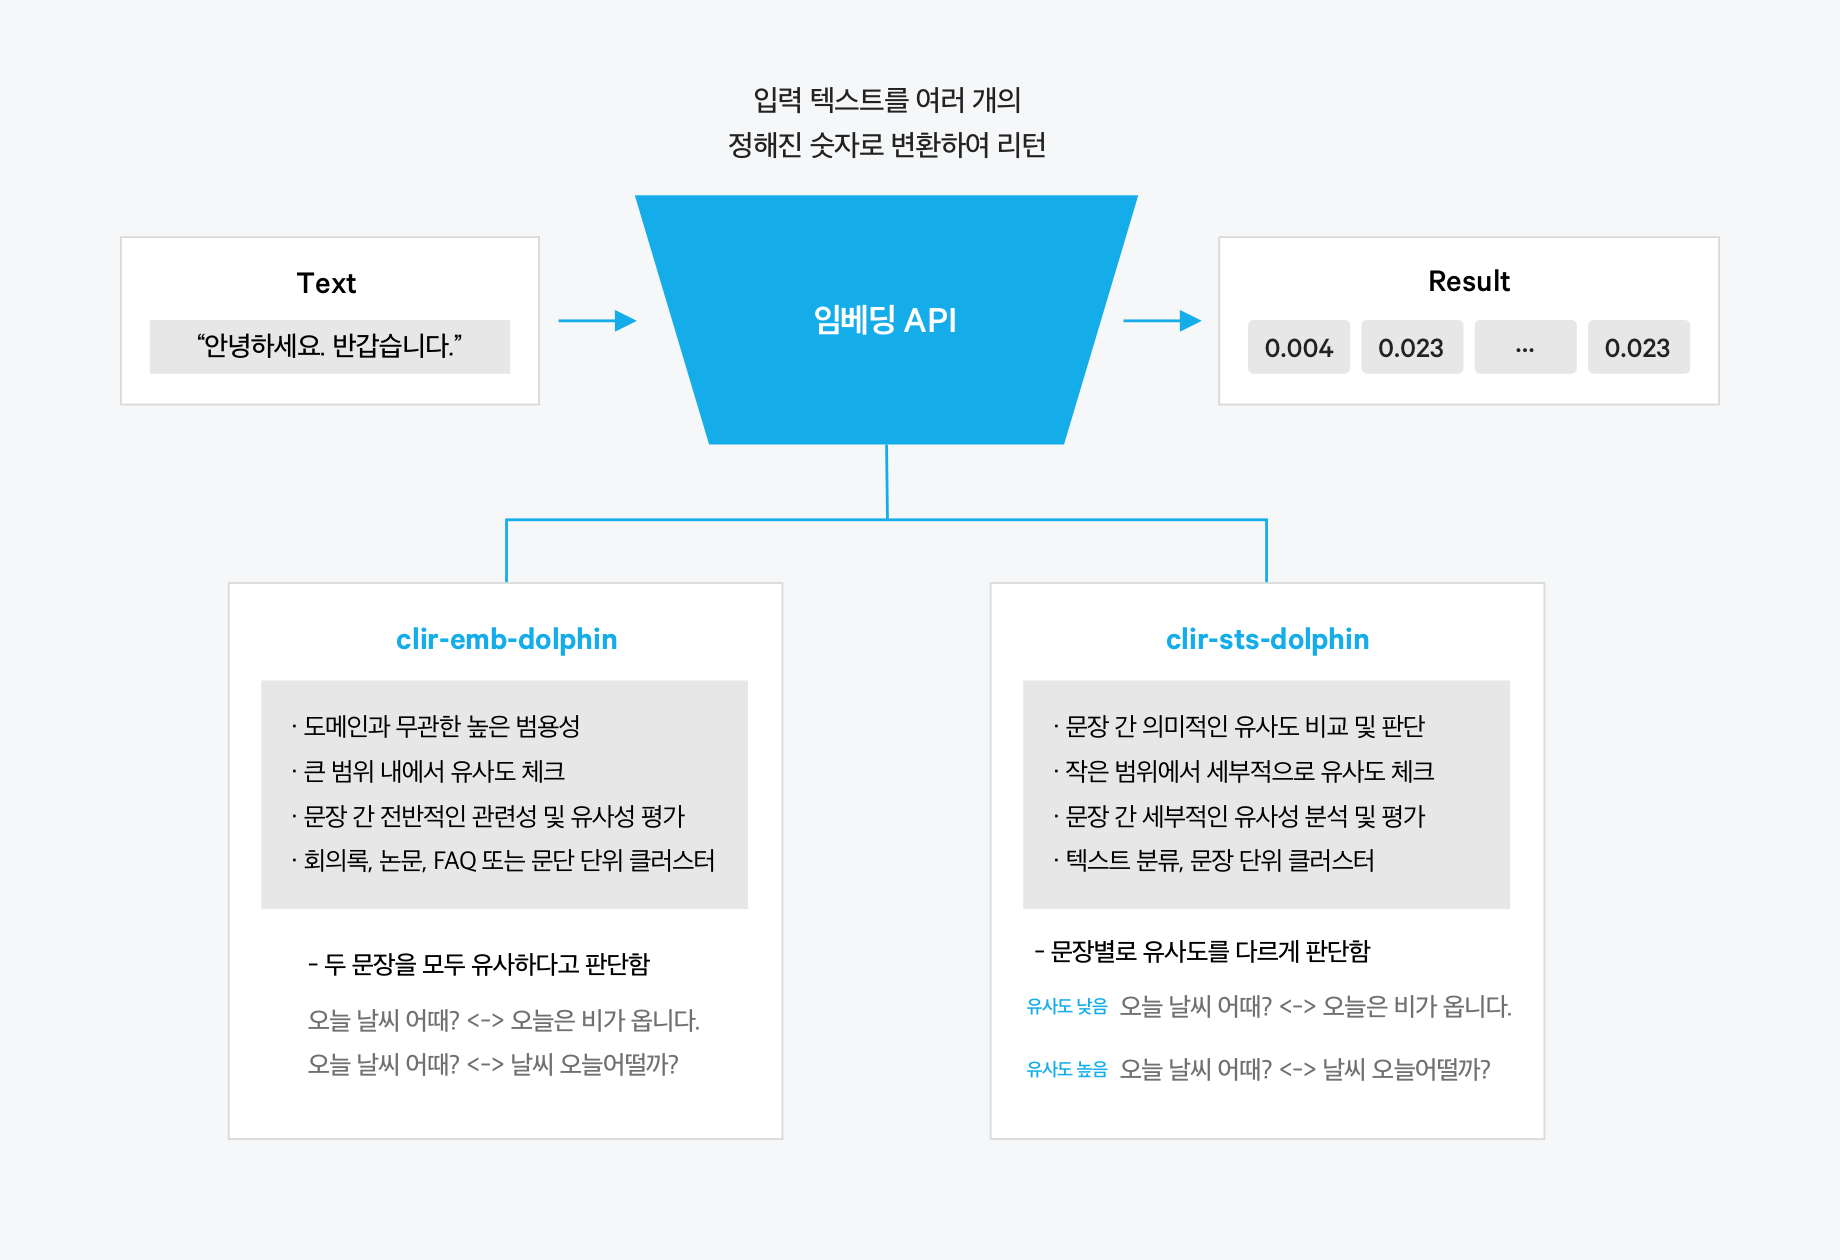

### 1 . VoyageAI/ OpenAI
  *이탤릭체 텍스트*
- voyageAI가 더 우수하다고 알려짐. (학습 기록(23 vs 21)이 더 최신이어서 그런 것이라고 추측)
    
    - ref) https://blog.langchain.dev/voyage-embeddings-in-langchain-and-chat-langchain/

    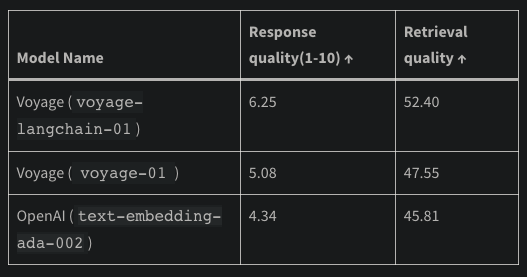

- langchain
  1.  한글로
  2.  영어 번역으로

- Emsemble Retrieval

  1. BM25
  - 키워드 기반 검색에 탁월하여 쿼리 용어가 명시적으로 포함된 문서를 캡처하는 반면
  - 선지 dbPOX
  2. FAISS(또는 임베딩 기반 검색기)
  - 의미론적 유사성이 뛰어나 정확한 단어가 없더라도 의미를 캡처합니다.
  - 교과서/원전 dbOBT

In [ ]:
df_dbPIEOBT.head(3)

,텍스트,텍스트_en,정오판단,사상가,단원,주제,책이름
ID,,,,,,,
P-1-1-1,시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가,Is the subject of civil disobedience a citizen who recognizes the legitimacy of the system,O,롤스,3-2-2단원,1,
P-1-1-2,시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가,Should the intent of civil disobedience be published to fellow citizens,O,롤스,3-2-2단원,1,
P-1-1-3,시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가,Is civil disobedience a political act that appeals to the sense of justice in the community,O,롤스,3-2-2단원,1,


In [ ]:
df_dbPOXOBT.head(3)

,텍스트,정오판단,사상가,단원,주제,텍스트_en,책이름
ID,,,,,,,
P-1-1-1,시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가,O,롤스,3-2-2단원,1,Is the subject of civil disobedience a citizen who recognizes the legitimacy of the system,
P-1-1-2,시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가,O,롤스,3-2-2단원,1,Should the intent of civil disobedience be published to fellow citizens,
P-1-1-3,시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가,O,롤스,3-2-2단원,1,Is civil disobedience a political act that appeals to the sense of justice in the community,


In [ ]:
!pip3 install -U langchain faiss-cpu voyageai openai tiktoken cohere -q
%pip install --upgrade --quiet  rank_bm25 > /dev/null

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 16.2 MB/s eta 0:00:00


In [ ]:
import os

# 환경 변수 설정
# (voyageAI, openAI, cohere, claude api key를 입력해주세요!)
# claude_api_key = (yours key)
# voyage_api_key = (yours key)
# os.environ['VOYAGE_API_KEY'] = voyage_api_key
# openai_api_key = (yours key)
# os.environ['OPENAI_API_KEY'] = openai_api_key
# cohere_api_key = (yours key)
# os.environ['COHERE_API_KEY'] = cohere_api_key

In [ ]:
# 탐색하고자 하는 DB 유형
### ko
dbPIEOBT_texts = df_dbPIEOBT['텍스트'].tolist()
dbPOXOBT_texts = df_dbPOXOBT['텍스트'].tolist()
### en
dbPIE_texts_en = df_dbPIE['텍스트_en'].tolist()
dbOBT_texts_en = df_dbOBT['텍스트_en'].tolist()
dbPEOBT_texts_en = df_dbPEOBT['텍스트_en'].tolist()
dbPIEOBT_texts_en = df_dbPIEOBT['텍스트_en'].tolist()
dbPOXOBT_texts_en = df_dbPOXOBT['텍스트_en'].tolist()

EMB_MODEL_NAME = "voyage2"
TOPK = 13

###### Ensemble
#### 탐색 후보군 수(k)
bm25_k = 5 # top10
faiss_k = 5 # top10
##################

#### DB 설정 ####
##### vanilla
ensembleIsOn = False

db_name = "dbPIEOBT_en"
db_texts = dbPIEOBT_texts if db_name == "dbPIEOBT" else (dbPOXOBT_texts if db_name == "dbPOXOBT" else (dbPIEOBT_texts_en if db_name == "dbPIEOBT_en" else (dbPOXOBT_texts_en if db_name == "dbPOXOBT_en" else dbPEOBT_texts_en) ))
vector_store = FAISS.from_texts(db_texts, VoyageEmbeddings(model="voyage-2", batch_size=8)) if EMB_MODEL_NAME == "voyage2" else FAISS.from_texts(db_texts, OpenAIEmbeddings(model="text-embedding-ada-002"))

# #### Ensemble
# doc_list_1 = dbPIE_texts_en
# doc_list_2 = dbOBT_texts_en

# # 앙상블
# # initialize the bm25 retriever and faiss retriever
# bm25_retriever = BM25Retriever.from_texts(
#     doc_list_1, metadatas=[{"source": "dbPIE"}] * len(doc_list_1)
# )
# bm25_retriever.k = bm25_k

# faiss_vectorstore = FAISS.from_texts(
#     doc_list_2, embeddings, metadatas=[{"source": "dbOBT"}] * len(doc_list_2)
# )
# faiss_retriever = faiss_vectorstore.as_retriever(search_kwargs={"k": faiss_k})

# # initialize the ensemble retriever
# ensemble_retriever = EnsembleRetriever(
#     retrievers=[bm25_retriever, faiss_retriever], weights=[0.5, 0.5]
# )
# ##############

In [ ]:
import torch
import numpy as np
import pickle
from langchain.embeddings import VoyageEmbeddings, OpenAIEmbeddings
from langchain.retrievers import KNNRetriever, BM25Retriever, EnsembleRetriever
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from langchain.vectorstores import FAISS
from tqdm import tqdm
import cohere
import ast

def transform_dataframe(df):
    global db_name
    global idx_ko_PIEOBT_dict
    global idx_ko_POXOBT_dict
    global ko_idx_PIEOBT_dict
    global ko_idx_POXOBT_dict

    """
    Transform the given dataframe based on the logic described:
    - Creates new rows based on the longer array between '정답' and '예측' columns.
    - Keeps 'index' and '정답 여부' values only for the first row of each 'index' group.
    - Fills missing values with an empty string instead of None.

    Parameters:
    - df: The original pandas DataFrame to transform.

    Returns:
    - A new transformed DataFrame.
    """
    new_rows = []
    prev_index = None

    for _, row in df.iterrows():
        max_length = 1
        if not pd.isnull(row['정답']):
          max_length = max(len(ast.literal_eval(row['정답'])), len(ast.literal_eval(row['예측'])))

        for i in range(max_length):
            index_val = row.name if (i == 0 and row.name != prev_index) else None
            answer_status_val = row['정답 여부'] if (i == 0 and row.name != prev_index) else None
            answer = None
            if not pd.isnull(row['정답']):
              answer = ast.literal_eval(row['정답'])[i] if i < len(ast.literal_eval(row['정답'])) else None
            prediction = None
            if not pd.isnull(row['예측']):
              prediction = ast.literal_eval(row['예측'])[i] if i < len(ast.literal_eval(row['예측'])) else None

            new_rows.append({
                '선지': index_val,
                '선지_텍스트': idx_ko_PIEOBT_dict.get(index_val, index_val) if db_name == "dbPIEOBT" else idx_ko_POXOBT_dict.get(index_val, index_val),
                '정답 여부': answer_status_val,
                '정답': answer,
                '정답_텍스트': idx_ko_PIEOBT_dict.get(answer, answer) if db_name == "dbPIEOBT" else idx_ko_POXOBT_dict.get(answer, answer),
                '예측': prediction,
                '예측_텍스트': idx_ko_PIEOBT_dict.get(prediction, prediction) if db_name == "dbPIEOBT" else idx_ko_POXOBT_dict.get(prediction, prediction)
            })

        prev_index = row.name

    return pd.DataFrame(new_rows).fillna("")

def exp_normalize(x):
    b = x.max()
    y = np.exp(x - b)
    return y / y.sum()

##### reranker #####

# Initialize Cohere client
co = cohere.Client(cohere_api_key)

# ## Hugging Face 모델 허브에서 모델과 토크나이저 로드 ##
# model_name = "Dongjin-kr/ko-reranker"
# #############################################
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)
# model.eval()

########################

result_df = pd.DataFrame()
result_df['정답 여부'] = "X"
correct_num = 0
i = 0

for idx, text in tqdm(df_query['선지 - 문장_en'].to_dict().items()):
    i += 1
    # 기본값
    result_df.loc[idx, '정답 여부'] = "X"
    # 정답
    answer = list(ast.literal_eval(df_answer[idx]))
    if len(answer) == 0:  # 정답이 없는 경우,
        correct_num += 1  # 우선 맞다고 하고 넘어가자!
        result_df.loc[idx, '정답 여부'] = "O"
        continue

    # 쿼리 임베딩
    query_text = str(text.strip())

    if EMB_MODEL_NAME == "voyage2":
      embeddings = VoyageEmbeddings(model="voyage-2", batch_size=8)
    elif EMB_MODEL_NAME == "openai":
      embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

    if ensembleIsOn:
      result = ensemble_retriever.invoke(query_text)
    else:
      result = vector_store.similarity_search(query_text, k=TOPK)


    # 예측 topk 목록
    if db_name == "dbPIEOBT":
      predict_topk_idx = [ko_idx_PIEOBT_dict[doc.page_content] for doc in result]
      predict_topk_text = [ko_idx_PIEOBT_dict[doc.page_content] for doc in result]
    elif db_name == "dbPOXOBT":
      predict_topk_idx = [ko_idx_POXOBT_dict[doc.page_content] for doc in result]
      predict_topk_text = [ko_idx_POXOBT_dict[doc.page_content] for doc in result]
    elif db_name == "dbPOXOBT_en":
      predict_topk_idx = [en_idx_POXOBT_dict[doc.page_content] for doc in result]
      predict_topk_text = [en_idx_POXOBT_dict[doc.page_content] for doc in result]
    elif db_name == "dbPIEOBT_en":
      predict_topk_idx = [en_idx_PIEOBT_dict[doc.page_content] for doc in result]
      predict_topk_text = [en_idx_PIEOBT_dict[doc.page_content] for doc in result]
    elif db_name == "dbPEOBT_en":
      predict_topk_idx = [en_idx_PEOBT_dict[doc.page_content] for doc in result]
      predict_topk_text = [en_idx_PEOBT_dict[doc.page_content] for doc in result]
    else:
      raise ValueError("db_name must be 'dbPIEOBT' or 'dbPOXOBT_en' or 'dbPOXOBT' or 'dbPOXOBT_en'")


    # ##### Off Reranker
    predict_top5_idx = predict_topk_idx

    # ############################## reranker ####################################

    # Re-Rank documents with Cohere
    reranked_hits = co.rerank(query=query_text, documents=predict_topk_text, top_n=TOPK, model='rerank-multilingual-v2.0') # TOPK
    predict_topk_idx = [predict_topk_idx[hit.index] for hit in reranked_hits.results]  # Get the reranked documents based on indices
    predict_top5_idx = [predict for predict in predict_topk_idx if predict != idx][:5] # 본인은 제외!

    # # 문장 쌍 생성
    # pairs = [[query_text, predict_text] for predict_text in predict_topk_idx]

    # # 모델 평가를 위한 코드
    # with torch.no_grad():
    #     inputs = tokenizer(pairs, padding=True, truncation=True, return_tensors="pt", max_length=512)
    #     scores = model(**inputs, return_dict=True).logits.view(-1, ).float()
    #     scores = exp_normalize(scores.numpy())

    # # 점수를 기반으로 상위 5개 항목 선택
    # top5_indices = np.argsort(scores)[::-1][:5]  # 점수가 가장 높은 상위 5개 항목의 인덱스 (내림차순)
    # predict_top5_idx = [predict_topk_idx[index] for index in top5_indices]
    # #############################################################################

    # 결과 기록
    result_df.loc[idx, '정답'] = str(list(answer))
    result_df.loc[idx, '예측'] = str(list(predict_top5_idx))

    # 채점
    answer_large = list(map(lambda x: "-".join(x.split("-")[:4]), answer))
    predict_top5_large = list(map(lambda x: "-".join(x.split("-")[:4]), predict_top5_idx))

    if len(set(answer_large) & set(predict_top5_large)) > 0:
        correct_num += 1
        result_df.loc[idx, '정답 여부'] = "O"

print(f"Acc@top5 : {correct_num / len(df_query) * 100} %")
result_df.loc["정답률", "정답 여부"] = f"{correct_num / len(df_query) * 100} %"

# Transform the original dataframe using the defined function
df_transformed = transform_dataframe(result_df)
df_transformed

100%|██████████| 71/71 [00:29<00:00,  2.43it/s]

Acc@top5 : 57.74647887323944 %


,선지,선지_텍스트,정답 여부,정답,정답_텍스트,예측,예측_텍스트
0,P-1-1-1,시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가,O,O-1-1-11-7,O-1-1-11-7,O-1-1-2-1,우리는 먼저 정치적 의무와 책무에 관한 몇 가지 문제점을 논의해야만 한다. 그중에 한 가지를 들면 현존 체제를 받아들여야 할 우리의 의무와 책무가 때로는 어겨질 수 있다는 것이 분명하다는 점이다. 그러한 요구 사항들은 정당성의 원칙에 의거해 있는데 이 원칙에 의하면 모든 것을 고려해서 어떤 상황에서는 불복종도 정당화될 수가 있다는 것이다.
1,,,,P-1-1-17,의회가 합법적으로 제정한 법은 시민 불복종의 대상이 아니다는 틀리다.,O-1-1-11-5,내가롤스가 보기에는 시민 불복종의 문제는 어느 정도 정의로운 국가 내에서 그 체제의 합법성을 인정하고 받아들이는 시민들에 있어서만 생겨난다.
2,,,,P-1-1-21,시민 불복종은 민주 헌법의 의도에 어긋나는 항거이다는 틀리다.,O-1-1-31-4,그래서 이러한 이유 때문에 당사자들은 정당한 시민 불복종을 규정하는 조건들을 법에의 충실성의 한도 내에서 정의로운 체제의 안정성을 유지하기 위한 방도를 세우는 방식으로서 채택하게 될 것이다.
3,,,,,,BT-1-1-41,현존 체제를 받아들여야 할 우리의 의무와 책무를 때로는 어길 수 있다는 것이 분명하다. 그러한 요구 사항들은 정당성의 원칙에 따르는데 이 원칙에 따르면 모든 것을 고려해서 어떤 상황에서는 불복종도 정당화될 수 있다는 것이다. 불복종의 정당화 여부는 법과 제도가 부정의한 정도에 달려 있다. 시민 불복종의 근거가 오직 개인이나 집단의 이익에만 기초할 수 없다는 것은 말할 필요도 없다. 그 대신 우리는 정치적인 질서의 바탕에 깔린 공유하고 있는 정의관에 따르게 된다. 이러한 정의관의 기본 원칙을 오래도록 끈질기고 의도적으로 위반하는 것 특히 기본적인 평등한 자유의 침해는 굴종이 아니면 반항을 일으키게 된다. 롤스 정의론
4,,,,,,O-1-1-39,정당한 시민 불복종이 시민의 화합을 위협하는 것으로 보일 경우 그 책임은 항거하는 사람들에게 있는것이 아니라 이러한 반대가 정당화되게끔 권위와 권력을 남용한 사람들에게 있다. 왜냐하면 명백히 부정의한 제도를 유지하기 위해 국가의 강제 기구를 이용하는 것은 그 자체가 사람들이 정당한 과정을 통해서 항거하는 권리를 갖게 되는 일종의 비합법적인 힘이기 때문이다.
5,P-1-1-2,시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가,X,BT-1-1-37,롤스는 개인의 양심보다 사회적 다수의 정의관에 주목하였는데 평등한 자유의 원칙이나 공정한 기회균등의 원칙과 같이 정의의 원칙에 어긋나는 법이나 정책에 대해서 저항할 수 있다고 보았다.,BT-1-1-10,시민 불복종은 기존 사회 질서와 법질서를 존중하는 것을 전제로 해야 한다.
6,,,,BT-1-1-39,롤스는 개인의 양심보다는 공동체의 정의감에 근거하여 시민 불복종을 정당화한다. 구체적으로 그가 제시한 평등한 자유의 원칙이나 공정한 기회 균등의 원칙을 한 국가의 법률이 현저하게 위반할 때 그런 부정의한 법에 대한 저항이 정당화된다고 보았다. 이 과정에서 차등의 원칙은 제외하는데 롤스는 어떤 법률이 차등의 원칙에 위배되는지의 여부를 판단하는 것이 개인마다 자의적일 수 있다고 보아 불복종의 기준으로 삼지는 않았다. 평등한 자유의 원칙과 공정한 기회 균등의 원칙은 자유와 인권이 보장되는 질서 정연한 사회의 구성원들이 자발적으로 합의한 정의의 원칙이므로 한 국가의 법률이나 정부의 정책도 이 원칙에 위배되어서는 안 된다는 것이 롤스의 주장이다.,BT-1-1-3,시민 불복종은 행위의 목적이 정당해야 한다.
7,,,,,,BT-1-1-19,시민 불복종의 정당성과 정의의 규범적 윤리적 근거를 널리 알리기 위해 공개적으로 이루어져야 한다.
8,,,,,,BT-1-1-18,시민 불복종은 사적 이익 추구가 아니라 사회 정의의 실현 등 공익을 목적으로 삼는 양심적 행동이어야 한다.
9,,,,,,O-1-1-16-1,또 다른 한 가지 문제점은 시민 불복종이 공공적 행위라는 점이다. 그것은 공공 원칙에 관련된 것일 뿐만 아니라 또한 공공적으로 행해지는 것이다. 그것은 공개적으로 공정한 주목을 받는 가운데 참여하는 것이며 은밀히 혹은 비밀리에 행해지는 것이 아니다.


- Save Result
  - 정답 텍스트 중 일부를 채워넣는 전처리

In [ ]:
### 원전 대분류 정답 텍스트 채워넣기!
dbO_idx_text_dict = datasetO.dropna(subset="ID_large").set_index("ID_large")['텍스트'].to_dict()
dbO_idx_text_dict

In [ ]:
df_transformed_copy = deepcopy(df_transformed)

In [ ]:
df_transformed['정답_텍스트'] = df_transformed['정답_텍스트'].apply(lambda x: dbO_idx_text_dict.get(str(x), "텍스트 없음") if '-' in str(x) else str(x))
df_transformed

In [ ]:
df_transformed.drop(354, axis=0, inplace=True)

In [ ]:
df_transformed.set_index('선지').to_csv('/content/drive/MyDrive/Colab_Notebooks/DA Matching Algorithm/AI/HDchatbot/result/sample_prediction.csv', encoding='utf-8-sig')

- DashBoard

In [ ]:
# PIEOBT / POXOBT
### w/o reranker
- 한글
  1 . clova
    - vanilla retrieval : 26.76056338028169 % / 23.943661971830984 %
  2 . voyage2
    - vanilla retrieval : 22.535211267605636 % / 21.12676056338028 %
    - ensemble retrieval :
- 영어
  1 . voyage2 ("768D")
    - vanilla retrieval : 40.845070422535215 % / 38.028169014084504 %
    - vanilla(reranker) : 54.929577464788736 %(10) / ****57.74647887323944%(13)**** / 56.33802816901409 %(15) / 47.88732394366197 %(20) / 45.07042253521127 %(25)
    - ensemble retrieval : 54.9%(10) / 54.6%(13)z

  2 . openai("text-embedding-3-large") ("3072D") // ("*text-embedding-ada-002")	("1536D")
    - vanilla retrieval : ?? / 33.80281690140845 % // 39.436619718309856 % /
    - ensemble retrieval :

In [ ]:
# clova
### <emb_detail>
##### w/o reranker (top 5)
# 1. dbPOXOBT
# 정답률  23.943661971830984 %
# 1. dbPIEOBT
# 정답률  26.76056338028169 %
# 1. dbOBT
# 정답률  28.169014084507044 %


#### w reranker (top 40, rerank top5)
# 1. dbPOXOBT
# 정답률  29.577464788732392 %
# 1. dbPIEOBT
# 정답률  28.169014084507044 %
# 1. dbOBT
# 정답률	32.3943661971831 %

### 2 . Clova

Q. query embedding은 sts해도 괜찮나??

In [ ]:
EMB_MODEL_NAME = "clir-emb-dolphin"
# EMB_MODEL_NAME = "clir-sts-dolphin"

In [ ]:
# -*- coding: utf-8 -*-

import base64
import json
import http.client
from tqdm import tqdm
!pip3 install konlpy -q
from konlpy.tag import Kkma

# Kkma 인스턴스 생성
kkma = Kkma()

def split_into_sentences(input_paragraph):
    """
    주어진 문단을 문장으로 나누고, 이를 ".\n"으로 조인하는 함수

    Args:
    - input_paragraph (str): 나누고자 하는 문단

    Returns:
    - str: 문장으로 나누고 ".\n"으로 조인한 문자열
    """
    # 문단을 문장으로 나누기
    sentences = kkma.sentences(input_paragraph)

    # 문장들을 ".\n"으로 조인
    joined_sentences = "\n ".join(sentences)

    return joined_sentences

class SegmentationExecutor:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def _send_request(self, completion_request):
        headers = {
            'Content-Type': 'application/json; charset=utf-8',
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id
        }

        conn = http.client.HTTPSConnection(self._host)
        conn.request('POST', '/testapp/v1/api-tools/segmentation/f4f9bbde113648819f73f2c376ddf5c7', json.dumps(completion_request), headers)
        response = conn.getresponse()
        result = json.loads(response.read().decode(encoding='utf-8'))
        conn.close()
        return result

    def execute(self, completion_request):
        res = self._send_request(completion_request)
        if res['status']['code'] == '20000':
            return res['result']['topicSeg']
        else:
            return 'Error'

####### variabl EMB_MODEL ########
class EmbeddingExecutor:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def _send_request(self, completion_request):
        headers = {
            'Content-Type': 'application/json; charset=utf-8',
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id
        }

        conn = http.client.HTTPSConnection(self._host)
        conn.request('POST', f'/testapp/v1/api-tools/embedding/{EMB_MODEL_NAME}/2093eac6dfd84e82ba222c2c68b66b4c', json.dumps(completion_request), headers)
        response = conn.getresponse()
        result = json.loads(response.read().decode(encoding='utf-8'))
        conn.close()
        return result

    def execute(self, completion_request):
        res = self._send_request(completion_request)
        if res['status']['code'] == '20000':
            return res['result']['embedding']
        else:
            return 'Error'

####### fixed EMB_MODEL ########
############# 1. emb_model
class emb_EmbeddingExecutor:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def _send_request(self, completion_request):
        headers = {
            'Content-Type': 'application/json; charset=utf-8',
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id
        }

        conn = http.client.HTTPSConnection(self._host)
        conn.request('POST', f'/testapp/v1/api-tools/embedding/clir-emb-dolphin/2093eac6dfd84e82ba222c2c68b66b4c', json.dumps(completion_request), headers)
        response = conn.getresponse()
        result = json.loads(response.read().decode(encoding='utf-8'))
        conn.close()
        return result

    def execute(self, completion_request):
        res = self._send_request(completion_request)
        if res['status']['code'] == '20000':
            return res['result']['embedding']
        else:
            return 'Error'

############# 2. sts_model
class sts_EmbeddingExecutor:
    def __init__(self, host, api_key, api_key_primary_val, request_id):
        self._host = host
        self._api_key = api_key
        self._api_key_primary_val = api_key_primary_val
        self._request_id = request_id

    def _send_request(self, completion_request):
        headers = {
            'Content-Type': 'application/json; charset=utf-8',
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id
        }

        conn = http.client.HTTPSConnection(self._host)
        conn.request('POST', f'/testapp/v1/api-tools/embedding/clir-sts-dolphin/2093eac6dfd84e82ba222c2c68b66b4c', json.dumps(completion_request), headers)
        response = conn.getresponse()
        result = json.loads(response.read().decode(encoding='utf-8'))
        conn.close()
        return result

    def execute(self, completion_request):
        res = self._send_request(completion_request)
        if res['status']['code'] == '20000':
            return res['result']['embedding']
        else:
            return 'Error'
##################################################################
############### Running Embedding Instance #######################
##################################################################

embedding_executor = EmbeddingExecutor(
        host='clovastudio.apigw.ntruss.com',
        api_key='NTA0MjU2MWZlZTcxNDJiY1aM5JpMNr1vYMQHOi/ifhUlI8DadYG/B7WrQXcfae6Ep+SENO/vJ30WX5njjQoAr83V5n+ELIBCnX8+4mjgpPzdcjtWqs703xqAt4u+9Ue06y/9UnwPBEZpls7eCQR5zChZlGoNK7idWqzmlKtoEq/E6iWgjYtKR0DfQHO8TExu',
        api_key_primary_val = 'GjNgIjD751QAx7ybHMnYyeyUvH4z3qhcPEGqPldN',
        request_id='e8dbe42816304cd59119ed898adedcda'
    )

emb_embedding_executor = emb_EmbeddingExecutor(
        host='clovastudio.apigw.ntruss.com',
        api_key='NTA0MjU2MWZlZTcxNDJiY1aM5JpMNr1vYMQHOi/ifhUlI8DadYG/B7WrQXcfae6Ep+SENO/vJ30WX5njjQoAr83V5n+ELIBCnX8+4mjgpPzdcjtWqs703xqAt4u+9Ue06y/9UnwPBEZpls7eCQR5zChZlGoNK7idWqzmlKtoEq/E6iWgjYtKR0DfQHO8TExu',
        api_key_primary_val = 'GjNgIjD751QAx7ybHMnYyeyUvH4z3qhcPEGqPldN',
        request_id='e8dbe42816304cd59119ed898adedcda'
    )

sts_embedding_executor = sts_EmbeddingExecutor(
        host='clovastudio.apigw.ntruss.com',
        api_key='NTA0MjU2MWZlZTcxNDJiY1aM5JpMNr1vYMQHOi/ifhUlI8DadYG/B7WrQXcfae6Ep+SENO/vJ30WX5njjQoAr83V5n+ELIBCnX8+4mjgpPzdcjtWqs703xqAt4u+9Ue06y/9UnwPBEZpls7eCQR5zChZlGoNK7idWqzmlKtoEq/E6iWgjYtKR0DfQHO8TExu',
        api_key_primary_val = 'GjNgIjD751QAx7ybHMnYyeyUvH4z3qhcPEGqPldN',
        request_id='e8dbe42816304cd59119ed898adedcda'
    )


- 임베딩은 1번만!

In [ ]:
# if __name__ == '__main__':

#     segmentation_executor = SegmentationExecutor(
#     host='clovastudio.apigw.ntruss.com',
#     api_key='NTA0MjU2MWZlZTcxNDJiY1aM5JpMNr1vYMQHOi/ifhUlI8DadYG/B7WrQXcfae6Ep+SENO/vJ30WX5njjQoAr83V5n+ELIBCnX8+4mjgpPzdcjtWqs703xqAt4u+9Ue06y/9UnwPBEZpls7eCQR5zChZlGoNK7idWqzmlKtoEq/E6iWgjYtKR0DfQHO8TExu',
#     api_key_primary_val = 'GjNgIjD751QAx7ybHMnYyeyUvH4z3qhcPEGqPldN',
#     request_id='519dcd54acd44850bae70654d478f681'
#     )

#     # Kkma 인스턴스 생성
#     kkma = Kkma()

#     embedding_executor = EmbeddingExecutor(
#         host='clovastudio.apigw.ntruss.com',
#         api_key='NTA0MjU2MWZlZTcxNDJiY1aM5JpMNr1vYMQHOi/ifhUlI8DadYG/B7WrQXcfae6Ep+SENO/vJ30WX5njjQoAr83V5n+ELIBCnX8+4mjgpPzdcjtWqs703xqAt4u+9Ue06y/9UnwPBEZpls7eCQR5zChZlGoNK7idWqzmlKtoEq/E6iWgjYtKR0DfQHO8TExu',
#         api_key_primary_val = 'GjNgIjD751QAx7ybHMnYyeyUvH4z3qhcPEGqPldN',
#         request_id='e8dbe42816304cd59119ed898adedcda'
#     )

#     # 임베딩을 계산할 문서 세트들을 준비합니다.
#     input_chunked_documents = {
#         "query": chunked_document_query,
#         "dbBT": chunked_document_dbBT,
#         "dbO": chunked_document_dbO,
#         "dbPI": chunked_document_dbPI,
#         "dbPE": chunked_document_dbPE,
#         "dbPOX": chunked_document_dbPOX
#     }

#     # 결과를 저장할 딕셔너리를 초기화합니다.
#     result_chunked_documents = {}

#     # 각 문서 세트에 대해 반복 실행합니다.
#     for key, input_chunked_document in input_chunked_documents.items():
#         result_chunked_document = []  # 현재 문서 세트의 결과를 저장할 리스트입니다.

#         # 현재 문서 세트의 각 문서에 대해 반복 실행합니다.
#         for chunked_document in tqdm(input_chunked_document, desc=f"Processing {key}"):
#             ### chunked_document : {"index", "text", "embedding"}

#             # 문서의 텍스트를 JSON 데이터로 변환합니다.
#             input_paragraph = str(chunked_document["text"]).replace('"', '\'')
#             print(input_paragraph)
#             request_data = json.loads(f'''
#                 {{
#                     "text": "{input_paragraph}"
#                 }}
#             ''', strict=False)

#             # 임베딩을 계산합니다. 여기서 `embedding_executor.execute`는 가상의 함수로, 실제 구현에 맞게 대체해야 합니다.
#             response_text = embedding_executor.execute(request_data)

#             ######## 임베딩 변환 시 토큰 초과 에러 ###########
#             if response_text == 'Error':
#                 print('\n[추가 문장& 문단 나누기 진행...]')


#                 print(input_paragraph)
#                 ###############################
#                 ### 문장 나누기 +\n & 문단 나누기 ###
#                 ###############################
#                 joined_sentences = split_into_sentences(input_paragraph)

#                 request_data = json.loads(f'''
#                     {{
#                     "postProcessMaxSize": 1000,
#                     "alpha": -100.0,
#                     "segCnt": -1,
#                     "postProcessMinSize": 300,
#                     "text": "{joined_sentences}",
#                     "postProcess": false
#                     }}
#                 ''', strict=False)

#                 response_text = segmentation_executor.execute(request_data)

#                 #response_text : [[문단1 ], [문단2 ], [문단3 ], ...]
#                 # print(request_data)
#                 # print(response_text)

#                 index = str(chunked_document["index"])

#                 i = 0
#                 for split_text_list in response_text:
#                   i += 1
#                   split_text = str(split_text_list[0])
#                   print(split_text)
#                   # 임베딩을 계산합니다. 여기서 `embedding_executor.execute`는 가상의 함수로, 실제 구현에 맞게 대체해야 합니다.

#                   split_request_data = json.loads(f'''
#                       {{
#                           "text": "{split_text}"
#                       }}
#                   ''', strict=False)
#                   split_emb = embedding_executor.execute(split_request_data)

#                   split_chuncked_document = {
#                       "index" : str(index) + f"-{i}",
#                       "text" : str(split_text),
#                       "embedding" : split_emb
#                   }
#                   print(split_chuncked_document)
#                   result_chunked_document.append(split_chuncked_document)
#             else:
#                   # 계산된 임베딩을 문서 객체에 추가합니다.
#                   chunked_document["embedding"] = response_text
#                   result_chunked_document.append(chunked_document)

#         # 현재 문서 세트의 결과를 저장합니다.
#         result_chunked_documents[key] = result_chunked_document

#     # `result_chunked_documents`는 이제 모든 문서 세트에 대한 임베딩이 추가된 문서 객체들을 포함합니다.

Processing query:   0%|          | 0/71 [00:00<?, ?it/s]

시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가


Processing query:   1%|▏         | 1/71 [00:00<00:54,  1.28it/s]

시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가


Processing query:   3%|▎         | 2/71 [00:01<00:39,  1.74it/s]

시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가


Processing query:   4%|▍         | 3/71 [00:01<00:34,  1.95it/s]

시민 불복종의 목적에서 정부 정책의 개혁은 제외되어야 하는가


Processing query:   6%|▌         | 4/71 [00:02<00:31,  2.15it/s]

시민 불복종은 어떠한 합법적 방법도 효과가 없을 때 행해져야 하는가


Processing query:   7%|▋         | 5/71 [00:02<00:29,  2.26it/s]

양심에 충실한 거부라도 정당한 시민 불복종이 아닌 경우가 있다.


Processing query:   8%|▊         | 6/71 [00:03<00:33,  1.94it/s]

시민 불복종은 체제의 정당성에 대한 비폭력적공개적 저항이다.


Processing query:  10%|▉         | 7/71 [00:03<00:35,  1.78it/s]

시민 불복종은 공권력에 의한 처벌을 거부하는 수단이다.


Processing query:  11%|█▏        | 8/71 [00:04<00:32,  1.95it/s]

정치적 절차는 완전히 정의로운 법의 제정을 보장할 수 없다.


Processing query:  13%|█▎        | 9/71 [00:04<00:32,  1.93it/s]

시민 불복종의 대상이 되지 않는 부정의가 존재할 수 있다.


Processing query:  14%|█▍        | 10/71 [00:05<00:29,  2.06it/s]

시민 불복종은 부정의한 정치 체제에 항거하는 것이다.


Processing query:  15%|█▌        | 11/71 [00:05<00:27,  2.16it/s]

원초적 입장에서 합의한 원칙도 시민 불복종의 대상이다.


Processing query:  17%|█▋        | 12/71 [00:05<00:26,  2.25it/s]

시민 불복종은 정당한 폭력으로 다수의 정의감에 호소하는 행위이다.


Processing query:  18%|█▊        | 13/71 [00:06<00:27,  2.12it/s]

시민 불복종은 사회적 협동의 기본 원리에 근거한 양심적 항거이다.


Processing query:  20%|█▉        | 14/71 [00:06<00:27,  2.04it/s]

시민 불복종은 도덕적으로는 옳지 못하지만 불가피한 위법 행위이다.


Processing query:  21%|██        | 15/71 [00:07<00:26,  2.15it/s]

민주적 정부의 법도 부정의하면 시민 불복종의 대상이 될 수 있다.


Processing query:  23%|██▎       | 16/71 [00:07<00:24,  2.22it/s]

의회가 합법적으로 제정한 법은 시민 불복종의 대상이 아니다.


Processing query:  24%|██▍       | 17/71 [00:08<00:23,  2.27it/s]

시민 불복종은 그 행위에 대한 법적 처분의 수용을 전제한다.


Processing query:  25%|██▌       | 18/71 [00:08<00:23,  2.26it/s]

개인의 양심에 근거하더라도 정당한 시민 불복종이 아닐 수 있다.


Processing query:  27%|██▋       | 19/71 [00:09<00:22,  2.32it/s]

시민 불복종은 정치 체제를 변혁하기 위한 공개적인 행위이다.


Processing query:  28%|██▊       | 20/71 [00:09<00:21,  2.34it/s]

시민 불복종은 민주 헌법의 의도에 어긋나는 항거이다.


Processing query:  30%|██▉       | 21/71 [00:09<00:21,  2.37it/s]

정의 원칙도 시민 불복종의 대상에서 제외되지 않는다.


Processing query:  31%|███       | 22/71 [00:10<00:22,  2.16it/s]

시민 불복종은 위법 행위이지만 하나의 권리이다.


Processing query:  32%|███▏      | 23/71 [00:11<00:25,  1.90it/s]

공유된 정의감에 호소하는 시민 불복종이 공공적일 필요는 없다.


Processing query:  34%|███▍      | 24/71 [00:11<00:23,  2.00it/s]

법이 부정의한 정도에 따라 시민 불복종의 정당화 여부가 달라진다.


Processing query:  35%|███▌      | 25/71 [00:11<00:21,  2.10it/s]

민주적 권위에 맞서는 모든 위법 행위는 체제의 안정을 해친다.


Processing query:  37%|███▋      | 26/71 [00:12<00:22,  2.01it/s]

정의 원칙에 기초한 헌법하에서는 부정의한 법이 제정되지 않는다.


Processing query:  38%|███▊      | 27/71 [00:12<00:20,  2.13it/s]

부정의한 법을 준수할 의무는 거의 정의로운 사회에서 존재할 수 없다.


Processing query:  39%|███▉      | 28/71 [00:13<00:19,  2.20it/s]

시민 불복종은 민주적 체제의 합법성을 인정하는 시민의 행위이다.


Processing query:  41%|████      | 29/71 [00:13<00:18,  2.24it/s]

거의 정의로운 사회에서 부정의한 모든 법은 시민 불복종의 대상이다.


Processing query:  42%|████▏     | 30/71 [00:14<00:17,  2.31it/s]

시민 불복종 참여자는 위법 행위에 대한 처벌을 감수해야 한다.


Processing query:  44%|████▎     | 31/71 [00:14<00:17,  2.32it/s]

시민 불복종은 다수의 이익을 증진할 목적으로 행해져야 한다.


Processing query:  45%|████▌     | 32/71 [00:15<00:16,  2.34it/s]

공직을 맡을 권리를 침해하는 정책은 시민 불복종의 대상이 된다.


Processing query:  46%|████▋     | 33/71 [00:15<00:17,  2.13it/s]

시민 불복종은 양심적 행위이지만 그 자체가 사회에 위협이 된다.


Processing query:  48%|████▊     | 34/71 [00:16<00:16,  2.20it/s]

시민 불복종은 헌법의 근거에 이의를 제기하는 정치적 행위이다.


Processing query:  49%|████▉     | 35/71 [00:16<00:17,  2.06it/s]

원초적 입장의 당사자들은 어떠한 부정의에도 저항할 것을 합의한다.


Processing query:  51%|█████     | 36/71 [00:17<00:19,  1.84it/s]

시민 불복종은 정의감에 의해 상당히 규제되는 사회에서만 성립한다.


Processing query:  52%|█████▏    | 37/71 [00:17<00:17,  1.98it/s]

다수가 믿는 종교적 가르침은 시민 불복종을 정당화하는 근거이다.


Processing query:  54%|█████▎    | 38/71 [00:18<00:15,  2.11it/s]

시민 불복종은 위법 행위이지만 사회 정의를 추구한다.


Processing query:  55%|█████▍    | 39/71 [00:18<00:14,  2.20it/s]

시민 불복종은 개인의 이익이 아닌 집단의 이익에 근거해야 한다.


Processing query:  56%|█████▋    | 40/71 [00:19<00:17,  1.81it/s]

시민 불복종은 사회의 기본 구조가 아주 부정의하면 성립할 수 없다.


Processing query:  58%|█████▊    | 41/71 [00:19<00:15,  1.96it/s]

시민 불복종은 헌법의 정당성에 이의를 제기하는 정치적 행위이다.


Processing query:  59%|█████▉    | 42/71 [00:20<00:13,  2.08it/s]

시민 불복종은 비민주적 체제의 변혁을 목적으로 이루어져야 한다.


Processing query:  61%|██████    | 43/71 [00:20<00:13,  2.15it/s]

시민 불복종의 근거인 다수의 정의감은 개인의 양심과 양립할 수 없다.


Processing query:  62%|██████▏   | 44/71 [00:20<00:12,  2.22it/s]

차등의 원칙을 위반한 정책은 시민 불복종의 대상이 된다.


Processing query:  63%|██████▎   | 45/71 [00:21<00:12,  2.07it/s]

매우 부정의한 입헌 체제에서 시민 불복종은 성립할 수 없다.


Processing query:  65%|██████▍   | 46/71 [00:21<00:11,  2.16it/s]

시민 불복종으로 발생할 불행한 결과를 고려해야 한다.


Processing query:  66%|██████▌   | 47/71 [00:22<00:10,  2.26it/s]

시민 불복종은 헌법의 근거가 되는 원칙에 의해 지도되어야 한다.


Processing query:  68%|██████▊   | 48/71 [00:22<00:10,  2.11it/s]

시민 불복종은 양심적 개인들의 종교적 신념에 근거할 수 있다.


Processing query:  69%|██████▉   | 49/71 [00:23<00:10,  2.19it/s]

정의로운 시민에게 부정의한 법을 준수할 의무는 성립할 수 없다.


Processing query:  70%|███████   | 50/71 [00:23<00:10,  2.07it/s]

시민 불복종은 합법적인 정치적 반대와 동시에 이루어져야만 한다.


Processing query:  72%|███████▏  | 51/71 [00:24<00:09,  2.16it/s]

헌법에 규정된 방식으로 제정된 법은 시민 불복종의 대상이 아니다.


Processing query:  73%|███████▎  | 52/71 [00:24<00:08,  2.25it/s]

종교의 자유를 부정하는 법은 시민 불복종의 대상이 된다.


Processing query:  75%|███████▍  | 53/71 [00:25<00:07,  2.28it/s]

부정의한 법을 변혁하고자 불가피하게 다른 법을 위반하는 시민 불복종은 정당화될 수 있다.


Processing query:  76%|███████▌  | 54/71 [00:25<00:07,  2.31it/s]

다수결 원칙에 따라 민주적으로 제정된 법은 시민 불복종의 대상이 아니다.


Processing query:  77%|███████▋  | 55/71 [00:25<00:06,  2.31it/s]

합법적인 민주적 권위에 대한 시민 불복종은 가능하다.


Processing query:  79%|███████▉  | 56/71 [00:26<00:06,  2.33it/s]

다수의 정의감이 상실될 때 시민 불복종은 반드시 요청된다.


Processing query:  80%|████████  | 57/71 [00:26<00:06,  2.15it/s]

시민 불복종이 가져올 효과를 신중히 고려해야 한다.


Processing query:  82%|████████▏ | 58/71 [00:27<00:05,  2.21it/s]

시민 불복종이 정당한 법에 대한 위반을 수반할 수 있는가


Processing query:  83%|████████▎ | 59/71 [00:27<00:05,  2.29it/s]

심각한 부정의가 존재하는 민주 체제에서는 시민 불복종이 가능한가


Processing query:  85%|████████▍ | 60/71 [00:28<00:05,  1.97it/s]

시민 불복종은 법의 부당함을 다수에게 강요하는 행위인가


Processing query:  86%|████████▌ | 61/71 [00:29<00:05,  1.80it/s]

시민 불복종은 정의로운 법을 제정할 절차가 불완전하여 발생할 수 있는가


Processing query:  87%|████████▋ | 62/71 [00:29<00:04,  1.96it/s]

이익 집단의 시민 불복종은 공공의 정의관에 근거해야 허용 될 수 있는가


Processing query:  89%|████████▊ | 63/71 [00:30<00:04,  1.82it/s]

시민 불복종은 정치 체제의 효율성을 이유로 제한될 수 있다.


Processing query:  90%|█████████ | 64/71 [00:30<00:03,  1.83it/s]

시민 불복종이 성립되지 않는 사회가 정의로운 사회일 수는 없다.


Processing query:  92%|█████████▏| 65/71 [00:31<00:03,  2.00it/s]

안정적인 체제에서는 시민 불복종 행위에 대해 처벌하지 않는다.


Processing query:  93%|█████████▎| 66/71 [00:31<00:02,  1.82it/s]

공적 심의를 거친 정책이 시민 불복종의 대상이 될 수는 없다.


Processing query:  94%|█████████▍| 67/71 [00:32<00:02,  1.95it/s]

시민 불복종은 다수결의 원칙에 대한 반대를 표하는 정치 행위이다.


Processing query:  96%|█████████▌| 68/71 [00:32<00:01,  2.07it/s]

시민 불복종은 다수자의 정의감을 나타내는 양심적인 행위이다.


Processing query:  97%|█████████▋| 69/71 [00:32<00:00,  2.18it/s]

시민 불복종은 법의 경계선 내에서 행해지는 정치적 행위이다.


Processing query:  99%|█████████▊| 70/71 [00:33<00:00,  2.05it/s]

부정의한 법의 변혁은 시민 불복종의 목적이 아니라 결과이다.


Processing dbBT:   0%|          | 0/38 [00:00<?, ?it/s]

롤스는 개인의 양심보다 사회적 다수의 정의관에 주목하였는데 평등한 자유의 원칙이나 공정한 기회균등의 원칙과 같이 정의의 원칙에 어긋나는 법이나 정책에 대해서 저항할 수 있다고 보았다.


Processing dbBT:   3%|▎         | 1/38 [00:00<00:16,  2.25it/s]

시민 불복종은 행위의 목적이 정당해야 한다.


Processing dbBT:   5%|▌         | 2/38 [00:00<00:15,  2.31it/s]

시민 불복종은 비폭력적이어야 한다


Processing dbBT:   8%|▊         | 3/38 [00:01<00:17,  2.03it/s]

시민 불복종은 최후의 수단이어야 한다.


Processing dbBT:  11%|█         | 4/38 [00:01<00:15,  2.15it/s]

시민 불복종은 처벌을 감수해야 한다.


Processing dbBT:  13%|█▎        | 5/38 [00:02<00:16,  2.01it/s]

롤스는 부정의한 법이 어떤 일정한 한계를 넘으면 시민 불복종이 인정될 수 있다고 주장하면서 시민 불복종이 정당화되기 위한 조건을 몇 가지 제시하였다.


Processing dbBT:  16%|█▌        | 6/38 [00:02<00:15,  2.12it/s]

시민 불복종은 정의에 관한 중대하고 명백한 침해에 국한되어 인정된다.


Processing dbBT:  18%|█▊        | 7/38 [00:03<00:14,  2.19it/s]

정의의 제의 원칙인 평등한 자유의 원칙을 침해할 때에 시민 불복종을 할 수 있다.


Processing dbBT:  21%|██        | 8/38 [00:03<00:13,  2.26it/s]

시민 불복종은 기존 사회 질서와 법질서를 존중하는 것을 전제로 해야 한다.


Processing dbBT:  24%|██▎       | 9/38 [00:04<00:15,  1.82it/s]

시민 불복종은 정의롭지 못한 법과 제도를 바꾸기 위해 합법적인 방법을 시도했지만 그것이 효과가 없을 때 고려하는 최후의 수단이어야 한다.


Processing dbBT:  26%|██▋       | 10/38 [00:05<00:16,  1.72it/s]

시민 불복종은 개인 또는 특정 집단의 목적을 성취하기 위한 것이 아니라 정의 자유 인권 평등 인간 존엄성 등 보편적인 도덕 가치를 추구해야 한다.


Processing dbBT:  29%|██▉       | 11/38 [00:05<00:14,  1.90it/s]

시민 불복종은 다른 사람을 다치게 하거나 해칠 가능성이 있는 폭력 행위에 가담하는 행위여서는 안 되고 비폭력적이어야 한다.


Processing dbBT:  32%|███▏      | 12/38 [00:05<00:12,  2.02it/s]

시민 불복종은 비합법적인 저항 행위이므로 시민 불복종에 따른 처벌을 감수해야 한다.


Processing dbBT:  34%|███▍      | 13/38 [00:06<00:12,  1.97it/s]

시민 불복종은 법률이나 명령이 평등한 자유의 원칙을 심각하게 위반하는 경우 시민 불복종 실시 가능


Processing dbBT:  37%|███▋      | 14/38 [00:06<00:11,  2.05it/s]

시민 불복종은 공정한 기회균등의 원칙을 심하게 위반하는 경우 시민 불복종 실시 가능


Processing dbBT:  39%|███▉      | 15/38 [00:07<00:10,  2.13it/s]

정의롭지 않은 법률이나 명령을 개정해야 한다고 정치적 다수자에게 계속 호소했지만 그 어떤 합법적인 방법으로도 아무 효과가 없을 경우 시민 불복종 실시 가능


Processing dbBT:  42%|████▏     | 16/38 [00:07<00:10,  2.20it/s]

시민 불복종은 사적 이익 추구가 아니라 사회 정의의 실현 등 공익을 목적으로 삼는 양심적 행동이어야 한다.


Processing dbBT:  45%|████▍     | 17/38 [00:08<00:09,  2.24it/s]

시민 불복종의 정당성과 정의의 규범적 윤리적 근거를 널리 알리기 위해 공개적으로 이루어져야 한다.


Processing dbBT:  47%|████▋     | 18/38 [00:08<00:09,  2.10it/s]

시민 불복종은 비폭력적인 방법으로 전개해야 하며 불의한 법과 정책에 대해 폭력적으로 대응하거나 이를 선동해서는 안 된다.


Processing dbBT:  50%|█████     | 19/38 [00:09<00:08,  2.19it/s]

시민 불복종은 합법적인 방법과 절차에 따랐지만 그 효과가 없을 때 마지막 수단으로 사용해야 한다.


Processing dbBT:  53%|█████▎    | 20/38 [00:09<00:08,  2.07it/s]

시민 불복종은 법체계 전체를 부정하는 것이 아니라 정의롭지 못한 법과 정책을 바로잡고자 하는 행위이므로 그로 인해 예상되는 체포나 처벌을 감수한다.


Processing dbBT:  55%|█████▌    | 21/38 [00:10<00:07,  2.16it/s]

시민 불복종을 통해 불의한 법과 제도에 대항하여 이를 교정하고 국민의 인권을 신장하여 정의로운 사회를 실현하는 데 큰 기여를 할 수 있다.


Processing dbBT:  58%|█████▊    | 22/38 [00:10<00:07,  2.24it/s]

시민 불복종은 다수의 공개적인 활동을 통해 공동선을 지향해야 하며 타인의 기본권을 침해해서는 안 된다.


Processing dbBT:  61%|██████    | 23/38 [00:10<00:06,  2.30it/s]

시민 불복종은 신중하게 이루어져야 한다.


Processing dbBT:  63%|██████▎   | 24/38 [00:11<00:05,  2.34it/s]

시민 불복종을 정당화하려면 법에 대한 충실성의 한계 내에서 마지막 수단이 되어야 하고 공개적이어야 하며 성공에 대한 합당한 전망이 있어야 한다.


Processing dbBT:  66%|██████▌   | 25/38 [00:11<00:05,  2.33it/s]

첫째 법이나 정책이 다수의 정의감에 반하여 기본권을 침해하거나 부당한 차별을 초래할 때 그 부정의를 개선하려는 공공의 목적을 갖고 공개적으로 저항하여야 한다.


Processing dbBT:  68%|██████▊   | 26/38 [00:12<00:05,  2.36it/s]

둘째 폭력적이거나 타인에게 피해를 주는 부정의한 방법으로는 정의를 달성할 수 없으므로 비폭력적이고 평화적인 방법으로 수행해야 한다.


Processing dbBT:  71%|███████   | 27/38 [00:12<00:04,  2.35it/s]

셋째 합법적인 방법으로 최선을 다했으나 더는 효과가 없어서 불가피하게 선택하는 최후의 수단이어야 한다.


Processing dbBT:  74%|███████▎  | 28/38 [00:13<00:04,  2.37it/s]

넷째 시민 불복종은 부정의한 법이나 정책을 교정하려고 일부러 위법 행위를 하는 것이므로 법체계를 존중하는 차원에서 위법 행위에 대한 처벌을 감수해야 한다.


Processing dbBT:  76%|███████▋  | 29/38 [00:13<00:04,  2.02it/s]

시민 불복종을 지나치게 강조하면 국가나 사회의 존재를 위협할 수 있다.


Processing dbBT:  79%|███████▉  | 30/38 [00:14<00:03,  2.12it/s]

따라서 민주 시민으로서 국가의 법을 준수하려는 태도를 지니되 부정의한 법이나 정책을 개선하려는 노력도 사회 정의 실현에 필요한 일이라는 점을 알아야 한다.


Processing dbBT:  82%|████████▏ | 31/38 [00:14<00:03,  2.18it/s]

롤스는 개인의 양심보다 사회적 다수의 정의관에 주목하였는데 평등한 자유의 원칙이나 공정한 기회균등의 원칙과 같이 정의의 원칙에 어긋나는 법이나 정책에 대해서 저항할 수 있다고 보았다.


Processing dbBT:  84%|████████▍ | 32/38 [00:14<00:02,  2.25it/s]

만일 우리가 시민 불복종을 공동체의 정의감에 호소하는 정치적 행위로 본다면 다른 조건이 같을 경우 그것을 구체적이고 분명한 부정의의 사례나 더욱이 다른 부정의를 제거하는 길을 방해하는 것에 한정하는 것이 합당하다고 생각된다. 이러한 이유로 시민 불복종을 정의의 제원칙인 평등한 자유의 원칙에 대한 심한 위반이나 제원칙의 두 번째 부분인 공정한 기회균등의 원칙에 대한 현저한 위배에 국한할 것을 내세우는 데는 나름의 추정 근거가 존재한다. 물론 이러한 원칙들이 만족되었는지를 판별하기가 쉬운 것은 아니다. 그러나 만일 우리가 그 원칙들이 기본적 자유를 보장하는 것으로 생각한다면 이러한 자유가 존중되지 않는다는 것은 분명한 일이다. 결국 그것은 제도 속에 선명하게 표현되어야만 할 어떤 엄격한 요구 사항들을 부과하는 것이다. 그래서 어떤 소수자들이 투표나 직책을 맡을 권리나 재산을 소유하고 이주할 권리가 거절될 때 혹은 어떤 종교 단체들은 억압받고 다른 어떤 단체들은 여러 가지 기회가 거절될 때 이러한 정의롭지 못함은 모든 이에게 분명할 것이다. 롤스 정의론


Processing dbBT:  87%|████████▋ | 33/38 [00:15<00:02,  2.24it/s]

롤스는 개인의 양심보다는 공동체의 정의감에 근거하여 시민 불복종을 정당화한다. 구체적으로 그가 제시한 평등한 자유의 원칙이나 공정한 기회 균등의 원칙을 한 국가의 법률이 현저하게 위반할 때 그런 부정의한 법에 대한 저항이 정당화된다고 보았다. 이 과정에서 차등의 원칙은 제외하는데 롤스는 어떤 법률이 차등의 원칙에 위배되는지의 여부를 판단하는 것이 개인마다 자의적일 수 있다고 보아 불복종의 기준으로 삼지는 않았다. 평등한 자유의 원칙과 공정한 기회 균등의 원칙은 자유와 인권이 보장되는 질서 정연한 사회의 구성원들이 자발적으로 합의한 정의의 원칙이므로 한 국가의 법률이나 정부의 정책도 이 원칙에 위배되어서는 안 된다는 것이 롤스의 주장이다.


Processing dbBT:  89%|████████▉ | 34/38 [00:15<00:01,  2.20it/s]

롤스 .는 시민 불복종이 신중하게 이루어져야 한다고 강조하였다. 그는 시민 불복종을 정당화하려면 법에 대한 충실성의 한계 내에서 마지막 수단이 되어야 하고 공개적이어야 하며 성공에 대한 합당한 전망이 있어야 한다고 주장하였다.


Processing dbBT:  92%|█████████▏| 35/38 [00:16<00:01,  1.94it/s]

현존 체제를 받아들여야 할 우리의 의무와 책무를 때로는 어길 수 있다는 것이 분명하다. 그러한 요구 사항들은 정당성의 원칙에 따르는데 이 원칙에 따르면 모든 것을 고려해서 어떤 상황에서는 불복종도 정당화될 수 있다는 것이다. 불복종의 정당화 여부는 법과 제도가 부정의한 정도에 달려 있다. 시민 불복종의 근거가 오직 개인이나 집단의 이익에만 기초할 수 없다는 것은 말할 필요도 없다. 그 대신 우리는 정치적인 질서의 바탕에 깔린 공유하고 있는 정의관에 따르게 된다. 이러한 정의관의 기본 원칙을 오래도록 끈질기고 의도적으로 위반하는 것 특히 기본적인 평등한 자유의 침해는 굴종이 아니면 반항을 일으키게 된다. 롤스 정의론


Processing dbBT:  95%|█████████▍| 36/38 [00:17<00:01,  1.88it/s]

부정의한 법이 어떤 일정한 한계를 넘으면 시민 불복종이 인정될 수 있다고 주장하면서 시민 불복종이 정당화되기 위한 조건을 몇 가지 제시하였다. 대표적인 것으로 시민 불복종은 정의에 관한 중대하고 명백한 침해에 국한되어 인정된다고 하였다. 즉 롤스는 정의의 제의 원칙인 평등한 자유의 원칙을 침해할 때에 시민 불복종을 할 수 있다고 보았다.


Processing dbBT:  97%|█████████▋| 37/38 [00:17<00:00,  2.01it/s]

롤스의 시민 불복종 법률이나 명령이 평등한 자유의 원칙을 심각하게 위반하는 경우 실시 공정한 기회균등의 원칙을 심하게 위반하는 경우 실시 정의롭지 않은 법률이나 명령을 개정해야 한다고 정치적 다수자에게 계속 호소했지만 그 어떤 합법적인 방법으로도 아무 효과가 없을 경우 실시


Processing dbO:   0%|          | 0/97 [00:00<?, ?it/s]

정의로운 체제 아래서 제정된 정의로운 법을 지켜야 할 이유를 설명하는 데는 아무런 어려움도 없음이 분명하다. 이러한 경우에는 자연적인 의무의 원칙과 공정성의 원칙이 필요한 의무와 책무를 확정해준다.


Processing dbO:   1%|          | 1/97 [00:00<00:40,  2.36it/s]

일반 시민들은 정의의 의무에 구속되며 유리한 직책과 지위를 얻은 사람들이나 자신의 이득을 증진하기 위해 어떤 기회를 이용하는 사람들은 거기에 더하여 공정성의 원칙들에 의해 자신들의 역할을 해야 할 책무가 있다.


Processing dbO:   2%|▏         | 2/97 [00:00<00:40,  2.32it/s]

진정한 문제는 우리가 어떤 조건 아래서 어느 정도까지 부정의한 체제를 따라야만 하는가이다.


Processing dbO:   3%|▎         | 3/97 [00:01<00:39,  2.37it/s]

그런데 때로는 체제가 부정의한 경우엔 그것을 따라야 할 필요가 없다고 말해지기도 한다. 그러나 이는 그릇된 것이다.


Processing dbO:   4%|▍         | 4/97 [00:01<00:43,  2.12it/s]

일반적으로 말해서 법의 부정의가 그것을 지키지 않아도 될 충분조건이 아닌 것은 기존 체제에 의해 규정된 입법의 법적 유효성이 그것을 지켜야 할 충분조건이 아닌 것과 같다.


Processing dbO:   5%|▌         | 5/97 [00:02<00:41,  2.22it/s]

사회의 기본 구조가 현사태가 허용히는 바에 비추어볼 때 합당하게 정의로운 것인 경우 그 부정의가 어느 정도 이상을 지나치지만 않다면 우리는 부정의한 법 도 구속력이 있음을 인정해야 한다.


Processing dbO:   6%|▌         | 6/97 [00:02<00:39,  2.29it/s]

우리는 먼저 정치적 의무와 책무에 관한 몇 가지 문제점을 논의해야만 한다. 그중에 한 가지를 들면 현존 체제를 받아들여야 할 우리의 의무와 책무가 때로는 어겨질 수 있다는 것이 분명하다는 점이다. 그러한 요구 사항들은 정당성의 원칙에 의거해 있는데 이 원칙에 의하면 모든 것을 고려해서 어떤 상황에서는 불복종도 정당화될 수가 있다는 것이다.


Processing dbO:   7%|▋         | 7/97 [00:03<00:38,  2.34it/s]

불복종의 정당화 여부는 법과 제도가 부정의한 정도에 달려 있다. 부정의한 법들도 모두 똑같은 것은 아니며 정책들이나 제도들에 있어서도 마찬가지이다.


Processing dbO:   8%|▊         | 8/97 [00:03<00:38,  2.33it/s]

거의 정의로운 상황에 있어서는 보통 정의로운 법뿐만 아니라 부정의한 법에도 따라야 할 의무가 있다는 이유를 생각해보아야 한다.


Processing dbO:   9%|▉         | 9/97 [00:03<00:37,  2.33it/s]

나는 사회 체제가 물론 완전히 질서 있는 것은 아니나 대체로 질서 정연한 것이라고 가정하는데 그 이유는 완전히 질서 있는 경우에는 부정의한 법과 정책에 따를 것인가의 문제가 생겨나지 않을 것이기 때문이다. 이러한 가정 아래서 정의로운 헌법을 불완전한 절차적 정의의 한 예라고 한 먼저의 설명은 해답을 제공한다.


Processing dbO:  10%|█         | 10/97 [00:04<00:44,  1.97it/s]

헌법이란 정의로운 결과를 보장하기 위해서 여건이 허용하는 한에서 형성되는 정의롭긴 하지만 불완전한 절차로 생각된다. 그것이 불완전한 이유는 헌법에 따라서 제정된 법이 정의로운 것이기를 보장해줄 현실적인 정치 과정이 존재하지 않기 때문이다.


Processing dbO:  11%|█▏        | 11/97 [00:05<00:41,  2.09it/s]

정치적인 문제에서 완전한 절차적 정의는 달성될 수가 없다.


Processing dbO:  12%|█▏        | 12/97 [00:05<00:45,  1.87it/s]

정의로운 제도를 지키려는 우리의 자연적 의무는 우리로 하여금 부정의한 법이나 정책이라도 그것이 부정의의 어떤 한도를 벗어나는 것이 아닌 한 따르도록 하며 적어도 불법적인 수단을 통해서 그것에 반대하게 하지는 못하게 한다.


Processing dbO:  13%|█▎        | 13/97 [00:06<00:48,  1.74it/s]

정의로운 체제를 지지해야 한다는 요구가 있기 때문에 우리는 그 중요 원리인 다수결 규칙에 의거하지 않을 수 없다.


Processing dbO:  14%|█▍        | 14/97 [00:06<00:43,  1.89it/s]

그런데 거의 정의로운 국가에서 우리는 보통 정의로운 체제를 지켜야 하는 우리의 의무로 인해서 부정의한 법에도 따라야 할 의무를 갖는다.


Processing dbO:  15%|█▌        | 15/97 [00:07<00:40,  2.01it/s]

그들이원초적 입장의 당사자들이 다수결 원칙을 채택할 경우 당사자들은 어떤 조건에서만 부정의한 법을 참는 것에 동의한다.


Processing dbO:  16%|█▋        | 16/97 [00:07<00:44,  1.84it/s]

대체로 말해서 장기적으로는 부정의가 주는 부담이 사회의 상이한 집단들 간에 다소 고르게 배분되어야 하며 부정한 정책이 주는 압제가 어떤 특정한 경우에도 지나치게 무거운 것이어서는 안 된다. 그러므로 오랫동안 부정의로부터 고통을 당해온 항구적인 소수자들에게는 부정의한 법에 따를 의무가 의심스럽게 된다.


Processing dbO:  18%|█▊        | 17/97 [00:08<00:43,  1.82it/s]

우리시민는 우리 자신과 타인의 기본적 자유가 부정되는 것을 묵인해야 한다는 요구를 받지는 않는다.


Processing dbO:  19%|█▊        | 18/97 [00:08<00:40,  1.96it/s]

그래서 적어도 거의 정의로운 국가에서는 부정의한 법이 어느 정도의 부정의를 넘어서지만 않는다면 보통 그것에 따라야 할 의무그리고 어떤 사람에게는 책무가 있게 된다.


Processing dbO:  20%|█▉        | 19/97 [00:09<00:37,  2.09it/s]

내가 가정해온 것은 어떤 형태의 다수결 규칙이 정의롭고 효율적인 입법을 보장하는 쓸만한 최선의 방도로서 정당화된다는 것이었다. 그것은 평등한 자유와 양립할 수 있으며 어떤 합당성을 갖는 것이다.


Processing dbO:  21%|██        | 20/97 [00:09<00:35,  2.15it/s]

그런데 다수자가 바라는 것이 옳다는 견해에는 아무런 의미가 없다. 사실상 전통적 정의관 중 어떤 것도 표결의 결과가 정치적 원칙에 달려 있다고 언제나 주장함으로써 그러한 입장을 내세우지는 않는다.


Processing dbO:  22%|██▏       | 21/97 [00:10<00:34,  2.22it/s]

비록 어떤 여건 아래서 적절히 규정되고 제한된 다수자가 법을 만들 헌법상의 권리가 있다 할지라도 그렇다고 해서 규정된 법이 정의로운 것임을 뜻하지는 않는다.


Processing dbO:  23%|██▎       | 22/97 [00:10<00:32,  2.28it/s]

이 이론시민 불복종에 관한 이론은 거의 정의로운 사회와 같은 특수한 경우를 위해서 마련된 것인데 그 사회는 대체로 질서정연하면서도 정의에 대한 다소 심각한 위반도 일어나는 그러한 사회이다. 거의 정의로운 국가는 민주 체제를 요구한다고 생각하기에 그 이론을 합법적으로 확립된 민주적인 권위에 대한 시민 불복종의 역할과 적합성에 관련된 것이다.


Processing dbO:  24%|██▎       | 23/97 [00:10<00:32,  2.29it/s]

그것시민 불복종은 다른 형태의 정부에는 적용되지 않으며 우연한 경우가 아니고서는 다른 종류의 항의나 저항에도 적용되지 않는다.


Processing dbO:  25%|██▍       | 24/97 [00:11<00:31,  2.33it/s]

나롤스는 부정의하고 부패한 체제를 변혁하거나 심지어 정복하기 위한 방책으로서 군사적 행동이나 저항과 더불어 그와 같은 반항의 방식을 논의하지는 않겠다. 이러한 경우에는 그러한 행위를 하는 것에 관한 문제가 생겨나지 않는다.


Processing dbO:  26%|██▌       | 25/97 [00:11<00:33,  2.15it/s]

이러한 목적부정의한 법을 변혁하려는 목적을 위한 어떤 수단이 정당화된다면 분명히 비폭력적인 반대가 정당화될 것이다.


Processing dbO:  27%|██▋       | 26/97 [00:12<00:32,  2.21it/s]

내가롤스가 보기에는 시민 불복종의 문제는 어느 정도 정의로운 국가 내에서 그 체제의 합법성을 인정하고 받아들이는 시민들에 있어서만 생겨난다.


Processing dbO:  28%|██▊       | 27/97 [00:12<00:33,  2.09it/s]

문제는 의무들 간의 상충이다. 합법적인 다수자에 의해 제정된 법혹은 이러한 다수자의 지지를 받는 행정 법령에 따라야 할 의무는 각자의 자유를 방어할 권리와 부정의에 반대할 의무에 비추어볼 때 어느 정도의 지점에서 그 구속력을 상실할 것인가 이런 문제는 다수결 원칙의 성격 및 한계와 관련된 것이다. 이런 이유로 해서 시민 불복종의 문제는 민주주의의 도덕적인 기초에 관한 어떤 이론들에 대한 중요한 테스트 케이스가 된다.


Processing dbO:  29%|██▉       | 28/97 [00:13<00:31,  2.17it/s]

그 이론시민 불복종 이론은 우선 우리가 그것에 대해서 합당하게 기대할 수 있는 것을 수행한 셈인데 즉 민주 사회의 기본 원리를 받이들이는 사람들이 갖는 양심적인 신념들 간의 불일치를 줄여주는 셈이다.


Processing dbO:  30%|██▉       | 29/97 [00:13<00:30,  2.23it/s]

나롤스는 우선 시민 불복종을 흔히 법이나 정부의 정책에 변혁을 가져올 목적으로 행해지는 공공적이고 비폭력적이며 양심적이긴 하지만 법에 반하는 정치적 행위라 정의하고자 한다.


Processing dbO:  31%|███       | 30/97 [00:14<00:29,  2.30it/s]

이러한 행위를 통해서 우리는 공동 사회의 다수자가 갖는 정의감을 나타내게 되고 우리의 신중한 견지에서 볼 때 자유롭고 평등한 사람들 사이에서 사회 협동체의 원칙이 존중되지 않고 있음을 선언하게 된다.


Processing dbO:  32%|███▏      | 31/97 [00:14<00:28,  2.28it/s]

이러한 정의시민 불복종에 대한 정의에 대한 한 가지 예비적인 설명을 하자면 시민 불복종 행위가 항의의 대상이 되고 있는 바로 그 법을 위반하라는 요구를 하지는 않는다는 점이다. 그것은 사람들이 직접적인 시민 불복종이라 부르는 것뿐만 아니라 간접적인 시민 불복종이라 하는 것까지도 고려하고 있다.


Processing dbO:  33%|███▎      | 32/97 [00:15<00:30,  2.10it/s]

때로는 부정의하다고 간주되는 법이나 정책도 어기지 않아야 할 강력한 이유가 있는 것이므로 정의는 마땅히 그러한 고려를 해야 한다. 그 대신에 우리는 자신의 처지를 드러내는 방식으로서 교통 법규나 비행에 관한 법을 어길 수도 있다.


Processing dbO:  34%|███▍      | 33/97 [00:15<00:29,  2.17it/s]

시민 불복종은 그것이 정치 권력을 쥐고 있는 다수자에게 제시된다는 의미에서뿐만 아니라 그것이 정치적 원칙 즉 헌법과 사회 제도 일반을 규제하는 정의의 원칙들에 의해 지도되고 정당화되는 행위라는 의미에서 정치적 행위라는 점을 또한 주목해야 한다.


Processing dbO:  35%|███▌      | 34/97 [00:15<00:28,  2.24it/s]

시민 불복종을 정당화함에 있어서 우리는 어떤 개인적인 도덕 원칙이나 혹은 종교적 교설이 우리의 주장에 일치하고 이를 지지해준다고 해서 그것에 의거해서는 안 된다. 그리고 시민 불복종의 근거가 오직 개인이나 집단의 이익에만 기초할 수 없다는 것은 말할 필요도 없다. 그 대신 우리는 정치적인 질서의 바탕에 깔려 있는 공유하고 있는 정의관에 의거하게 된다.


Processing dbO:  36%|███▌      | 35/97 [00:16<00:27,  2.25it/s]

어느 정도 정의로운 민주 체제에 있어서는 시민들이 그들의 정치적 문제를 처리하고 헌법을 해석하는 기준이 되는 공공적인 정의관이 있다고 생각된다.


Processing dbO:  37%|███▋      | 36/97 [00:16<00:26,  2.28it/s]

이러한 정의관공공적인 정의관의 기본 원칙을 오래도록 끈질기고 의도적으로 위반하는 특히 기본적인 평등한 자유의 침해는 굴종이 아니면 반항을 일으키게 된다.


Processing dbO:  38%|███▊      | 37/97 [00:17<00:25,  2.32it/s]

시민 불복종에 가담함으로써 소수자는 다수자로 하여금 그들의 행위가 위반이나 침해로 해석되기를 바라는지 아니면 공통된 정의감에 비추어서 소수자의 합당한 요구를 인정하고자 하는지에 대한 숙고를 강요하게 된다.


Processing dbO:  39%|███▉      | 38/97 [00:17<00:25,  2.34it/s]

또 다른 한 가지 문제점은 시민 불복종이 공공적 행위라는 점이다. 그것은 공공 원칙에 관련된 것일 뿐만 아니라 또한 공공적으로 행해지는 것이다. 그것은 공개적으로 공정한 주목을 받는 가운데 참여하는 것이며 은밀히 혹은 비밀리에 행해지는 것이 아니다.


Processing dbO:  40%|████      | 39/97 [00:18<00:24,  2.33it/s]

우리는 그것시민 불복종을 공공 연설에 비유할 수 있으며 또한 그것은 신중하고 양심적인 정치적 신념의 표현인 청원의 한 형태인 까닭에 공개 석상에서 이루어진다. 무엇보다도 이러한 이유로 인해서 시민 불복종은 비폭력적이다.


Processing dbO:  41%|████      | 40/97 [00:18<00:28,  1.99it/s]

그것시민 불복종은 폭력의 사용을 피하고자 하며 특히 사람들에 대한 폭력의 사용을 피하려 하는데 그 이유는 원칙적으로 폭력의 사용을 싫어해서가 아니고 그것이 우리의 실정을 최종적으로 표현하는 것이기 때문이다. 상해하고 해칠 가능성이 있는 폭력 행위에 가담하는 것은 청원의 양식으로서의 시민 불복종과 양립할 수 없다.


Processing dbO:  42%|████▏     | 41/97 [00:19<00:26,  2.09it/s]

사실상 타인의 시민적 자유에 대한 간섭은 어떤 행위가 갖는 시민 불복종적 성격을 흐리게 하는 경향이 있다.


Processing dbO:  43%|████▎     | 42/97 [00:19<00:25,  2.18it/s]

때때로 만일 청원이 그 목적을 이루지 못하게 되면 차후에는 강력한 저항을 생각할 수도 있다. 그러나 시민 불복종은 양심적이고 깊이 간직된 신념을 표현하는 것이어서 그것은 경고나 훈계일 수는 있어도 그 자체가 위협일 수는 없다.


Processing dbO:  44%|████▍     | 43/97 [00:20<00:26,  2.06it/s]

시민 불복종은 비록 법의 바깥 경계선에 있는 것이긴 하지만 법에 대한 충실성의 한계 내에서 법에 대한 불복종을 나타내고 있다.


Processing dbO:  45%|████▌     | 44/97 [00:20<00:24,  2.14it/s]

그 법심각하게 부정의한 법을 어기긴 하지만 법에 대한 충실성은 그 행위의 공공적이고 비폭력적인 성격과 그 행위의 법적인 결과들을 받아들이겠다는 의지에 의해 표현된다.


Processing dbO:  46%|████▋     | 45/97 [00:20<00:23,  2.20it/s]

법에의 충실법에 대한 충실성은 다수자로 하여금 그 행위가 사실상 정치적으로 양심적이고 진지하며 또한 공중의 정의감에 호소하려고 의도된 것이라는 사실을 보여주는 데 도움이 된다.


Processing dbO:  47%|████▋     | 46/97 [00:21<00:22,  2.27it/s]

완전히 공개적이고 비폭력적인 것은 우리의 성실성을 보증하기 위한 것인데 그 이유는 우리의 행위가 양심적이라는 것을 다른 이에게 확신시키거나 심지어 우리 자신 앞에서조차도 이것을 확신하기가 쉽지 않기 때문이다.


Processing dbO:  48%|████▊     | 47/97 [00:21<00:21,  2.31it/s]

시민 불복종은 한편에서는 합법적인 테스트 케이스를 제기하는 것으로 다른 한편에서는 양심적인 거부 및 여러 형식의 저항 간에 존재하는 것으로 정의되어 왔다. 이러한 가능성의 영역에 있어서 그것은 법에 대한 충실성의 경계에 있는 그러한 형태의 항의를 의미하는 것이다. 이렇게 이해하는 경우 시민 불복종은 전투적인 행위나 파괴로부터 분명히 구분되며 그것은 조직적인 강력한 저항과는 거리가 멀다.


Processing dbO:  49%|████▉     | 48/97 [00:22<00:21,  2.32it/s]

기본 구조가 아주 부정의하다고 생각되거나 그 자체가 공표한 이상과는 매우 거리가 멀다면 우리는 극단적인 변화나 혹은 혁명적인 변화를 위한 방도까지도 마련하도록 노력해야 한다. 이는 공중에게 이루어질 필요가 있는 근본적인 변혁에 대한 의식을 일깨우려는 시도를 통해서 행해져야만 한다.


Processing dbO:  51%|█████     | 49/97 [00:22<00:20,  2.36it/s]

어떤 경우에 있어서는 무력에 의한 행위나 다른 종류의 저항도 분명히 정당화된다. 그러나 나롤스는 이러한 경우들을 고찰하지는 않겠다.


Processing dbO:  52%|█████▏    | 50/97 [00:23<00:19,  2.38it/s]

앞에서도 말한 것처럼 여기서의 나롤스의 목적은 시민 불복종을 정의하고 거의 정의로운 입헌 체제 내에서 그것이 갖는 역할을 이해하는데 한정된 것이다.


Processing dbO:  53%|█████▎    | 51/97 [00:23<00:18,  2.42it/s]

첫 번째 문제점은 시민 불복종의 적절한 대상이 되는 부정의의 종류에 관한 것이다. 그런데 만일 우리가 이러한 시민 불복종을 공동체의 정의감에 호소하는 정치적 행위로 본다면 다른 조건이 동일할 경우 그것을 구체적이고 분명한 부정의의 사례나 더욱이 다른 부정의를 제거하는 길을 방해하는 것에 한정하는 것이 합당하다고 생각된다. 이러한 이유 때문에 시민 불복종을 정의의 원칙인 평등한 자유의 원칙에 대한 심한 위반이나 제원칙의 두 번째 부분인 공정한 기회 균등의 원칙에 대한 현저한 위배에 국한시킬 것을 내세우는 데는 나름의 추정 근거가 존재한다.


Processing dbO:  54%|█████▎    | 52/97 [00:23<00:19,  2.37it/s]

어떤 소수자들이 투표나 직책을 맡을 권리나 재산을 소유하고 이주를 할 권리가 거절될 때 혹은 어떤 종교 단체들은 억압받고 다른 어떤 단체들은 여러 가지 기회가 거절될 때 이러한 부정의는 모든 이에게 분명할 것이다.


Processing dbO:  55%|█████▍    | 53/97 [00:24<00:18,  2.41it/s]

이와는 대조적으로평등한 자유와 공정한 기회 균등의 위반이 확인하기 쉬운 것과는 대조적으로 차등의 원칙의 위반은 확인하기가 더욱 어렵다. 이러한 원칙차등의 원칙이 충족되었는지에 관해서는 합당하면서도 넓은 영역에 걸치는 대립적인 견지들이 있는 것이 보통이다. 이는 그 원칙차등의 원칙이 일차적으로 경제적사회적인 제도나 정책에 적용되는 것이기 때문이다.


Processing dbO:  56%|█████▌    | 54/97 [00:24<00:19,  2.16it/s]

평등한 자유의 원칙에 대한 위반은 보다 적합한 시민 불복종의 대상이 된다. 이러한 원칙은 입법 체제에 있어서 평등한 시민권이 갖는 공통된 지위를 규정하며 정치 질서의 바탕에 깔려 있는 것이다. 그것이 충분히 지켜질 때 다른 부정의는 지속적이고 심각한 것일 수는 있어도 처리할수 없는 것은 아니라고 추정할 수 있다.


Processing dbO:  57%|█████▋    | 55/97 [00:25<00:18,  2.23it/s]

시민 불복종에 대한 또 하나의 조건은 다음과 같은 것이다. 우리는 보통 정치적 다수자에게 정상적인 호소를 성실하게 해왔지만 그것이 성공적이지 않은 경우를 생각해 볼 수 있다. 합법적인 보상 수단은 아무런 소용도 없음이 판명된다. 그래서 예를 들어 현존하는 정당이 소수자의 요구에 대해 그들 스스로 무관심을 나타내고 기꺼이 그 편의를 도모해주려는 의사를 보이지 않는 경우가 있다. 법을 폐기시키려는 시도는 무시되고 합법적인 항거와 시위가 성공을 거두지 못하게 된다. 시민 불복종은 최후의 대책이기 때문에 우리는 그것이 필요한 것임을 확신해야 한다.


Processing dbO:  58%|█████▊    | 56/97 [00:25<00:20,  2.05it/s]

그런데 합법적인 수단이 더 이상 없다고 말하지 못할 경우도 있다는 점에 주의해야 한다.


Processing dbO:  59%|█████▉    | 57/97 [00:26<00:18,  2.13it/s]

여하튼 정상적인 호소의 방편이 되풀이해서 사용될 수도 있는데 그 이유는 자유로운 언론이 언제나 가능하기 때문이다. 그러나 만일 과거의 행동을 통해서 다수자가 마음이 움직이지 않거나 혹은 무감각함이 밝혀진다면 합리적으로 생각할 때 더 이상의 시도는 효과가 없는 것이며 정당한 시민 불복종의 두 번째 조건이 성립하게 된다.


Processing dbO:  60%|█████▉    | 58/97 [00:26<00:17,  2.19it/s]

그러나 이러한 조건시민 불복종의 두 번째 조건은 하나의 추정에 의한 것이다. 어떤 경우는 지극히 극단적인 것이어서 처음부터 합법적인 정치적 반대의 수단을사용해야 할 의무가 없을 수도 있다. 예를 들어 만일 입법부가 힘없고 무방비한 소수자의 종교를 금지함으로써 기본적 자유에 대한 어떤 난폭한 침해 사항을 제정한다면 우리는 분명히 그 종파가 정상적인 정치 과정을 통해서 법에 항거하리라는 기대를 할 수가 없다. 게다가 다수자들이 이미 터무니없이 부정의하고 공공연하게 적대적인 의도를 스스로 확신하고 있는 경우에는 시민 불복종조차도 오히려 너무 미약힌 것이 된다.


Processing dbO:  61%|██████    | 59/97 [00:27<00:18,  2.04it/s]

내가 논의하고자 하는 세 번째이자 마지막 조건시민 불복종의 세 번째 조건은 다소 복잡한 것일 수가 있다. 그것은 앞서의 두가지 조건은 흔히 시민 불복종을 정당화시키기에 충분하기는 하지만 언제나 그런 것은 아니라는 사실로 인해서 생겨나는 것이다. 어떤 상황에서는 정의의 자연적 의무가 어떤 제한을 요구할 수도 있다.


Processing dbO:  62%|██████▏   | 60/97 [00:27<00:17,  2.11it/s]

만일 어떤 소수자가 시민 불복종에 가담하는 것이 정당화되는 경우 그와 적절하게 유사한 상황에 있는 다른 소수자도 마찬가지로 정당화된다. 적절히 유사한 상황의 기준으로서 앞에 나온 두 가지 조건을 사용함으로써 우리가 말할 수 있는 것은 다른 것이 동일할 경우 두 소수 집단은 만일 그들이 동일한 시간 동안 동일한 정도의 부정의로 인해 고통을 당하고 있으며 똑같이 진실되고 정상적인 정치적 호소가 마찬가지로 소용이 없었다면 그들이 시민 불복종에 의거하는 것은 마찬가지로 정당화된다는 것이다.


Processing dbO:  63%|██████▎   | 61/97 [00:28<00:16,  2.15it/s]

그런데 시민 불복종을 하기 위한 방금 규정한 것과 같은 의미에서 똑같이 타당한 사정을 가진 많은 집단들이 있을 가능성은 별로 없지만 생각해 볼 수는 있다. 그러나 만일 그들이 모두 이와 같은 방식으로 행동하게 될 경우 정의로운 체제의 효율성을 침해하게 될 극심한 무질서가 따르게 된다는 것도 생각해 볼 수 있다.


Processing dbO:  64%|██████▍   | 62/97 [00:28<00:15,  2.23it/s]

나는 여기서시민 불복종의 세 번째 조건을 설명하는 과정에서 체제를 파멸로 이끌지 않기 위해 이로써 모든 이에게 불행한 결과를 가져오지 않기 위해 시민 불복종에 가담할 수 있는 범위에 한계가 있다고 가정한다. 또한 이러한 형태의 항의를 처리할 공의회의 능력에도 상한선이 있어서 시민 불복종을 하는 집단들이 하고자 하는 호소가 왜곡될 수도 있고 다수자의 정의감에 호소하려는 그들의 의도를 알지 못할 수도 있다. 이러한 한 가지 혹은 양쪽의 이유로 인해서 항거의 형태로서의 시민 불복종의 효율성은 어느 지점을 넘어서게 되면 감소하게 되며 시민 불복종을 시도하는 사람들은 이러한 제약들을 고려해야만 한다.


Processing dbO:  65%|██████▍   | 63/97 [00:28<00:15,  2.26it/s]

우리가 저항하는 부정의는 평등한 시민의 자유와 기회 균등을 분명히 위반한 것인데 이러한 위반은 정상적인 정치적 반대에도 불구하고 오랜 기간에 걸쳐 고의적으로 자행되어왔다. 그래서 우리는 공정성의 문제에 의해 제기된 복잡한 사정에 직면하게 된 것이다. 이러한 조건들은 완전한 것이 아니므로 제의 당사자 이른바 무고한 사람을 침해할 가능성도 어느 정도 고려해야 한다.


Processing dbO:  66%|██████▌   | 64/97 [00:29<00:14,  2.25it/s]

확실히 거의 정의로운 국가에서는 합당한 항의에 대한 보복적인 억압이 있을 수 없으나 그 행위가 보다 넓은 공동체에 대해서 효과적인 호소가 되도록 적절하게 계획되는 것이 중요하다.


Processing dbO:  67%|██████▋   | 65/97 [00:29<00:15,  2.10it/s]

시민 불복종은 공의회에서 일어나는 청원의 한 양식이므로 그것이 이해되었는지 확인해보는 배려를 베풀어야 한다. 그래서 시민 불복종에 대한 권리의 행사는 다른 권리들과 마찬가지로 우리의 목적이나 우리가 도와주고자 하는 자의 목적을 실현하도록 합리적으로 이루어져야 한다.


Processing dbO:  68%|██████▊   | 66/97 [00:30<00:14,  2.17it/s]

나롤스는 문제의 사회가 거의 정의로운 그러한 사회임을 가정하고 있는데 이 말은 그 사회에 비록 심각한 부정의가 존재할지도 모르지만 사회가 일종의 민주 정부의 형태를 갖추고 있다는 것을 뜻한다.


Processing dbO:  69%|██████▉   | 67/97 [00:30<00:14,  2.08it/s]

이와 같은 사회입헌 민주 사회에 있어서는 대체로 보아서 정의의 원칙들이 자유롭고 평등한 인간들 간의 자발적인 협동의 기본 조항으로서 공공적으로 인정되고 있다고 생각한다.


Processing dbO:  70%|███████   | 68/97 [00:31<00:13,  2.15it/s]

시민 불복종에 참여함으로써 사람들이 뜻하는 것은 다수자의 정의감에 호소하여 진지하고 숙고된 견지에서 볼 때 자유로운 협동의 조건이 침해되었다는 것을 정당하게 알리는 것이다.


Processing dbO:  71%|███████   | 69/97 [00:31<00:12,  2.22it/s]

이러한 호소시민 불복종을 통한 다수에게의 호소의 힘은 사회를 평등한 개인들 간의 협동 체제로 보는 민주주의적 관점에 달려 있다.


Processing dbO:  72%|███████▏  | 70/97 [00:32<00:11,  2.30it/s]

일단 사회가 동등한 사람들 간의 협동 체제로 해석되는 경우는 심각한 부정의로 고통을 겪는 사람들은 복종할 필요가 없다.


Processing dbO:  73%|███████▎  | 71/97 [00:32<00:11,  2.33it/s]

사실상 시민 불복종그리고 또한 양심적 거부은 비록 그 정의로 봐서 불법적인 것이긴 하나 입헌 체제를 안정시키는 방도이다. 자유로운 정규 선거 및 반드시 성문법이 아니더라도 헌법을 해석할 권한을 가진 독립적인 사법부와 더불어 적절한 제한 조건과 건실한 판단을 통해서는 시민 불복종은 정의로운 제도를 유지하고 강화하는 데 도움이 된다.


Processing dbO:  74%|███████▍  | 72/97 [00:33<00:10,  2.34it/s]

법에 대한 충실성의 한계 내에서 부정의에 항거함으로써 정의로부터의 이탈을 방지하고 그런 일이 일어났을 때는 그것을 교정하는 데 도움이 된다.


Processing dbO:  75%|███████▌  | 73/97 [00:33<00:10,  2.33it/s]

정당한 시민 불복종에 참여하고자 하는 일반적인 성향은 질서 정연한 사회 혹은 거의 정의로운 사회 속에 안정을 가져다 준다.


Processing dbO:  76%|███████▋  | 74/97 [00:33<00:10,  2.15it/s]

계약론이 강조하는 것처럼 정의의 원칙들은 동등한 사람들 간의 자발적인 협동의 원칙들이다.


Processing dbO:  77%|███████▋  | 75/97 [00:34<00:09,  2.22it/s]

어느 경우에 있어서나 의도된 부정의는 복종이나 저항을 초래하게 된다.


Processing dbO:  78%|███████▊  | 76/97 [00:34<00:09,  2.28it/s]

복종은 부정의를 영속화하는 사람들의 경멸심을 일으키고 그들의 의도를 확고하게 하는 반면 저항은 공동체의 유대감을 끊어버린다.


Processing dbO:  79%|███████▉  | 77/97 [00:35<00:08,  2.31it/s]

만일 합당한 정치적 호소를 위해 어느 정도의 기간을 정상적으로 허용한 후에 시민들이 기본적 자유가 침해될 경우 시민 불복종으로 반대를 한다면 기본적인 자유는 보다 더 확고해지리라고 생각된다.


Processing dbO:  80%|████████  | 78/97 [00:35<00:08,  2.34it/s]

그래서 이러한 이유 때문에 당사자들은 정당한 시민 불복종을 규정하는 조건들을 법에의 충실성의 한도 내에서 정의로운 체제의 안정성을 유지하기 위한 방도를 세우는 방식으로서 채택하게 될 것이다.


Processing dbO:  81%|████████▏ | 79/97 [00:36<00:07,  2.35it/s]

비록 이러한 양식의 행위시민 불복종 행위가 엄밀히 말해서 법에 반하는 것이기는 할지라도 그것은 입헌 체제를 유지함에 있어 도덕적으로 옳은 방식인 것이다.


Processing dbO:  82%|████████▏ | 80/97 [00:36<00:07,  2.36it/s]

왜냐하면 이러한 형식의 정치적 행위시민 불복종는 공동체의 정의감에의 호소이고 동등자들 사이에 공인된 협동의 원리를 환기시키는 방식으로 이해될 수 있을 것이기 때문이다.


Processing dbO:  84%|████████▎ | 81/97 [00:36<00:06,  2.35it/s]

시민 생활의 도덕적인 기반에 대한 호소인 까닭에 그것시민 불복종은 정치적인 행위이지 종교적인 행위가 아닌 것이다. 그것시민 불복종은 사람이 상호 간에 따르도록 요구할 수 있는 정의의 원칙에 대한 공동 의식에 입각하고 있으며 모든 사람들이 받아들일 것을 요구할 수 없는 종교적인 신념이나 사랑에 대한 주장에 근거하고 있는 것이 아니다.


Processing dbO:  85%|████████▍ | 82/97 [00:37<00:06,  2.37it/s]

헌법의 근저에 깔려 있는 것은 이들 원칙들이 아니라 자유롭고 동등한 인간들 사이의 사회적 협동의 기본 조항인 정의의 원칙들이다.


Processing dbO:  86%|████████▌ | 83/97 [00:37<00:05,  2.39it/s]

시민 불복종은 종파적인 근거를 필요로 하지는 않으며 민주 사회를 특징짓는 공공적인 정의관으로부터 생겨나는 것이라고 규정된다.


Processing dbO:  87%|████████▋ | 84/97 [00:38<00:05,  2.40it/s]

민주 헌법의 의도에 어긋나지 않는 불법적 항거로서의 시민 불복종 이론은 입헌 민주주의에 대한 순수히 법적인 관점을 보충하고 있다.


Processing dbO:  88%|████████▊ | 85/97 [00:38<00:04,  2.40it/s]

시민 불복종은 법에 분명히 반하는 것이긴 하지만 법에의 충실성과 민주 체제의 기본적인 정치적 원리들에 호소함을 나타내는 방식으로 합법적인 민주적 권위에 반대할 수 있는 근거를 정식화하려는 것이다. 그래서 우리는 그러한 반대의 지침이 되는 시민 불복종의 원리에 비추어 보아 입헌주의의 법적인 형태에 대해서 민주 헌법의 의도에 어긋나지 않는 어떤 불법적 항거에 가담할 수가 있다.


Processing dbO:  89%|████████▊ | 86/97 [00:38<00:04,  2.40it/s]

법정은 항의자들의 행위가 갖는 시민 불복종성을 고려해야 하고 그것이 헌법의 바탕을 이루는 정치적 원칙에 의해 정당화될 수 있다혹은 됨직하다는 사실을 참작해야 하며 이러한 근거로 해서 법적인 제재를 줄여주거나 어떤 경우에는 보류해야 한다. 그러나 이와 같이 필요한 배경들을 결여할 경우에는 전혀 반대 현상이 일어날 수도 있다.


Processing dbO:  90%|████████▉ | 87/97 [00:39<00:04,  2.36it/s]

우리는 정당화될 수 있는 시민 불복종은 일반적으로 정의감에 의해 상당한 정도로 규제되는 사회에서만 합당하고 효율적인 반대 형식이라는 사실을 인식해야 한다.


Processing dbO:  91%|█████████ | 88/97 [00:39<00:03,  2.40it/s]

이상의 이야기에서 내가 가정한 것은 거의 정의로운 사회에 있어서는 동일한 정의의 원칙이 공공적으로 받아들여진다는 점이다.


Processing dbO:  92%|█████████▏| 89/97 [00:40<00:03,  2.43it/s]

분할된 사회뿐만 아니라 집단 이기주의에 의해 움직이는 사회에서는 시민 불복종의 조건들이 존재하지 않는다.


Processing dbO:  93%|█████████▎| 90/97 [00:40<00:02,  2.43it/s]

각자는 여건이 시민 불복종을 정당화해주는가의 여부를 스스로 결정해야 하지만 그렇다고 해서 자기 마음 내키는 대로 결정해도 좋다는 결론이 나오는 것은 아니다.


Processing dbO:  94%|█████████▍| 91/97 [00:41<00:02,  2.44it/s]

우리가 자신의 마음을 결정하는 경우에 그것이 우리의 사적인 이익이나 편협하게 해석된 우리의 정치적 신념을 근거로 해서 이루어져서는 안 된다.


Processing dbO:  95%|█████████▍| 92/97 [00:41<00:02,  2.46it/s]

자율적으로 그리고 책임 있게 행위하기 위해서 시민은 헌법 해석의 근간이 되고 그 지침이 되는 정치적 원칙들에 의거해야 한다.


Processing dbO:  96%|█████████▌| 93/97 [00:41<00:01,  2.46it/s]

그시민는 이러한 원칙들이 현존하는 여건에 마땅히 적용되어야 할 방식을 평가하도록 해야 한다.


Processing dbO:  97%|█████████▋| 94/97 [00:42<00:01,  2.22it/s]

충분한 숙고 끝에 그시민가 시민 불복종이 정당하다는 결론에 이르게 되고 그 자신이 그것에 따라 행위한다면 그시민는 양심적으로 행위하는 것이다. 그리고 그가 그릇되게 행동했을지라도 자의적으로 행동한 것은 아니다. 정치적 의무와 책무에 대한 이론을 통해서 우리는 이러한 구분을 할 수 있게 된다.


Processing dbO:  98%|█████████▊| 95/97 [00:43<00:01,  1.92it/s]

법정은 자신의 교설을 이유와 논거를 들어서 제시할 것이나 그것이 헌법에 대해 가지고 있는 입장을 보존하기 위해서는 그 타당성에 대해서 시민 대다수를 설득시켜야 한다. 최후의 법정은 사법부도 행정부도 입법부도 아닌 전체로서의 유권자이다. 시민 불복종에 참여히는 사람들은 독특한 방식으로 그러한 집단에 호소하는 것이다.


Processing dbO:  99%|█████████▉| 96/97 [00:43<00:00,  2.05it/s]

정당한 시민 불복종이 시민의 화합을 위협하는 것으로 보일 경우 그 책임은 항거하는 사람들에게 있는것이 아니라 이러한 반대가 정당화되게끔 권위와 권력을 남용한 사람들에게 있다. 왜냐하면 명백히 부정의한 제도를 유지하기 위해 국가의 강제 기구를 이용하는 것은 그 자체가 사람들이 정당한 과정을 통해서 항거하는 권리를 갖게 되는 일종의 비합법적인 힘이기 때문이다.


Processing dbPI:   0%|          | 0/71 [00:00<?, ?it/s]

시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가


Processing dbPI:   1%|▏         | 1/71 [00:00<00:28,  2.48it/s]

시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가


Processing dbPI:   3%|▎         | 2/71 [00:00<00:27,  2.47it/s]

시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가


Processing dbPI:   4%|▍         | 3/71 [00:01<00:27,  2.47it/s]

시민 불복종의 목적에서 정부 정책의 개혁은 제외되어야 하는가


Processing dbPI:   6%|▌         | 4/71 [00:01<00:27,  2.44it/s]

시민 불복종은 어떠한 합법적 방법도 효과가 없을 때 행해져야 하는가


Processing dbPI:   7%|▋         | 5/71 [00:02<00:27,  2.42it/s]

양심에 충실한 거부라도 정당한 시민 불복종이 아닌 경우가 있다.


Processing dbPI:   8%|▊         | 6/71 [00:02<00:27,  2.41it/s]

시민 불복종은 체제의 정당성에 대한 비폭력적공개적 저항이다.


Processing dbPI:  10%|▉         | 7/71 [00:03<00:29,  2.19it/s]

시민 불복종은 공권력에 의한 처벌을 거부하는 수단이다.


Processing dbPI:  11%|█▏        | 8/71 [00:03<00:28,  2.18it/s]

정치적 절차는 완전히 정의로운 법의 제정을 보장할 수 없다.


Processing dbPI:  13%|█▎        | 9/71 [00:03<00:27,  2.26it/s]

시민 불복종의 대상이 되지 않는 부정의가 존재할 수 있다.


Processing dbPI:  14%|█▍        | 10/71 [00:04<00:26,  2.31it/s]

시민 불복종은 부정의한 정치 체제에 항거하는 것이다.


Processing dbPI:  15%|█▌        | 11/71 [00:04<00:25,  2.35it/s]

원초적 입장에서 합의한 원칙도 시민 불복종의 대상이다.


Processing dbPI:  17%|█▋        | 12/71 [00:05<00:24,  2.40it/s]

시민 불복종은 정당한 폭력으로 다수의 정의감에 호소하는 행위이다.


Processing dbPI:  18%|█▊        | 13/71 [00:05<00:24,  2.38it/s]

시민 불복종은 사회적 협동의 기본 원리에 근거한 양심적 항거이다.


Processing dbPI:  20%|█▉        | 14/71 [00:05<00:23,  2.40it/s]

시민 불복종은 도덕적으로는 옳지 못하지만 불가피한 위법 행위이다.


Processing dbPI:  21%|██        | 15/71 [00:06<00:23,  2.42it/s]

민주적 정부의 법도 부정의하면 시민 불복종의 대상이 될 수 있다.


Processing dbPI:  23%|██▎       | 16/71 [00:06<00:22,  2.41it/s]

의회가 합법적으로 제정한 법은 시민 불복종의 대상이 아니다.


Processing dbPI:  24%|██▍       | 17/71 [00:07<00:22,  2.42it/s]

시민 불복종은 그 행위에 대한 법적 처분의 수용을 전제한다.


Processing dbPI:  25%|██▌       | 18/71 [00:07<00:21,  2.43it/s]

개인의 양심에 근거하더라도 정당한 시민 불복종이 아닐 수 있다.


Processing dbPI:  27%|██▋       | 19/71 [00:07<00:21,  2.43it/s]

시민 불복종은 정치 체제를 변혁하기 위한 공개적인 행위이다.


Processing dbPI:  28%|██▊       | 20/71 [00:08<00:20,  2.45it/s]

시민 불복종은 민주 헌법의 의도에 어긋나는 항거이다.


Processing dbPI:  30%|██▉       | 21/71 [00:08<00:20,  2.46it/s]

정의 원칙도 시민 불복종의 대상에서 제외되지 않는다.


Processing dbPI:  31%|███       | 22/71 [00:09<00:19,  2.47it/s]

시민 불복종은 위법 행위이지만 하나의 권리이다.


Processing dbPI:  32%|███▏      | 23/71 [00:09<00:20,  2.32it/s]

공유된 정의감에 호소하는 시민 불복종이 공공적일 필요는 없다.


Processing dbPI:  34%|███▍      | 24/71 [00:10<00:19,  2.38it/s]

법이 부정의한 정도에 따라 시민 불복종의 정당화 여부가 달라진다.


Processing dbPI:  35%|███▌      | 25/71 [00:10<00:19,  2.38it/s]

민주적 권위에 맞서는 모든 위법 행위는 체제의 안정을 해친다.


Processing dbPI:  37%|███▋      | 26/71 [00:10<00:18,  2.40it/s]

정의 원칙에 기초한 헌법하에서는 부정의한 법이 제정되지 않는다.


Processing dbPI:  38%|███▊      | 27/71 [00:11<00:18,  2.40it/s]

부정의한 법을 준수할 의무는 거의 정의로운 사회에서 존재할 수 없다.


Processing dbPI:  39%|███▉      | 28/71 [00:11<00:17,  2.42it/s]

시민 불복종은 민주적 체제의 합법성을 인정하는 시민의 행위이다.


Processing dbPI:  41%|████      | 29/71 [00:12<00:17,  2.46it/s]

거의 정의로운 사회에서 부정의한 모든 법은 시민 불복종의 대상이다.


Processing dbPI:  42%|████▏     | 30/71 [00:12<00:19,  2.06it/s]

시민 불복종 참여자는 위법 행위에 대한 처벌을 감수해야 한다.


Processing dbPI:  44%|████▎     | 31/71 [00:13<00:18,  2.16it/s]

시민 불복종은 다수의 이익을 증진할 목적으로 행해져야 한다.


Processing dbPI:  45%|████▌     | 32/71 [00:13<00:17,  2.24it/s]

공직을 맡을 권리를 침해하는 정책은 시민 불복종의 대상이 된다.


Processing dbPI:  46%|████▋     | 33/71 [00:14<00:16,  2.27it/s]

시민 불복종은 양심적 행위이지만 그 자체가 사회에 위협이 된다.


Processing dbPI:  48%|████▊     | 34/71 [00:14<00:17,  2.11it/s]

시민 불복종은 헌법의 근거에 이의를 제기하는 정치적 행위이다.


Processing dbPI:  49%|████▉     | 35/71 [00:14<00:16,  2.22it/s]

원초적 입장의 당사자들은 어떠한 부정의에도 저항할 것을 합의한다.


Processing dbPI:  51%|█████     | 36/71 [00:15<00:15,  2.30it/s]

시민 불복종은 정의감에 의해 상당히 규제되는 사회에서만 성립한다.


Processing dbPI:  52%|█████▏    | 37/71 [00:15<00:14,  2.33it/s]

다수가 믿는 종교적 가르침은 시민 불복종을 정당화하는 근거이다.


Processing dbPI:  54%|█████▎    | 38/71 [00:16<00:14,  2.27it/s]

시민 불복종은 위법 행위이지만 사회 정의를 추구한다.


Processing dbPI:  55%|█████▍    | 39/71 [00:16<00:15,  2.10it/s]

시민 불복종은 개인의 이익이 아닌 집단의 이익에 근거해야 한다.


Processing dbPI:  56%|█████▋    | 40/71 [00:17<00:14,  2.17it/s]

시민 불복종은 사회의 기본 구조가 아주 부정의하면 성립할 수 없다.


Processing dbPI:  58%|█████▊    | 41/71 [00:17<00:13,  2.27it/s]

시민 불복종은 헌법의 정당성에 이의를 제기하는 정치적 행위이다.


Processing dbPI:  59%|█████▉    | 42/71 [00:18<00:12,  2.29it/s]

시민 불복종은 비민주적 체제의 변혁을 목적으로 이루어져야 한다.


Processing dbPI:  61%|██████    | 43/71 [00:18<00:13,  2.13it/s]

시민 불복종의 근거인 다수의 정의감은 개인의 양심과 양립할 수 없다.


Processing dbPI:  62%|██████▏   | 44/71 [00:19<00:12,  2.18it/s]

차등의 원칙을 위반한 정책은 시민 불복종의 대상이 된다.


Processing dbPI:  63%|██████▎   | 45/71 [00:19<00:11,  2.25it/s]

매우 부정의한 입헌 체제에서 시민 불복종은 성립할 수 없다.


Processing dbPI:  65%|██████▍   | 46/71 [00:20<00:11,  2.10it/s]

시민 불복종으로 발생할 불행한 결과를 고려해야 한다.


Processing dbPI:  66%|██████▌   | 47/71 [00:20<00:11,  2.02it/s]

시민 불복종은 헌법의 근거가 되는 원칙에 의해 지도되어야 한다.


Processing dbPI:  68%|██████▊   | 48/71 [00:20<00:10,  2.11it/s]

시민 불복종은 양심적 개인들의 종교적 신념에 근거할 수 있다.


Processing dbPI:  69%|██████▉   | 49/71 [00:21<00:09,  2.20it/s]

정의로운 시민에게 부정의한 법을 준수할 의무는 성립할 수 없다.


Processing dbPI:  70%|███████   | 50/71 [00:21<00:09,  2.11it/s]

시민 불복종은 합법적인 정치적 반대와 동시에 이루어져야만 한다.


Processing dbPI:  72%|███████▏  | 51/71 [00:22<00:09,  2.20it/s]

헌법에 규정된 방식으로 제정된 법은 시민 불복종의 대상이 아니다.


Processing dbPI:  73%|███████▎  | 52/71 [00:22<00:08,  2.25it/s]

종교의 자유를 부정하는 법은 시민 불복종의 대상이 된다.


Processing dbPI:  75%|███████▍  | 53/71 [00:23<00:07,  2.30it/s]

부정의한 법을 변혁하고자 불가피하게 다른 법을 위반하는 시민 불복종은 정당화될 수 있다.


Processing dbPI:  76%|███████▌  | 54/71 [00:23<00:07,  2.33it/s]

다수결 원칙에 따라 민주적으로 제정된 법은 시민 불복종의 대상이 아니다.


Processing dbPI:  77%|███████▋  | 55/71 [00:24<00:07,  2.13it/s]

합법적인 민주적 권위에 대한 시민 불복종은 가능하다.


Processing dbPI:  79%|███████▉  | 56/71 [00:24<00:06,  2.23it/s]

다수의 정의감이 상실될 때 시민 불복종은 반드시 요청된다.


Processing dbPI:  80%|████████  | 57/71 [00:24<00:06,  2.27it/s]

시민 불복종이 가져올 효과를 신중히 고려해야 한다.


Processing dbPI:  82%|████████▏ | 58/71 [00:25<00:05,  2.32it/s]

시민 불복종이 정당한 법에 대한 위반을 수반할 수 있는가


Processing dbPI:  83%|████████▎ | 59/71 [00:25<00:05,  2.39it/s]

심각한 부정의가 존재하는 민주 체제에서는 시민 불복종이 가능한가


Processing dbPI:  85%|████████▍ | 60/71 [00:26<00:04,  2.20it/s]

시민 불복종은 법의 부당함을 다수에게 강요하는 행위인가


Processing dbPI:  86%|████████▌ | 61/71 [00:26<00:04,  2.26it/s]

시민 불복종은 정의로운 법을 제정할 절차가 불완전하여 발생할 수 있는가


Processing dbPI:  87%|████████▋ | 62/71 [00:27<00:03,  2.31it/s]

이익 집단의 시민 불복종은 공공의 정의관에 근거해야 허용 될 수 있는가


Processing dbPI:  89%|████████▊ | 63/71 [00:27<00:03,  2.35it/s]

시민 불복종은 정치 체제의 효율성을 이유로 제한될 수 있다.


Processing dbPI:  90%|█████████ | 64/71 [00:27<00:02,  2.36it/s]

시민 불복종이 성립되지 않는 사회가 정의로운 사회일 수는 없다.


Processing dbPI:  92%|█████████▏| 65/71 [00:28<00:02,  2.37it/s]

안정적인 체제에서는 시민 불복종 행위에 대해 처벌하지 않는다.


Processing dbPI:  93%|█████████▎| 66/71 [00:28<00:02,  2.35it/s]

공적 심의를 거친 정책이 시민 불복종의 대상이 될 수는 없다.


Processing dbPI:  94%|█████████▍| 67/71 [00:29<00:01,  2.38it/s]

시민 불복종은 다수결의 원칙에 대한 반대를 표하는 정치 행위이다.


Processing dbPI:  96%|█████████▌| 68/71 [00:29<00:01,  2.38it/s]

시민 불복종은 다수자의 정의감을 나타내는 양심적인 행위이다.


Processing dbPI:  97%|█████████▋| 69/71 [00:30<00:00,  2.36it/s]

시민 불복종은 법의 경계선 내에서 행해지는 정치적 행위이다.


Processing dbPI:  99%|█████████▊| 70/71 [00:30<00:00,  2.37it/s]

부정의한 법의 변혁은 시민 불복종의 목적이 아니라 결과이다.


Processing dbPE:   0%|          | 0/71 [00:00<?, ?it/s]

롤스는 체제의 합법성을 인정하는 시민들에 의해서만 시민 불복종이 발생한다고 본다. 제시문에서도 알 수 있듯 시민 불복종이 성립할 수 있는 사회는 거의 정의로운 사회 뿐이다. 거의 정의로운 사회는 공적 정의관이 확립되어 있는 대체로 질서 정연한 사회로서 합법적인 체제이다. 롤스는 거의 정의로운 사회에서 시민들이 체제가 합법적이라는 사실을 인지하고 있다고 주장하며 시민들은 이러한 배경 하에서 심각하게 부정의한 법이나 정책 제도에 대해 시민 불복종을 행한다고 본다.


Processing dbPE:   1%|▏         | 1/71 [00:00<00:29,  2.35it/s]

롤스는 시민 불복종의 의도가 다수의 정의감공동체의 정의감에 호소하려는 것이라고 본다. 즉 특정한 법 정책 제도가 부정의하다는 것을 공개적으로 알리려는 것이다. 따라서 이러한 불복종의 의도는 동료 시민들에게 공표되어야 합당한 것이다. 또한 롤스는 시민 불복종 행위가 정치적인 행위라고 본다. 왜냐하면 시민 불복종은 개인적 도덕 원칙이나 특정한 종교적 교설에 입각하는 것이 아니라 사회의 다수 구성원들이 가지고 있는 정의의 원칙에 대한 공동 의식에 입각하는 것이기 때문이다.


Processing dbPE:   3%|▎         | 2/71 [00:00<00:28,  2.38it/s]

롤스는 시민 불복종의 의도가 다수의 정의감공동체의 정의감에 호소하려는 것이라고 본다. 즉 특정한 법 정책 제도가 부정의하다는 것을 공개적으로 알리려는 것이다. 따라서 이러한 불복종의 의도는 동료 시민들에게 공표되어야 합당한 것이다. 또한 롤스는 시민 불복종 행위가 정치적인 행위라고 본다. 왜냐하면 시민 불복종은 개인적 도덕 원칙이나 특정한 종교적 교설에 입각하는 것이 아니라 사회의 다수 구성원들이 가지고 있는 정의의 원칙에 대한 공동 의식에 입각하는 것이기 때문이다.


Processing dbPE:   4%|▍         | 3/71 [00:01<00:32,  2.07it/s]

롤스는 시민 불복종의 의도가 부정의한 법이나 정책을 개혁하려는 것이라고 본다.


Processing dbPE:   6%|▌         | 4/71 [00:01<00:30,  2.18it/s]

롤스는 시민 불복종의 정당화 조건으로 최후의 수단성을 주장한다. 즉 부정의한 법이나 정책 제도를 변경하기 위한 합법적인 반대 수단을 먼저 시행한 후에도 그 법이나 정책 제도가 개선되지 못하고 여전히 심각하게 부정의하다면 그 이후에 최후의 방법으로 시민 불복종을 시행해야 한다는 것이다.


Processing dbPE:   7%|▋         | 5/71 [00:02<00:29,  2.24it/s]

롤스에 따르면 시민 불복종은 양심적인 행위이다. 그러나 롤스는 양심에 충실한 거부일지라도 다수의 정의감에 근거하지 않는다면 정당한 시민 불복종이 될 수 없다고 본다. 이와 달리 소로는 양심에 충실한 불복종 행위라면 모두 정당한 시민 불복종이 될 수 있다고 본다. 애초에 롤스가 일컫는 양심적 거부란 롤스의 엄밀한 기준에 따르면 시민 불복종과는 구분되는 것이다. 롤스는 자신의 시민 불복종을 당대의 전통적인 의미보다는 더 좁은 범위에 있는 것임을 명확히 한다. 여기서의 양심적 거부에는 대표적으로 소로가 주장하는 시민 불복종그러나 롤스가 바라볼 때는 시민 불복종이 아닌 것이 포함된다. 롤스는 양심적인 거부가 청원의 형식이 아니라는 점 공개 석상에서의 행위가 아니라는 점 반드시 정치적 원리에 바탕을 두는 것은 아니라는 점 등에서 시민 불복종과는 차이가 있는 행위라고 본다.


Processing dbPE:   8%|▊         | 6/71 [00:02<00:31,  2.05it/s]

롤스는 시민 불복종이 체제의 정당성에 대한 저항이 아니라 부정의한 법 또는 제도나 정책에 대한 저항이 되어야 한다고 본다. 롤스에 따르면 시민 불복종은 오직 거의 정의로운 사회에서 체제의 정당성을 인정하는 시민들에 한해서만 시행될 수 있다. 롤스의 입장에서 시민 불복종이 성립되는 사회는 정의의 원칙이 공정하게 합의되고 정의로운 헌법이 제정되어 있기 때문에 체제 자체가 부당하지는 않다. 다만 입법 과정에서 몇몇 부정의가 발생할 뿐이며 사회의 시민들도 일반적으로 체제의 정당성을 인정하고 있다.


Processing dbPE:  10%|▉         | 7/71 [00:03<00:30,  2.12it/s]

롤스는 시민 불복종이 부정의한 법에 저항하는 수단이라고 보았지 처벌을 거부하는 수단이라고 보지는 않는다.


Processing dbPE:  11%|█▏        | 8/71 [00:03<00:29,  2.16it/s]

롤스는 정치적 절차라도 완전히 정의로운 법의 제정을 보장할 수 없다고 보았는데 이는 정의의 원칙을 만족시키는 정의로운 헌법을 선택하는 과정이 불완전한 절차적 정의의 경우이기 때문이다. 헌법이란 법이 제정되는 정치적 절차로 볼 수 있다. 그러나 롤스에 따르면 헌법에 따르는 어떤 법률도 항상 정의로운 것이라고 보장할 수 없다. 민주주의 헌법 아래에서 법을 제정할 때 시민들은 정치적 절차인 다수결의 절차를 사용한다. 그러나 이러한 다수결의 절차는 일부 부정의한 법이나 정책을 산출할 수 있다. 곧 롤스에 따르면 정의로운 헌법하에서도 부정의한 법이 제정되고 정의롭지 못한 정책이 시행될 수 있다. 하지만 롤스는 거의 정의로운 사회의 시민들은 어느 정도 부정의한 법에도 따를 의무가 있다고 주장한다. 다만 법이 부정의한 정도가 일정 수준을 넘는다면 그 법은 시민 불복종의 대상이 될 수 있는 것이다.


Processing dbPE:  13%|█▎        | 9/71 [00:04<00:28,  2.14it/s]

롤스는 정치적 절차라도 완전히 정의로운 법의 제정을 보장할 수 없다고 보았는데 이는 정의의 원칙을 만족시키는 정의로운 헌법을 선택하는 과정이 불완전한 절차적 정의의 경우이기 때문이다. 헌법이란 법이 제정되는 정치적 절차로 볼 수 있다. 그러나 롤스에 따르면 헌법에 따르는 어떤 법률도 항상 정의로운 것이라고 보장할 수 없다. 민주주의 헌법 아래에서 법을 제정할 때 시민들은 정치적 절차인 다수결의 절차를 사용한다. 그러나 이러한 다수결의 절차는 일부 부정의한 법이나 정책을 산출할 수 있다. 곧 롤스에 따르면 정의로운 헌법하에서도 부정의한 법이 제정되고 정의롭지 못한 정책이 시행될 수 있다. 하지만 롤스는 거의 정의로운 사회의 시민들은 어느 정도 부정의한 법에도 따를 의무가 있다고 주장한다. 다만 법이 부정의한 정도가 일정 수준을 넘는다면 그 법은 시민 불복종의 대상이 될 수 있는 것이다.


Processing dbPE:  14%|█▍        | 10/71 [00:04<00:28,  2.16it/s]

롤스의 시민 불복종은 거의 정의로운 사회에 존재하는 부정의한 법과 정책의 변혁 개혁을 위한 항거이지 부정의한 정치 체제에 대한 항거가 아니다. 애초에 롤스는 부정의한 정치 체제에서는 시민 불복종이 아닌 다른 종류의 거센 저항이 이루어저야 한다고 본다.


Processing dbPE:  15%|█▌        | 11/71 [00:05<00:27,  2.22it/s]

롤스는 원초적 입장에서 합의한 원칙 즉 정의의 원칙은 시민 불복종의 대상이 아니라 시민 불복종의 근거로 성립한다고 본다. 롤스의 입장에서 시민 불복종의 대상은 정의의 원칙이 아니라 정의의 원칙을 심각한 정도로 위반하는 법이나 정책이다. 정의의 원칙은 오히려 시민 불복종의 근거로 성립한다. 롤스는 시민 불복종이 정의의 원칙에 의해 지도되고 정당화된다는 의미에서 정치적인 행위라고 본다.


Processing dbPE:  17%|█▋        | 12/71 [00:05<00:26,  2.25it/s]

롤스는 시민 불복종이 공공적 행위이며 공개적인 청원의 한 형태라고 본다. 이러한 의미에서 시민 불복종은 비폭력적이다. 왜냐하면 폭력 행위는 청원으로서의 시민 불복종이 갖는 의미를 표현하지 못할 것이기 때문이다. 따라서 롤스는 시민 불복종 행위자가 양심적인 신념을 청원을 통해 표현하기 때문에 시민 불복종이 경고 혹은 훈계의 성격은 가지지만 그 자체가 폭력적인 위협일 수는 없다고 본다. 또한 롤스는 시민 불복종이 비폭력적인 또 하나의 다른 이유를 소개한다. 이는 바로 시민 불복종이 법에 대한 충실성의 한계 내에서 이루어지기 때문이라는 것이다. 분명 시민 불복종은 법의 바깥 경계선에 있는 불법 행위이지만 공공성 및 비폭력성을 갖추고 있으며 불복종에 대한 추후의 법적 결과를 감수하겠다는 의지에 의해 표현된다. 롤스는 그렇게 함으로써 시민 불복종의 행위자가 다수자에게 자신의 불복종 행위가 진지한 의도에 의해 시행되는 것임을 호소하는 것이라고 본다. 롤스에 따르면 시민 불복종자들이 원칙적으로 폭력을 싫어하기 때문이 아니라 불복종자들이 호소로서의 불복종 형식과 적합하게 그리고 추후 처벌을 감수하겠다는 의미로 비폭력적인 방법


Processing dbPE:  18%|█▊        | 13/71 [00:05<00:25,  2.25it/s]

롤스는 시민 불복종이 사회적 협동의 기본 원리에 근거한 양심적 항거라고 본다. 사회 협동의 기본 원리란 곧 정의의 원칙을 말한다. 롤스는 시민 불복종을 시행하려는 소수자들이 사회 협동체의 원칙정의의 원칙이 존중되고 있지 않음을 다수자에게 선언하는 형식으로 시민 불복종이 시행된다고 본다.


Processing dbPE:  20%|█▉        | 14/71 [00:06<00:25,  2.27it/s]

롤스에 따르면 시민 불복종은 법을 어기는 위법 행위인 동시에 부정의에 맞서는 도덕적으로 옳은 행위이다.


Processing dbPE:  21%|██        | 15/71 [00:06<00:24,  2.31it/s]

롤스는 민주적 정부의 법도 부정의하면 시민 불복종의 대상이 될 수 있다고 본다. 롤스는 민주적 정부가 공적 정의관에 의해 규제되며 정의로운 헌법을 갖추고 있지만 입법 과정에서 부정의가 발생할 수 있다고 본다. 롤스는 이러한 상황에서 부정의한 법이 존재할 수 있다고 보며 만일 그 부정의한 정도가 일정 수준을 넘는다면 해당 법은 시민 불복종의 대상이 될 수 있다고 본다.


Processing dbPE:  23%|██▎       | 16/71 [00:07<00:23,  2.31it/s]

롤스에 따르면 정치적 제도와 법적 제도를 설계하는 인간의 능력에는 선천적 한계가 있다. 롤스의 정의의 원칙을 만족시키는 정치적 제도와 법적 제도기본적 자유의 원칙 공정한 기회 균등의 원칙 차등의 원칙을 만족시키는 제도를 선택하는 과정은 정의로운 제도라는 기준을 가진 불완전한 절차적 정의다. 롤스는 상당히 거의 대체로 정의로운 사회에서도 정치적 제도와 법적 제도 중에서는 최소한 몇 가지 부정의한 법률들과 정책들이 존재한다고 본다. 즉 롤스는 현실에서 올바른 정치적 표결을 거쳐 다수자가 만든 법이라고 해도 그 법이 반드시 정의로운 것은 아니라고 본 것이다.


Processing dbPE:  24%|██▍       | 17/71 [00:07<00:23,  2.29it/s]

롤스는 시민 불복종을 통해 법을 위반하지만 그러한 위반 행위에 대한 법적인 결과를 받아들이겠다는 의지가 곧 법에 대한 충실성을 표현한다고 본다.


Processing dbPE:  25%|██▌       | 18/71 [00:08<00:22,  2.34it/s]

롤스는 시민 불복종은 양심적인 행위라고 정의한다. 그러나 양심이 시민 불복종을 행하는 정당화 근거가 되는 것은 아니다. 시민 불복종은 사회적 다수의 공공적 정의관에 근거해야 한다. 롤스는 사회적 다수의 정의관에 근거하지 않은 단지 개인의 양심에 근거한 저항은 시민 불복종이 아니라 양심적 거부라고 보았다.


Processing dbPE:  27%|██▋       | 19/71 [00:08<00:22,  2.33it/s]

시민 불복종은 거의 정의로운 국가 체제정치 체제에서 일부 부정의한 법 정부 정책 제도를 변혁하고자 하는 공개적인 행위이다. 정치 체제를 변혁하고자 하는 것은 시민 불복종이 아니다.


Processing dbPE:  28%|██▊       | 20/71 [00:08<00:21,  2.34it/s]

거의 정의로운 사회라면 그 사회의 민주 헌법은 정의의 원칙들을 반영하고자 한다. 롤스에 따르면 시민 불복종은 정의의 원칙들을 현저하게 침해하는 부정의한 법이나 정책 제도에 대해 시정을 요구하는 위법 행위이다. 그러므로 롤스의 시민 불복종은 부정의를 수정함으로써 입헌 체제를 더욱 확고히 정의롭게 만드는 안정화 기능을 수행한다. 따라서 롤스의 시민 불복종은 민주 헌법의 의도에 어긋나지 않는다.


Processing dbPE:  30%|██▉       | 21/71 [00:09<00:23,  2.13it/s]

롤스에 따르면 정의의 원칙은 시민 불복종의 근거로 성립하는 것이지 시민 불복종의 대상이 아니다. 시민 불복종의 대상에는 정의의 원칙제원칙 제원칙 중 공정한 기회균등의 원칙을 현저하게 위반하는 부정의한 법 부정의한 정책 부정의한 제도가 포함된다.


Processing dbPE:  31%|███       | 22/71 [00:09<00:22,  2.21it/s]

롤스는 모두 시민 불복종은 위법 행위이지만 하나의 권리임을 주장한다. 롤스에 따르면 시민 불복종의 권리는 정의의 원칙으로부터 도출된다. 그 권리가 인정받으려면 시민 불복종의 대상과 수단이 적절해야 한다.


Processing dbPE:  32%|███▏      | 23/71 [00:10<00:21,  2.24it/s]

롤스는 시민 불복종이 공공적이고 비폭력적인 성격과 처벌 감수 의지를 통해 법에 대한 충실성을 표현한다고 본다. 이는 시민 불복종의 행위자가 자신의 행위가 양심적이고 진지하다는 것 그리고 공중의 정의감에 호소하려고 하는 의도를 보여주는 데 도움이 된다. 따라서 롤스는 시민 불복종이 공공적이어야 공유된 정의감에 호소할 수 있다고 본다.


Processing dbPE:  34%|███▍      | 24/71 [00:10<00:20,  2.27it/s]

롤스는 정의 원칙에 기초한 헌법하에서도 부정의한 법이 제정될 수 있다고 본다. 롤스의 계약론적 입장에 근거하자면 정의로운 법을 제정할 완 전한 절차는 존재하지 않고 오히려 그 절차는 불완전하다. 롤스는 제헌 위원회에서의 정의의 원칙이 제도에 적용되는 단계 중원초적 합의 이후 단계 당사자들이 정의의 원칙에 이미 합의하기로 했던 사람들이지만 정의에 대한 그들의 구체적인 의견은 어긋난다고 본다. 그러한 이유로 헌법 해석에 대 한 기준은 상이하게 된다. 따라서 헌법 제정에 있어 당사자들은 완전히 일치된 의견을 보여주는 것이 아니라 다소 서로 양보하는 과정을 거치게 된다. 그렇기 때문에 제헌 위원회에서의 합의 과정을 거쳤더라도 현실 사회에서는 부정의한 법이 존재하기 마련이며 앞에서 언급한 계약론적 근거로 인해 부정의한 법을 준수해야 한다는 의무가 정당화된다는 것이다. 물론 롤스가 모든 부정의한 법을 준수해야 한다고 주장한 것은 아니며 부정의한 법이 다수의 정의관에 어긋날 정도로 심각한 것이라면 추후 시민 불복종의 대상으로 성립할 수 있다고 본다.


Processing dbPE:  35%|███▌      | 25/71 [00:11<00:20,  2.21it/s]

롤스에 따르면 시민 불복종은 민주 절차를 통해 제정된 법을 위반하는 민주적 서는 위법 행위에 해당한다. 롤스는 위법 행위 중에서도 시민 불복종은 체제의 안정성을 유지하기 위한 방식일 수 있다고 본다. 왜냐하면 일부 부정의한 법을 시민 불복종으로써 변혁한다면 부정의를 교정함으로써 사회 내의 기본적 자유가 더욱 확고해질 수 있고 궁극적으로 사회 내에 안정을 가져다주기 때문이다.


Processing dbPE:  37%|███▋      | 26/71 [00:11<00:19,  2.27it/s]

롤스는 정의 원칙에 기초한 헌법하에서도 부정의한 법이 제정될 수 있다고 본다. 롤스의 계약론적 입장에 근거하자면 정의로운 법을 제정할 완 전한 절차는 존재하지 않고 오히려 그 절차는 불완전하다. 롤스는 제헌 위원회에서의 정의의 원칙이 제도에 적용되는 단계 중원초적 합의 이후 단계 당사자들이 정의의 원칙에 이미 합의하기로 했던 사람들이지만 정의에 대한 그들의 구체적인 의견은 어긋난다고 본다. 그러한 이유로 헌법 해석에 대 한 기준은 상이하게 된다. 따라서 헌법 제정에 있어 당사자들은 완전히 일치된 의견을 보여주는 것이 아니라 다소 서로 양보하는 과정을 거치게 된다. 그렇기 때문에 제헌 위원회에서의 합의 과정을 거쳤더라도 현실 사회에서는 부정의한 법이 존재하기 마련이며 앞에서 언급한 계약론적 근거로 인해 부정의한 법을 준수해야 한다는 의무가 정당화된다는 것이다. 물론 롤스가 모든 부정의한 법을 준수해야 한다고 주장한 것은 아니며 부정의한 법이 다수의 정의관에 어긋날 정도로 심각한 것이라면 추후 시민 불복종의 대상으로 성립할 수 있다고 본다.


Processing dbPE:  38%|███▊      | 27/71 [00:12<00:19,  2.24it/s]

롤스는 정의 원칙에 기초한 헌법하에서도 부정의한 법이 제정될 수 있다고 본다. 롤스의 계약론적 입장에 근거하자면 정의로운 법을 제정할 완 전한 절차는 존재하지 않고 오히려 그 절차는 불완전하다. 롤스는 제헌 위원회에서의 정의의 원칙이 제도에 적용되는 단계 중원초적 합의 이후 단계 당사자들이 정의의 원칙에 이미 합의하기로 했던 사람들이지만 정의에 대한 그들의 구체적인 의견은 어긋난다고 본다. 그러한 이유로 헌법 해석에 대 한 기준은 상이하게 된다. 따라서 헌법 제정에 있어 당사자들은 완전히 일치된 의견을 보여주는 것이 아니라 다소 서로 양보하는 과정을 거치게 된다. 그렇기 때문에 제헌 위원회에서의 합의 과정을 거쳤더라도 현실 사회에서는 부정의한 법이 존재하기 마련이며 앞에서 언급한 계약론적 근거로 인해 부정의한 법을 준수해야 한다는 의무가 정당화된다는 것이다. 물론 롤스가 모든 부정의한 법을 준수해야 한다고 주장한 것은 아니며 부정의한 법이 다수의 정의관에 어긋날 정도로 심각한 것이라면 추후 시민 불복종의 대상으로 성립할 수 있다고 본다.


Processing dbPE:  39%|███▉      | 28/71 [00:12<00:20,  2.06it/s]

롤스는 시민 불복종이 성립하는 사회는 거의 정의로운 사회이기 때문에 합법적인 체제를 갖추고 있다고 보며 시민들도 이를 인정한다고 본다. 롤스에 따르면 이러한 전제 하에 시민 불복종이 논의되는 것이며 체제 자체가 부정의한 경우에는 애초에 시민 불복종이 아닌 다른 강력한 저항이 고려된다고 본다.


Processing dbPE:  41%|████      | 29/71 [00:13<00:19,  2.13it/s]

롤스는 거의 정의로운 사회에서 시민들은 지나치게 부정의한 법정의의 원칙을 심각하게 위반한 법 등이 아니라면 일부 부정의한 법도 준수해야 할 자연적 의무를 지닌다고 본다. 만약 부정의한 법이 제정된다는 것이 불가피한 현상이라는 이유만으로 시민들이 언제나 이러한 모든 법을 위반한다면 사회 는 큰 혼란에 빠지게 될 것이다. 이는 나아가 민주 헌법 자체의 타당성에 대한 심각한 문제를 제기하는 것으로 귀결될 수 있다. 즉 롤스는 현실에서의 법과 정책 제도를 결정하는 과정에서 부정의가 발생하는 결함이 있을 수 있다고 본다. 그러나 시민들에게는 효율성을 위해 그리고 민주 체제를 관리해나가기 위해 한계를 넘지 않는 결함을 참고 정의로운 체제를 지켜야 한다는 자연적 의무가 있다고 주장하는 것이다.


Processing dbPE:  42%|████▏     | 30/71 [00:13<00:18,  2.16it/s]

롤스는 법에 대한 충실성의 한계 내에서 불복종 행위가 양심적이고 진지하며 공중의 정의감에 호소하기 위해 의도된 것임을 보여주기 위해 시민 불복종 행위자가 처벌을 감수해야 한다고 본다. 또한 싱어는 시민 불복종 행위자가 항의의 진지성과 법의 통치 및 민주주의 기본 원칙들에 대한 존중을 명백히 하기 위해 처벌을 감수해야 한다고 본다.


Processing dbPE:  44%|████▎     | 31/71 [00:13<00:18,  2.22it/s]

롤스에게 시민 불복종은 단순히 다수의 이익을 증진하기 위해서 시행되는 것이 아니다. 롤스의 시민 불복종은 공동 사회의 다수자가 갖는 정의감을 나타내고 자유롭고 평등한 사람들의 사회에서 사회 협동체의 원칙이 존중되지 않고 있음을 선언하는 것이다.


Processing dbPE:  45%|████▌     | 32/71 [00:14<00:17,  2.26it/s]

롤스는 정의의 제원칙인 평등한 자유의 원칙에 대한 심한 위반이나 제원칙의 두 번째 부분인 공정한 기회 균등의 원칙에 대한 현저하게 위반하는 법이나 정책 제도를 시민 불복종의 대상으로 주장한다. 따라서 공직을 맡을 권리를 침해하는 것처럼 기본적 자유를 침해하는 정책은 불복종의 대상이 될 수 있다. 또한 롤스는 정의론에서 상세하게 사회적경제적 불평등은 공정한 기회균등의 조건 아래 모든 사람들에게 개방된 직책과 직위가 결부되게끔 편성되어야 한다.라고 말한다. 따라서 공직을 맡을 권리 또한 이에 포함되므로 이를 침해하는 정책은 정의의 원칙을 위반하기 때문에 시민 불복종의 대상으로 성립한다.


Processing dbPE:  46%|████▋     | 33/71 [00:14<00:16,  2.28it/s]

롤스는 시민 불복종을 양심적인 정치적 신념의 표현 즉 청원의 한 형태로 본다. 즉 롤스는 시민 불복종이 현재의 법이나 정책이 심각하게 부정의하다는 것을 공개적으로 호소하기 위한 청원이라고 보는 것이다. 이러한 관점에서 볼 때 롤스는 시민 불복종이 언어적인 청원 형태로 시행되어야 한다고 보는 것이지 폭력적인 행위에 가담해야 하는 것이라고 보지 않는다. 왜냐하면 언어적 호소 형식으로서의 시민 불복종과 폭력 행위는 그 본질상 양립 불가능하기 때문이다. 따라서 롤스는 시민 불복종이 청원 형태로서 경고 훈계는 동반할 수 있지만 폭력적 행위를 동반하는 것은 아니기 때문에 그 자체로 위협이 될 수는 없다고 본다. 오히려 롤스는 시민 불복종이 정당하게 시행된다면 부정의한 법이 개혁됨으로써 기본적 자유가 더욱 확고해지며 체제도 더욱 안정화될 수 있다고 본다.


Processing dbPE:  48%|████▊     | 34/71 [00:15<00:16,  2.29it/s]

롤스는 헌법의 근거가 정의의 원칙이라고 본다. 즉 원초적 입장에서 합의한 정의의 원칙을 기준으로 하여 제헌 의회에서 헌법을 제정하는 것이다. 그런데 롤스의 시민 불복종은 정의의 원칙 자체에 이의를 제기하거나 변화시키려는 행위가 아니라 오히려 정의의 원칙을 근거로 하여 부정의한 법이나 정책 제도를 변혁하려고 하는 정치적인 행위이다.


Processing dbPE:  49%|████▉     | 35/71 [00:15<00:15,  2.29it/s]

롤스에 따르면 원초적 입장에 있는 당사자들은 정당한 시민 불복종을 규정하는 조건들을 채택하게 되는데 부정의가 심각하지 않는 법에 대해서는 그 법도 구속력이 있으며 시민들은 그 법을 준수해야 할 자연적 의무가 있다고 본다.


Processing dbPE:  51%|█████     | 36/71 [00:16<00:15,  2.32it/s]

롤스는 시민 불복종이 대체로 정의로운 사회 즉 어느 정도 정의의 원칙에 의해 규제되는 사회에서만 합당하게 시행될 수 있는 행위라고 본다. 정의감은 곧 정의의 원칙에 따라 행위하려고 하는 효과적인 욕구로 볼 수 있다. 즉 롤스의 시민 불복종은 다수자가 정의감을 갖고 있음을 전제하며 그러한 정의감에 호소하여 부정의를 변혁하려는 정치적 행위인 것이다.


Processing dbPE:  52%|█████▏    | 37/71 [00:16<00:14,  2.33it/s]

롤스는 시민 불복종의 근거는 사회적 다수에 의해 공유된 정의관공공적 정의관이어야 한다고 본다. 롤스에 따르면 개인 또는 집단의 이익 종교적 가르침 등은 정치 체제에서의 보편적 기준이 될 수 없으므로 시민 불복종의 정당한 근거가 될 수 없다.


Processing dbPE:  54%|█████▎    | 38/71 [00:16<00:13,  2.37it/s]

롤스는 시민 불복종을 처벌을 감수하는 위법 행위지만 사회 정의를 추구하는 행위라고 본다. 싱어와 롤스에 따르면 시민 불복종은 법적으로는 위법 행위이지만 도덕적으로 정당화되는 행위인 것이다.


Processing dbPE:  55%|█████▍    | 39/71 [00:17<00:13,  2.39it/s]

롤스는 시민 불복종의 근거를 이익에서 찾지 않는다. 롤스에게 시민 불복종의 근거는 다수의 정의감이다.


Processing dbPE:  56%|█████▋    | 40/71 [00:17<00:12,  2.40it/s]

롤스의 시민 불복종은 사회의 기본 구조가 대체로 정의로운 거의 정의로운 사회에서 행해지는 불복종 행위이다. 즉 롤스는 기본 구조가 아주 부정의한 사회에서는 시민 불복종이 시행될 수 없다고 본다.


Processing dbPE:  58%|█████▊    | 41/71 [00:18<00:12,  2.41it/s]

롤스의 시민 불복종은 사회 구성원 다수가 공유한 정의관과 이를 바탕으로 하는 헌법의 정의로움을 전제로 한다.


Processing dbPE:  59%|█████▉    | 42/71 [00:18<00:12,  2.39it/s]

롤스의 시민 불복종은 민주적 체제를 갖춘 거의 정의로운 사회에서만 행해질 수 있다. 따라서 비민주적 체제의 변혁은 시민 불복종의 목적이 아니다. 애초에 비민주적인 체제에서는 시민 불복종이 성립하지 않는다.


Processing dbPE:  61%|██████    | 43/71 [00:19<00:11,  2.38it/s]

롤스의 시민 불복종은 양심적인 신념의 표현인 동시에 공유된 정의관에 의거하여 행해지는 행위이다.따라서 시민 불복종의 근거인 다수의 정의감은 개인의 양심과 양립할 수 있다.


Processing dbPE:  62%|██████▏   | 44/71 [00:19<00:11,  2.42it/s]

롤스는 어떠한 법이 차등의 원칙을 위반한다는 이유로 그 법에 대하여 시민 불복종을 시행할 수는 없다고 본다. 롤스는 정의의 원칙 중에서 평등한 기본적 자유의 원칙에 대한 위반이나 공정한 기회 균등의 원칙에 대한 위반은 명확히 판단할 수 있다고 본다. 쉽게 말하자면 기본적 자유나 삶의 기회는 사회 제도에 의해 보장되고 있는지 아니면 박탈되고 있는지에 대한 명확한 기준이 존재한다는 것이다. 그러나 차등의 원칙 즉 경제적 문제를 다루는 원칙에 대한 위반은 그 위반 여부를 명백하게 판단하기 어렵다. 차등의 원칙에 대한 부정의는 충분하게 명백하거나 실질적인 것이 되지 못하므로 시민 불복종의 대상이 아니다.


Processing dbPE:  63%|██████▎   | 45/71 [00:19<00:10,  2.41it/s]

롤스는 매우 부정의한 체제에서는 시민 불복종이 성립되지 않는다고 주장하며 시민 불복종은 거의 정의로운 입헌 체제에서 시행되는 것이라고 본다. 롤스의 거의 정의로운 사회는 대체로 질서 정연하지만 어느 정도의 부정의도 존재할 수 있는 사회라고 정의된다. 만약 사회의 기본 구조가 심각하게 부정의한 경우는 시민 불복종이 아닌 무력적 저항 및 혁명이 행해질 수 있다. 즉 시민 불복종은 모든 사회 체제에서가 아닌 거의 정의로운 사회라는 조건하에서 시행되는 정치적 행위인 것이다.


Processing dbPE:  65%|██████▍   | 46/71 [00:20<00:10,  2.39it/s]

롤스에 따르면 동일한 부정의에 처한 사람들은 유사하게 시민 불복종에 가담할 권리가 있다. 그런데 의 정당화 조건을 충족하여서 시민 불복종을 할 수 있는 심각한 부정의에 처해 있는 구성원 혹은 집단이 사회적으로 많을 때 문제가 될 수 있다. 왜냐하면 시민 불복종을 할 수 있는 자격을 갖춘 집단의 수가 많아질 경우 그들이 모두 동일한 방식으로 불복종을 시행한다고 가정할 시 무질서를 초래하여 체제의 파멸로 다가갈 수 있을 가능성으로 이어질 위험이 있기 때문이다. 또한 보통 시민 불복종을 처리하는 기관은 공의회인데 이들이 불복종을 처리할 수 있는 능력이 무한정이지 않고 한계가 있다는 점도 존재한다. 롤스는 그런 상황에서 사회를 구성하는 여러 집단이 동시다발적으로 불복종을 시행할 경우 체제 자체가 파멸되어 모든 구성원들에게 불행한 결과가 초래될 수 있다고 지적한다. 따라서 롤스는 이러한 점을 고려하여 시민 불복종에 가담할 수 있는 범위에 한계가 필요하다고 본다.


Processing dbPE:  66%|██████▌   | 47/71 [00:20<00:10,  2.32it/s]

롤스는 정의의 원칙이 헌법의 근거가 된다고 본다. 롤스는 원초적 입장에서 정의의 원칙을 합의한 이후로는 제헌 위원회이 명칭이 수능에 나오지는 않는다.에서 헌법을 제정한다고 본다. 이 때에는 무지의 베일이 일부 해제되며 당사자들이 원초적 입장에서 합의한 정의의 원칙에 근거하여 헌법 제정에 합의한다. 따라서 롤스는 헌법의 근거인 정의의 원칙을 심각하게 위반한 법이나 정책에 대한 시민 불복종의 가능성을 열어 두고 있으며 이러한 시민 불복종은 정의의 원칙에 의해 지도되고 정당화되어야 한다고 본다.


Processing dbPE:  68%|██████▊   | 48/71 [00:21<00:10,  2.27it/s]

롤스는 개인의 도덕 특정 집단의 이익 종교적 가르침 등은 시민 불복종의 정당한 근거가 될 수 없다고 본다. 롤스에게 시민 불복종은 헌법과 사회 제도 일반을 규제하는 정의의 원칙들에 의해 지도되고 정당화되는 행위이다.


Processing dbPE:  69%|██████▉   | 49/71 [00:21<00:09,  2.31it/s]

롤스는 사회의 기본 구조가 거의 정의로운 경우에는 법이 부정의하더라도 그 부정의가 어느 정도 이상을 넘지 않는다면 구속력이 있다고 주장한다. 즉 법의 부정의는 그 법을 지키지 않아도 될 충분조건이 아니다. 정의의 자연적 의무는 불법적인 수단을 통해 부정의에 반대하는 것을 금지하는 것이다. 그러나 이러한 정도를 규정하는 것에는 조건이 필요하며 롤스는 우리의 행위를 필요한 만큼만 민주주의적 권위 속에 예속시켜야 한다고 주장한다. 따라서 롤스는 어떠한 법이나 정책이 심각한 수준으로 부정의하다면 시민 불복종이라는 정치적 수단을 사용해야 한다고 보는 것이다. 롤스에 따르면 이러한 부정의한 법을 준수할 자연적 의무는 사회 체제의 결함이 있더라도 체제를 따르지 않겠다는 구실로 삼거나 불법적 수단으로 이득을 취하는 것이 아니라 입헌 민주 공동체 속에서 기꺼이 일하며 살아가는 의지를 표명하는 것이다.


Processing dbPE:  70%|███████   | 50/71 [00:22<00:09,  2.29it/s]

롤스는 시민 불복종은 위법 행위이고 그러한 위법 행위를 하기 전에 합법적인 정치적 반대를 통하여 부정의한 법의 개정을 충분히 시도해 보아야 한다고 본다. 즉 롤스는 일반적인 경우에 시민 불복종을 최후의 수단으로 사용해야 한다고 본 것이다. 하단의 정의론 원전에서도 확인할 수 있듯 롤스는 시민 불복종의 대상을 정상적인 정치적 반대에도 불구하고 오랜 기간에 걸쳐서 고의적으로 자행되어 온 부정의한 일부 법이나 정책에 한정한다. 따라서 시민 불복종은 합법적인 정치적 반대 이후에 최후의 수단으로 이루어져야 하는 것이지 합법적인 정치적 반대와 동시에 이루어져야 하는 것은 아니다.


Processing dbPE:  72%|███████▏  | 51/71 [00:22<00:08,  2.30it/s]

롤스에 따르면 헌법에 따라 제정된 법이 정의로운 것이 아닐 수 있다. 따라서 롤스는 헌법에 따라 제정된 법이 부정의하고 그러한 부정의가 한도를 넘어섰을 경우 그러한 부정의한 법에 대해서 불복종이 정당화될 수 있다고 본다.


Processing dbPE:  73%|███████▎  | 52/71 [00:22<00:08,  2.33it/s]

종교의 자유는 정의의 제원칙인 평등한 자유의 원칙에 포괄되는 기본적 자유이다. 롤스는 정의론에서 소수자의 종교적 자유를 억압하는 법률이나 정책이 시민 불복종의 대상이 될 수 있다고 주장한다. 왜냐하면 그러한 법은 평등한 자유의 원칙을 위반하는 법이기 때문이다. 즉 종교의 자유를 부정하는 법에 대한 시민 불복종은 그 근거가 종교적 신념에 있는 것이 아니라 모든 사람이 기본적 자유를 평등하게 누려야 한다고 보는 다수의 정의관에 있는 것이다.


Processing dbPE:  75%|███████▍  | 53/71 [00:23<00:07,  2.30it/s]

롤스의 간접적인 시민 불복종을 나타내고 있다. 롤스는 바꾸고자 하는 법이나 정책을 직접적으로 위반하는 직접적인 시민 불복종과 바꾸고자 하는 법을 직접적으로 위반하지 않고 그 법이 부정의함을 알리기 위해 처벌이 더 가벼운 법을 위반하는 간접적인 시민 불복종이 있다고 본다. 즉 개정의 대상이 되는 부정의한 법을 변혁하기 위해서 불가피하게 그 법이 아니라 다른 법을 위반하는 간접적인 시민 불복종은 롤스의 입장에서 정당화되는 시민 불복종 행위이다. 롤스가 주장하는 간접적 시민 불복종의 사례는 다음 두 가지와 같다. 처벌의 강도가 합당한 범위를 능가할 경우 롤스는 만약 반역죄에 대한 가혹한 법령을 제정할 경우 반역죄를 저지름으로써 시민 불복종을 시행하는 것은 적절하지 못하며 이에 대한 처벌을 과도하게 받을 수 있다고 본다. 국제 문제에 관한 부정의 롤스는 국제 문제에 관한 부정의는 정부의 정책에 직접 불복종할 방도가 없다고 본다.


Processing dbPE:  76%|███████▌  | 54/71 [00:23<00:07,  2.27it/s]

롤스는 부정의한 법이나 정책들을 시민 불복종의 대상으로 삼는데 그러한 법은 다수결의 원칙에 따라 제정된다. 즉 롤스는 그렇게 다수결의 원칙에 따라 민주적으로 제정된 부정의한 법에 대해서 불복종할 수 있다고 주장한다.


Processing dbPE:  77%|███████▋  | 55/71 [00:24<00:07,  2.13it/s]

롤스는 합법적으로 수립된 민주주의적 권위에 대한 시민 불복종이 도덕적으로 정당화될 수 있다고 본다. 먼저 권위란 매우 간략히 말해서 국가가 행사할 수 있는 힘으로 이해될 수 있다. 권위와 법은 엄밀히 말해서 다른데 예를 들어서 권위가 합법적이라는 것은 권위가 법에 기초하고 있다는 것과 같다. 그런데 합법적 절차에 의해 제정된 법일지라도 도덕적으로는 정당하지 않을 수 있는 문제가 있다. 따라서 롤스는 법에는 정의로운 법 뿐만이 아니라 부정의한 법도 존재할 수 있다고 본다. 하지만 롤스는 이러한 부당한 법에 대해서도 복종할 의무가 시민에게 주어져 있다고 본다. 다만 부당한 법의 정도가 공적 정의관을 현저하게 위반하는 상황에까지 이르게 되면 시민 불복종을 고려할 수 있는 것이다. 시민 불복종은 공적 정의관에 위배되는 부당한 법을 올바른 법으로 변혁하기 위해서 비폭력적으로 시행하는 청원의 한 형식이다. 이러한 시민 불복종 과정에서는 기본적으로 부당한 법을 위반하는 행위가 수반된다. 그런데 법을 위반한다는 것은 곧 국가의 권위에 도전하는 것이라고 할 수 있고 합법적 권위에 대한 불복종이라는 표현은 이러한 의미에서 성립할 수 있다. 물론 롤스는 모든 시민이 합법적 권위에 복종하는 것이 이상적라고 본다. 그렇지만 현실의 사회에서는 일부 부정의한 법이 존재할 수 있음을 인정한다. 일부 법으로 인해 소수의 시민들이 도덕적 능력을 발휘하지 못하고 자존감에 상해를 입을 정도로 기본적 자유가 침해되는 경우에는 그 소수자들이 합법적 권위에 복종할 근거는 충분하지 않다고 주장한다. 그렇지만 사회 구조 자체는 대체로 정의롭기 때문에 비폭력적인 시민 불복종으로도 현행 법이 부당하다는 사실을 널리 알릴 수 있다는 것이 롤스의 논지이다. 롤스는 이러한 시민 불복종의 의도가 공공적으로 인정된다면 부당한 법은 개정될 것이고 그로 인해 기본적 자유는 더욱 확고해질 수 있으며 사회 체제도 더 안정화될 것이라고 본다. 따라서 롤스는 이러한 부당한 법을 시민 불복종을 통해 보완한다면 시민들이 합법적 권

Processing dbPE:  79%|███████▉  | 56/71 [00:29<00:26,  1.74s/it]

{'index': 'P-1-1-56-6', 'text': '주장한다.', 'embedding': [1.3184654, 0.958356, 0.1057819, 0.66114175, -0.52566236, -0.21604463, 0.95174736, 0.26523465, 0.7340353, 1.6772658, -1.0951006, 0.44317648, 1.677423, 1.9844348, 0.7772223, -1.0651344, 0.765221, -0.03137771, -0.30181384, -1.0239336, -0.5173946, -0.2762778, 0.378102, 0.81766516, 0.27361923, -0.36015493, -0.018165244, 1.2102083, -0.30964157, 0.45425856, -1.2169123, 0.28288627, 0.94386804, -0.20200919, -1.4336022, 0.04629592, 0.09451902, -0.25939423, -1.2410923, 0.9481729, -0.3192842, -0.37247077, -0.11314141, 0.23487262, -0.91963154, 1.4873358, -0.34452978, 1.3877646, -0.015808698, -1.1525948, 0.0039239433, -0.5490118, 1.0051583, -0.0344333, 1.6097988, -1.5709416, 1.0234971, 1.1873809, -0.8561092, -1.5625364, -0.44365484, 0.3771252, -1.1100041, -0.87146515, -0.45003632, -0.5536022, 0.8721882, 0.03292289, 0.785206, 1.7272149, 0.41022795, -0.93542, -1.1576496, -0.20719638, -1.2092204, 0.5485851, -0.6123855, -0.6922109, -0.84938914, -0.2

Processing dbPE:  80%|████████  | 57/71 [00:29<00:18,  1.34s/it]

롤스는 시민 불복종이 합당하게 계획되어 소기의 목적을 성공할 수 있는지 아니면 시민 불복종에 가담하는 자가 많아 체제의 파멸을 야기하는 불행한 결과가 초래되지는 않을지 등을 고려해야 한다고 본다.


Processing dbPE:  82%|████████▏ | 58/71 [00:30<00:14,  1.10s/it]

롤스는 정당한 법을 위반하는 간접적 시민 불복종을 인정한다. 즉 롤스는 항의의 대상이 되는 바로 그 법을 위반하는 직접적 시민 불복종뿐만 아니라 교통 법규 등과 같은 정당한 법을 어기는 방법을 통해 부정의한 법의 폐지 를 요구하는 간접적 시민 불복종 또한 주장한다.


Processing dbPE:  83%|████████▎ | 59/71 [00:30<00:11,  1.07it/s]

롤스가 동의할 입장으로 적절한 질문이다. 롤스는 거의 정의로운 사회에서 시민 불복종이 가능하다고 보며 거의 정의로운 사회는 입헌 체제가 존재하며 공인된 정의관이 존재하는 사회이지만 심각한 부정의결함가 발생할 수 있는 사회이다. 이는 헌법이 불완전한 절차의 한 과정이라는 점에 기인한다. 롤스는 시민 불복종의 대상이 평등한 자유의 원칙 혹은 공정한 기회 균등의 원칙을 심각하게 위반하는 부정의한 법 제도 정책에 한정되며 이러한 위반이 심각한 부정의에 해당한다고 본다. 롤스는 만약 심각한 부정의에 대한 개선 요구를 선행했음에도 불구하고 그것이 고의적으로 묵살될 경우 비로소 시민 불복종이 정당화될 수 있다고 주장한다. 간혹 학생들의 경우 해당 선지를 풀이할 때 심각한 부정의가 발생하는 체제라는 것을 심각하게 부정의한 체제로 해석하는 경우를 확인할 수 있다. 선지는 심각한 부정의가 발생하는 민주 체제를 가정하고 이에 부합하는 체제에서 시민 불복종이 가능한지 질문을 하고 있는 것임에 주의하자. 학생들은 선지를 읽을 때 꼼꼼한 독해가 전제되는 습관이 필요할 것이다.


Processing dbPE:  85%|████████▍ | 60/71 [00:31<00:09,  1.20it/s]

상식적으로 접근하면 해결되는 보기이다. 시민 불복종은 법이 부당하다고 다수의 시민들에게 알리는 행위이다. 법의 부당함을 강요하는 행위가 아니다. 이 선지는 그냥 상식적으로 보아도 누구나 옳지 않다고 판단할 수 있는 선지이다.


Processing dbPE:  86%|████████▌ | 61/71 [00:31<00:07,  1.35it/s]

롤스는 정의로운 법을 제정할 절차는 불완전하다고 본다. 애초에 정치적 절차에 있어서 완전한 절차는 존재할 수 없다고 보는 것이 롤스의 입장이다. 롤스는 이러한 의미에서 정의로운 헌법하에서도 부정의한 법이 존재할 수 있다고 보며 그러한 법이 정도를 넘는 심각성을 보일 때 그 법에 대해서 시민 불복종이 발생할 수 있다고 본다.


Processing dbPE:  87%|████████▋ | 62/71 [00:32<00:06,  1.46it/s]

롤스는 시민 불복종의 근거가 오직 개인이나 집단의 이익에만 기초할 수 없음을 지적한다. 롤스에 따르면 시민 불복종의 근거는 정치적인 질서의 바탕에 깔려있는 공유하고 있는 정의관에 의거해야 한다. 물론 이익 집단 또한 본인들의 기본적 자유가 지속적이면서 심각하게 침해되는 등 부정의한 상황에 처할 경우 시민 불복종을 정당하게 수행할 수 있다. 물론 이익 집단의 시민 불복종 또한 이익 집단 자신들의 이익에 근거한 시민 불복종이어서는 안 되며 기본적 자유의 원칙에 대한 침해 공정한 기회 균등의 원칙에 대한 침해와 같이 공공의 정의관에 대한 위협에 저항하기 위한 것이어야 한다.롤 스는 이를 헌법과 사회 제도 일반을 규제하는 정의의 원칙들에 의해 지도되고 정당화되는 행위라는 의미에서 정치적 행위라고 표현한다.


Processing dbPE:  89%|████████▊ | 63/71 [00:32<00:05,  1.53it/s]

우선 롤스는 시민이 시민 불복종에 가담하는 것이 정당화되는 경우 유사한 상황에 있는 다른 소수자의 경우도 시민 불복종에 가담하는 것이 정당화된다고 주장한다. 그러나 이러한 시민 불복종을 시행할 수 있는 타당한 사정을 가진 집단이 그럴 가능성은 희박하지만 많이 존재한다면 어떨까 롤스는 이때 이들이 모두 시민 불복종을 행할 경우 정의로운 체제의 효율성을 침해하는 극심한 무질서가 따를 수 있음을 경고한다. 롤스는 시민 불복종이 정의로운 체제의 파멸이라는 불행한 결과를 가져오지 않기 위해 성공할 가능성을 고려하여 행해져야 한다고 주장하는 것이다. 롤스에 따르면 시민 불복종을 처리하는 공의회의 능력에도 한계점이 존재한다.만약 위 원문에서처럼 똑같이 타당한 사정을 가진 많은 집단들이 모두 이와 같은시민 불복종 방식으로 행동하게 될 경우 공의회의 처리 능력의 한계를 초과할 위험이 있다. 이와 관련하여 롤스는 시민 불복종으로 인해 정치 체제의 효율성이 침해될 수 있다고 본다. 따라서 롤스는 정치 체제의 효율성이 침해되지 않기 위해 시민 불복종의 가담 범위에는 제한을 둘 수 있다고 본다.


Processing dbPE:  90%|█████████ | 64/71 [00:33<00:04,  1.56it/s]

시민 불복종은 거의 정의로운 사회에서만 성립하는 특수한 행위이다. 그렇기 때문에 완전히 정의로운 사회는 시민 불복종이 성립하지 않는 사회이다. 거의 정의로운 사회란 정의로운 헌법이 있고 공적인 정의관도 확립되어 있지만 입법의 과정에서 부정의가 발생하는 사회를 의미한다. 그래서 법 중에서도 부정의한 법이 몇몇 존재할 수 있는데 부정의한 법도 원래는 준수해야 할 의무가 있지만 그 부정의한 정도가 심각하며 합법적인 개선 요구도 통하지 않는다면 그 법은 시민 불복종의 대상이 되는 것이다. 시민 뷸복종은 거의 정의로운 사회 이외의 사회에는 성립되지 않는다. 완전한 정의로운 사회에서는 심각한 부정의가 발생하지 않을 것이며 매우 부정의한 사회에서는 시민 불복종보다 더욱 거센 저항이 필요할 것이기 때문이다.


Processing dbPE:  92%|█████████▏| 65/71 [00:34<00:03,  1.60it/s]

롤스에 따르면 안정적인 입헌 체제에서 시민 불복종 행위에 대해 처벌하지 않는 것은 아니다. 롤스에 따르면 시민 불복종은 처벌을 감수하는 불법적인 행위이다. 시민 불복종의 처벌 감수 조건은 법에의 충실성을 표현하는 것이다.롤스는 시민 불복종이 법의 바깥 경계선에서 이루어지는 위법불법 행위라고 보지만 법에 대한 충실성의 한계 내에서 법에 대한 불복종이 이루어져야 한다고 주장한다. 이는 법을 위반하여 법이 부과하는 처벌은 기꺼이 감수하고자 하는 것이다. 다만 롤스는 법정이 정당한 시민 불복종에 대해 법적인 제재를 축소하거나 보류할 수 있다고 보기는 한다. 그렇지만 롤스가 아예 시민 불복종에 대한 처벌이 발생하지 않는다고 본 것은 아니라는 점을 기억하자.


Processing dbPE:  93%|█████████▎| 66/71 [00:34<00:03,  1.65it/s]

롤스는 공적 심의를 거진 정책이라고 할지라도 부정의한 정책이 있을 수도 있다고 본다. 따라서 만일 그 부정의가 심각한 정도라면 그 법은 추후 시민 불복종이 될 수 있다.


Processing dbPE:  94%|█████████▍| 67/71 [00:35<00:02,  1.70it/s]

롤스의 시민 불복종은 다수결의 원칙에 대한 반대를 표하는 정치 행위가 아니다. 롤스에 따르면 민주주의의 헌법이 다수결 원칙을 채택하는 것은 필연적이라고 본다.


Processing dbPE:  96%|█████████▌| 68/71 [00:35<00:01,  1.73it/s]

롤스는 시민 불복종이 다수자의 정의감을 나타내는 행위이자 양심적인 행 위라고 본다. 해당 선지는 롤스가 주장하는 시민 불복종이 다수자의 정의감을 나타내는 행위 양심적인 행위라는 것을 모두 알아야 풀 수 있는 내용이었는데 시민 불복종이 양심적이라는 행위는 이미 종종 빈출된 요소였기 때문에 학생들이 쉽게 인지할 수 있는 내용이었다.


Processing dbPE:  97%|█████████▋| 69/71 [00:36<00:01,  1.74it/s]

롤스는 시민 불복종이 법의 바깥 경계선에서 시행되는 행위 즉 불법적인 행위라고 본다.


Processing dbPE:  99%|█████████▊| 70/71 [00:36<00:00,  1.77it/s]

롤스는 시민 불복종이 법이나 정부의 정책에 변혁을 가져올 목적으로 행해지는 공공적이고 비폭력적이며 양심적이기는 하지만 법에 반하는 정치적 행위라고 본다. 이미 이 텍스트는 과거 평가원 기출 제시문에서도 출제된 것이므로 큰 어려움 없이 학생들이 맞힐 수 있었을 것이다.


Processing dbPOX:   0%|          | 0/71 [00:00<?, ?it/s]

시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가


Processing dbPOX:   1%|▏         | 1/71 [00:00<00:38,  1.82it/s]

시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가


Processing dbPOX:   3%|▎         | 2/71 [00:01<00:37,  1.86it/s]

시민 불복종은 공동체의 정의감에 호소하는 정치 행위인가


Processing dbPOX:   4%|▍         | 3/71 [00:01<00:36,  1.86it/s]

시민 불복종의 목적에서 정부 정책의 개혁은 제외되어야 하는가는 틀리다.


Processing dbPOX:   6%|▌         | 4/71 [00:02<00:36,  1.85it/s]

시민 불복종은 어떠한 합법적 방법도 효과가 없을 때 행해져야 하는가


Processing dbPOX:   7%|▋         | 5/71 [00:02<00:35,  1.86it/s]

양심에 충실한 거부라도 정당한 시민 불복종이 아닌 경우가 있다.


Processing dbPOX:   8%|▊         | 6/71 [00:03<00:31,  2.05it/s]

시민 불복종은 체제의 정당성에 대한 비폭력적공개적 저항이다는 틀리다.


Processing dbPOX:  10%|▉         | 7/71 [00:03<00:32,  1.98it/s]

시민 불복종은 공권력에 의한 처벌을 거부하는 수단이다는 틀리다.


Processing dbPOX:  11%|█▏        | 8/71 [00:04<00:29,  2.11it/s]

정치적 절차는 완전히 정의로운 법의 제정을 보장할 수 없다.


Processing dbPOX:  13%|█▎        | 9/71 [00:04<00:30,  2.03it/s]

시민 불복종의 대상이 되지 않는 부정의가 존재할 수 있다.


Processing dbPOX:  14%|█▍        | 10/71 [00:05<00:30,  1.98it/s]

시민 불복종은 부정의한 정치 체제에 항거하는 것이다는 틀리다.


Processing dbPOX:  15%|█▌        | 11/71 [00:05<00:30,  1.95it/s]

원초적 입장에서 합의한 원칙도 시민 불복종의 대상이다는 틀리다.


Processing dbPOX:  17%|█▋        | 12/71 [00:06<00:31,  1.89it/s]

시민 불복종은 정당한 폭력으로 다수의 정의감에 호소하는 행위이다는 틀리다.


Processing dbPOX:  18%|█▊        | 13/71 [00:06<00:28,  2.01it/s]

시민 불복종은 사회적 협동의 기본 원리에 근거한 양심적 항거이다.


Processing dbPOX:  20%|█▉        | 14/71 [00:07<00:29,  1.94it/s]

시민 불복종은 도덕적으로는 옳지 못하지만 불가피한 위법 행위이다는 틀리다.


Processing dbPOX:  21%|██        | 15/71 [00:07<00:26,  2.07it/s]

민주적 정부의 법도 부정의하면 시민 불복종의 대상이 될 수 있다.


Processing dbPOX:  23%|██▎       | 16/71 [00:08<00:27,  2.01it/s]

의회가 합법적으로 제정한 법은 시민 불복종의 대상이 아니다는 틀리다.


Processing dbPOX:  24%|██▍       | 17/71 [00:08<00:27,  1.95it/s]

시민 불복종은 그 행위에 대한 법적 처분의 수용을 전제한다.


Processing dbPOX:  25%|██▌       | 18/71 [00:09<00:25,  2.06it/s]

개인의 양심에 근거하더라도 정당한 시민 불복종이 아닐 수 있다.


Processing dbPOX:  27%|██▋       | 19/71 [00:09<00:23,  2.17it/s]

시민 불복종은 정치 체제를 변혁하기 위한 공개적인 행위이다는 틀리다.


Processing dbPOX:  28%|██▊       | 20/71 [00:10<00:24,  2.07it/s]

시민 불복종은 민주 헌법의 의도에 어긋나는 항거이다는 틀리다.


Processing dbPOX:  30%|██▉       | 21/71 [00:10<00:24,  2.01it/s]

정의 원칙도 시민 불복종의 대상에서 제외되지 않는다는 틀리다.


Processing dbPOX:  31%|███       | 22/71 [00:11<00:25,  1.95it/s]

시민 불복종은 위법 행위이지만 하나의 권리이다.


Processing dbPOX:  32%|███▏      | 23/71 [00:11<00:25,  1.90it/s]

공유된 정의감에 호소하는 시민 불복종이 공공적일 필요는 없다는 틀리다.


Processing dbPOX:  34%|███▍      | 24/71 [00:12<00:25,  1.86it/s]

법이 부정의한 정도에 따라 시민 불복종의 정당화 여부가 달라진다.


Processing dbPOX:  35%|███▌      | 25/71 [00:12<00:24,  1.85it/s]

민주적 권위에 맞서는 모든 위법 행위는 체제의 안정을 해친다는 틀리다.


Processing dbPOX:  37%|███▋      | 26/71 [00:13<00:24,  1.85it/s]

정의 원칙에 기초한 헌법하에서는 부정의한 법이 제정되지 않는다는 틀리다.


Processing dbPOX:  38%|███▊      | 27/71 [00:13<00:23,  1.87it/s]

부정의한 법을 준수할 의무는 거의 정의로운 사회에서 존재할 수 없다는 틀리다.


Processing dbPOX:  39%|███▉      | 28/71 [00:14<00:21,  2.01it/s]

시민 불복종은 민주적 체제의 합법성을 인정하는 시민의 행위이다.


Processing dbPOX:  41%|████      | 29/71 [00:14<00:21,  1.95it/s]

거의 정의로운 사회에서 부정의한 모든 법은 시민 불복종의 대상이다는 틀리다.


Processing dbPOX:  42%|████▏     | 30/71 [00:15<00:21,  1.90it/s]

시민 불복종 참여자는 위법 행위에 대한 처벌을 감수해야 한다.


Processing dbPOX:  44%|████▎     | 31/71 [00:15<00:21,  1.87it/s]

시민 불복종은 다수의 이익을 증진할 목적으로 행해져야 한다는 틀리다.


Processing dbPOX:  45%|████▌     | 32/71 [00:16<00:20,  1.86it/s]

공직을 맡을 권리를 침해하는 정책은 시민 불복종의 대상이 된다.


Processing dbPOX:  46%|████▋     | 33/71 [00:16<00:19,  2.00it/s]

시민 불복종은 양심적 행위이지만 그 자체가 사회에 위협이 된다는 틀리다.


Processing dbPOX:  48%|████▊     | 34/71 [00:17<00:18,  1.96it/s]

시민 불복종은 헌법의 근거에 이의를 제기하는 정치적 행위이다는 틀리다.


Processing dbPOX:  49%|████▉     | 35/71 [00:17<00:18,  1.94it/s]

원초적 입장의 당사자들은 어떠한 부정의에도 저항할 것을 합의한다는 틀리다.


Processing dbPOX:  51%|█████     | 36/71 [00:18<00:18,  1.91it/s]

시민 불복종은 정의감에 의해 상당히 규제되는 사회에서만 성립한다.


Processing dbPOX:  52%|█████▏    | 37/71 [00:18<00:16,  2.04it/s]

다수가 믿는 종교적 가르침은 시민 불복종을 정당화하는 근거이다는 틀리다.


Processing dbPOX:  54%|█████▎    | 38/71 [00:19<00:15,  2.14it/s]

시민 불복종은 위법 행위이지만 사회 정의를 추구한다.


Processing dbPOX:  55%|█████▍    | 39/71 [00:19<00:15,  2.05it/s]

시민 불복종은 개인의 이익이 아닌 집단의 이익에 근거해야 한다는 틀리다.


Processing dbPOX:  56%|█████▋    | 40/71 [00:20<00:14,  2.14it/s]

시민 불복종은 사회의 기본 구조가 아주 부정의하면 성립할 수 없다.


Processing dbPOX:  58%|█████▊    | 41/71 [00:20<00:14,  2.01it/s]

시민 불복종은 헌법의 정당성에 이의를 제기하는 정치적 행위이다는 틀리다.


Processing dbPOX:  59%|█████▉    | 42/71 [00:21<00:13,  2.12it/s]

시민 불복종은 비민주적 체제의 변혁을 목적으로 이루어져야 한다는 틀리다.


Processing dbPOX:  61%|██████    | 43/71 [00:21<00:13,  2.03it/s]

시민 불복종의 근거인 다수의 정의감은 개인의 양심과 양립할 수 없다는 틀리다.


Processing dbPOX:  62%|██████▏   | 44/71 [00:22<00:15,  1.70it/s]

차등의 원칙을 위반한 정책은 시민 불복종의 대상이 된다는 틀리다.


Processing dbPOX:  63%|██████▎   | 45/71 [00:23<00:14,  1.74it/s]

매우 부정의한 입헌 체제에서 시민 불복종은 성립할 수 없다.


Processing dbPOX:  65%|██████▍   | 46/71 [00:23<00:13,  1.88it/s]

시민 불복종으로 발생할 불행한 결과를 고려해야 한다.


Processing dbPOX:  66%|██████▌   | 47/71 [00:24<00:13,  1.77it/s]

시민 불복종은 헌법의 근거가 되는 원칙에 의해 지도되어야 한다.


Processing dbPOX:  68%|██████▊   | 48/71 [00:24<00:12,  1.79it/s]

시민 불복종은 양심적 개인들의 종교적 신념에 근거할 수 있다는 틀리다.


Processing dbPOX:  69%|██████▉   | 49/71 [00:25<00:12,  1.81it/s]

정의로운 시민에게 부정의한 법을 준수할 의무는 성립할 수 없다는 틀리다.


Processing dbPOX:  70%|███████   | 50/71 [00:25<00:10,  1.96it/s]

시민 불복종은 합법적인 정치적 반대와 동시에 이루어져야만 한다는 틀리다.


Processing dbPOX:  72%|███████▏  | 51/71 [00:26<00:10,  1.88it/s]

헌법에 규정된 방식으로 제정된 법은 시민 불복종의 대상이 아니다는 틀리다.


Processing dbPOX:  73%|███████▎  | 52/71 [00:26<00:10,  1.88it/s]

종교의 자유를 부정하는 법은 시민 불복종의 대상이 된다.


Processing dbPOX:  75%|███████▍  | 53/71 [00:27<00:09,  1.88it/s]

부정의한 법을 변혁하고자 불가피하게 다른 법을 위반하는 시민 불복종은 정당화될 수 있다.


Processing dbPOX:  76%|███████▌  | 54/71 [00:27<00:09,  1.87it/s]

다수결 원칙에 따라 민주적으로 제정된 법은 시민 불복종의 대상이 아니다는 틀리다.


Processing dbPOX:  77%|███████▋  | 55/71 [00:28<00:08,  1.99it/s]

합법적인 민주적 권위에 대한 시민 불복종은 가능하다.


Processing dbPOX:  79%|███████▉  | 56/71 [00:28<00:07,  1.95it/s]

다수의 정의감이 상실될 때 시민 불복종은 반드시 요청된다는 틀리다.


Processing dbPOX:  80%|████████  | 57/71 [00:29<00:07,  1.91it/s]

시민 불복종이 가져올 효과를 신중히 고려해야 한다.


Processing dbPOX:  82%|████████▏ | 58/71 [00:29<00:06,  1.91it/s]

시민 불복종이 정당한 법에 대한 위반을 수반할 수 있는가


Processing dbPOX:  83%|████████▎ | 59/71 [00:30<00:06,  1.90it/s]

심각한 부정의가 존재하는 민주 체제에서는 시민 불복종이 가능한가


Processing dbPOX:  85%|████████▍ | 60/71 [00:30<00:05,  1.89it/s]

시민 불복종은 법의 부당함을 다수에게 강요하는 행위인가는 틀리다.


Processing dbPOX:  86%|████████▌ | 61/71 [00:31<00:05,  1.86it/s]

시민 불복종은 정의로운 법을 제정할 절차가 불완전하여 발생할 수 있는가


Processing dbPOX:  87%|████████▋ | 62/71 [00:32<00:04,  1.86it/s]

이익 집단의 시민 불복종은 공공의 정의관에 근거해야 허용 될 수 있는가


Processing dbPOX:  89%|████████▊ | 63/71 [00:32<00:03,  2.03it/s]

시민 불복종은 정치 체제의 효율성을 이유로 제한될 수 있다.


Processing dbPOX:  90%|█████████ | 64/71 [00:33<00:03,  1.97it/s]

시민 불복종이 성립되지 않는 사회가 정의로운 사회일 수는 없다는 틀리다.


Processing dbPOX:  92%|█████████▏| 65/71 [00:33<00:02,  2.09it/s]

안정적인 체제에서는 시민 불복종 행위에 대해 처벌하지 않는다는 틀리다.


Processing dbPOX:  93%|█████████▎| 66/71 [00:33<00:02,  2.17it/s]

공적 심의를 거친 정책이 시민 불복종의 대상이 될 수는 없다는 틀리다.


Processing dbPOX:  94%|█████████▍| 67/71 [00:34<00:01,  2.05it/s]

시민 불복종은 다수결의 원칙에 대한 반대를 표하는 정치 행위이다는 틀리다.


Processing dbPOX:  96%|█████████▌| 68/71 [00:34<00:01,  2.00it/s]

시민 불복종은 다수자의 정의감을 나타내는 양심적인 행위이다.


Processing dbPOX:  97%|█████████▋| 69/71 [00:35<00:01,  1.96it/s]

시민 불복종은 법의 경계선 내에서 행해지는 정치적 행위이다는 틀리다.


Processing dbPOX:  99%|█████████▊| 70/71 [00:36<00:00,  1.91it/s]

부정의한 법의 변혁은 시민 불복종의 목적이 아니라 결과이다는 틀리다.


Processing dbPOX: 100%|██████████| 71/71 [00:36<00:00,  1.95it/s]


- 임베딩 결과를 로드해서 사용!

In [ ]:
SAVE_NAME = 'result_chunked_documents(emb_detail)'

In [ ]:
# import pickle

# # 데이터를 pickle 파일로 저장
# with open(f'/content/drive/MyDrive/CSV/ref_dict/HD_chabot/{SAVE_NAME}.pkl', 'wb') as file:
#     pickle.dump(result_chunked_documents, file)

In [ ]:
import pickle

# pickle 파일에서 데이터 로드
with open(f'/content/drive/MyDrive/CSV/ref_dict/HD_chabot/{SAVE_NAME}.pkl', 'rb') as file:
    result_chunked_documents = pickle.load(file)

##### - result

In [ ]:
result_chunked_documents['query'][0]

{'index': 'P-1-1-1',
 'text': '시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가',
 'embedding': [0.66750455,
  0.8386421,
  1.2224556,
  0.3459178,
  -0.612941,
  -1.204751,
  -0.010077672,
  0.20409079,
  -1.2309602,
  -0.428885,
  0.23555127,
  0.5769054,
  1.4446193,
  0.126089,
  1.8184168,
  -0.12542854,
  -1.2731272,
  0.29301554,
  -0.75099,
  -0.73024297,
  1.1410123,
  0.1473483,
  1.0128126,
  -0.29475898,
  -0.48159012,
  -0.35549954,
  0.598583,
  0.88264996,
  -0.25231263,
  -0.21944083,
  -0.004068241,
  0.04036767,
  -0.119204246,
  0.08686585,
  0.1071847,
  -0.20994784,
  -0.26794222,
  0.33061096,
  0.7828506,
  -1.0603313,
  -2.688755,
  0.67195874,
  0.2866413,
  -0.9611155,
  -1.87688,
  0.33083242,
  -0.5271441,
  0.9430086,
  0.12763876,
  0.2811961,
  -0.43016872,
  -0.38850754,
  1.0193154,
  -0.8506248,
  1.0069748,
  -0.72330606,
  1.6599008,
  -1.0990521,
  -1.499614,
  -0.44507423,
  0.88940346,
  -0.7374219,
  -0.8456493,
  -0.4741744,
  1.7152057,
  -2.1877246,
  -0.473748

In [ ]:
result_chunked_documents['dbBT'][0]

{'index': 'BT-1-1-1',
 'text': '롤스는 개인의 양심보다 사회적 다수의 정의관에 주목하였는데 평등한 자유의 원칙이나 공정한 기회균등의 원칙과 같이 정의의 원칙에 어긋나는 법이나 정책에 대해서 저항할 수 있다고 보았다.',
 'embedding': [1.097908,
  1.6144323,
  -0.07971691,
  1.5424706,
  -0.7783661,
  -0.90704465,
  1.5241458,
  -0.14549896,
  1.1017705,
  0.81386405,
  -0.46987492,
  -0.040789038,
  -0.018677242,
  1.5291466,
  -0.4056101,
  0.32497886,
  -0.28589198,
  0.44491035,
  -0.6785512,
  -0.39634776,
  -1.1315528,
  -0.73089117,
  0.73202807,
  -1.0721236,
  0.101319246,
  0.16185337,
  -0.6330318,
  0.4247249,
  0.074067354,
  0.72706044,
  -0.8897126,
  -0.030607661,
  -0.429941,
  0.38292915,
  -0.015699212,
  -1.314331,
  -0.68075335,
  -0.93192774,
  -0.36235124,
  0.4929835,
  -0.30693537,
  -1.0738168,
  -1.4017053,
  -0.6802183,
  -0.63862795,
  0.4943884,
  -0.30333388,
  2.4999635,
  -0.98494583,
  -0.938017,
  -0.61120474,
  0.24797247,
  -0.43652242,
  -0.28632915,
  0.65073156,
  -1.0806944,
  -0.14593905,
  0.94508624,
  0.19646001,
  -0.41810

In [ ]:
result_chunked_documents['dbO'][0]

{'index': 'O-1-1-1-1',
 'text': '정의로운 체제 아래서 제정된 정의로운 법을 지켜야 할 이유를 설명하는 데는 아무런 어려움도 없음이 분명하다. 이러한 경우에는 자연적인 의무의 원칙과 공정성의 원칙이 필요한 의무와 책무를 확정해준다.',
 'embedding': [-0.8035403,
  -0.6650879,
  -0.9217066,
  0.46526083,
  -0.035263125,
  -0.48415345,
  -0.56453407,
  -0.5853658,
  0.8224717,
  -0.14477962,
  -0.7125147,
  0.975834,
  0.13753352,
  0.6244909,
  0.23517299,
  -0.3080059,
  1.716779,
  0.7956283,
  -0.43952978,
  -0.46429574,
  0.6030211,
  -1.5652726,
  1.6366527,
  -1.6835693,
  -0.5600816,
  1.0023855,
  0.9229301,
  0.54060775,
  0.6947204,
  -1.4380985,
  0.35416386,
  0.4036871,
  -0.60512143,
  -0.27471173,
  0.7165503,
  0.15979773,
  -0.0139821945,
  0.1493504,
  0.4641289,
  1.4547879,
  -0.46149415,
  1.7637737,
  0.6099753,
  -1.083866,
  -0.3738586,
  0.3836507,
  0.9778122,
  -0.16742997,
  0.50953966,
  -0.601842,
  -0.45012802,
  -1.052863,
  -0.028021887,
  0.24108402,
  1.1968943,
  0.99982154,
  -1.1160505,
  0.48062694,
  0.565448,
  -1.6391457,
  1.070351,

In [ ]:
result_chunked_documents['dbPI'][0]

{'index': 'P-1-1-1',
 'text': '시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가',
 'embedding': [0.66750455,
  0.8386421,
  1.2224556,
  0.3459178,
  -0.612941,
  -1.204751,
  -0.010077672,
  0.20409079,
  -1.2309602,
  -0.428885,
  0.23555127,
  0.5769054,
  1.4446193,
  0.126089,
  1.8184168,
  -0.12542854,
  -1.2731272,
  0.29301554,
  -0.75099,
  -0.73024297,
  1.1410123,
  0.1473483,
  1.0128126,
  -0.29475898,
  -0.48159012,
  -0.35549954,
  0.598583,
  0.88264996,
  -0.25231263,
  -0.21944083,
  -0.004068241,
  0.04036767,
  -0.119204246,
  0.08686585,
  0.1071847,
  -0.20994784,
  -0.26794222,
  0.33061096,
  0.7828506,
  -1.0603313,
  -2.688755,
  0.67195874,
  0.2866413,
  -0.9611155,
  -1.87688,
  0.33083242,
  -0.5271441,
  0.9430086,
  0.12763876,
  0.2811961,
  -0.43016872,
  -0.38850754,
  1.0193154,
  -0.8506248,
  1.0069748,
  -0.72330606,
  1.6599008,
  -1.0990521,
  -1.499614,
  -0.44507423,
  0.88940346,
  -0.7374219,
  -0.8456493,
  -0.4741744,
  1.7152057,
  -2.1877246,
  -0.473748

In [ ]:
result_chunked_documents['dbPE'][0]

{'index': 'P-1-1-1',
 'text': '롤스는 체제의 합법성을 인정하는 시민들에 의해서만 시민 불복종이 발생한다고 본다. 제시문에서도 알 수 있듯 시민 불복종이 성립할 수 있는 사회는 거의 정의로운 사회 뿐이다. 거의 정의로운 사회는 공적 정의관이 확립되어 있는 대체로 질서 정연한 사회로서 합법적인 체제이다. 롤스는 거의 정의로운 사회에서 시민들이 체제가 합법적이라는 사실을 인지하고 있다고 주장하며 시민들은 이러한 배경 하에서 심각하게 부정의한 법이나 정책 제도에 대해 시민 불복종을 행한다고 본다.',
 'embedding': [1.097908,
  1.6144323,
  -0.07971691,
  1.5424706,
  -0.7783661,
  -0.90704465,
  1.5241458,
  -0.14549896,
  1.1017705,
  0.81386405,
  -0.46987492,
  -0.040789038,
  -0.018677242,
  1.5291466,
  -0.4056101,
  0.32497886,
  -0.28589198,
  0.44491035,
  -0.6785512,
  -0.39634776,
  -1.1315528,
  -0.73089117,
  0.73202807,
  -1.0721236,
  0.101319246,
  0.16185337,
  -0.6330318,
  0.4247249,
  0.074067354,
  0.72706044,
  -0.8897126,
  -0.030607661,
  -0.429941,
  0.38292915,
  -0.015699212,
  -1.314331,
  -0.68075335,
  -0.93192774,
  -0.36235124,
  0.4929835,
  -0.30693537,
  -1.0738168,
  -1.4017053,
  -0.6802183,
  -0.63862795,
  0.4943884,
  -0.30333388,
  2.4999635,
  -0.9849458

#### - df에 Embedding 열 추가

In [ ]:
import pandas as pd
from tqdm import tqdm
from copy import deepcopy

# 각 DB의 DataFrame을 나타내는 변수들을 사전에 정의합니다. 실제 사용 시에는 실제 DataFrame 변수들로 대체해야 합니다.
db_frames = {
    'query': df_query,  # query는 query DB의 DataFrame을 나타냅니다.
    'dbBT': df_dbBT,    # dbBT는 dbBT DB의 DataFrame을 나타냅니다.
    'dbO': df_dbO,      # dbO는 dbO DB의 DataFrame을 나타냅니다.
    'dbPI': df_dbPI,    # dbPI는 dbPI DB의 DataFrame을 나타냅니다.
    'dbPE': df_dbPE,     # dbPE는 dbPE DB의 DataFrame을 나타냅니다.
    'dbPOX': df_dbPOX     # dbPE는 dbPE DB의 DataFrame을 나타냅니다.
}

# 각 DB의 DataFrame을 나타내는 변수들을 사전에 정의합니다. 실제 사용 시에는 실제 DataFrame 변수들로 대체해야 합니다.
text_col_names = {
    'query': "선지 - 문장",  # query는 query DB의 DataFrame을 나타냅니다.
    'dbBT': "텍스트",    # dbBT는 dbBT DB의 DataFrame을 나타냅니다.
    'dbO': "텍스트",      # dbO는 dbO DB의 DataFrame을 나타냅니다.
    'dbPI': "선지 - 문장",    # dbPI는 dbPI DB의 DataFrame을 나타냅니다.
    'dbPE': "선지 - 해설",     # dbPE는 dbPE DB의 DataFrame을 나타냅니다.
    'dbOBT': "텍스트",
    'dbPIE': "텍스트",
    'dbPOX': "텍스트",
    'dbPOBT': "텍스트",
    'dbPIEOBT': "텍스트",
    'dbPOXOBT': "텍스트"
}

def add_embedding_vectors_to_df(db_frames, text_col_names, result_chunked_documents):
    """
    주어진 db_frames 내의 각 DataFrame에 대해 임베딩 벡터를 추가하거나 업데이트합니다.

    Parameters:
    - db_frames: 데이터프레임을 담고 있는 사전. {db_name: DataFrame}
    - result_chunked_documents: 각 문서의 인덱스와 임베딩을 담고 있는 사전. {db_name: [{'index': str, 'embedding': list}]}
    """
    for db_name, df in tqdm(db_frames.items()):
        idx_emb_dict = {doc['index']: doc['embedding'] for doc in result_chunked_documents[db_name]}
        idx_text_dict = {doc['index']: doc['text'] for doc in result_chunked_documents[db_name]}
        TEXT_NAME = text_col_names[db_name]
        new_rows = []

        # Embedding 열 추가
        df['embedding'] = df.index.map(idx_emb_dict)

        # 문단 나누기가 된 경우는, 기존 다른 열 복사 및 새로운 열로 추가
        for idx, emb in idx_emb_dict.items():
            ######### 세분화된 인덱스인 경우 ###########
            if str(idx).count("-") >= 4:
                original_idx = "-".join(str(idx).split("-")[:4])
                if original_idx in set(df.index): ### 별도 문단 나누기가 아닌 경우는 pass
                  original_row = df.loc[df.index == original_idx].copy()
                  if not original_row.empty:
                      original_row.index = [idx]
                      original_row[TEXT_NAME] = [str(idx_text_dict[idx])]
                      original_row['embedding'] = [emb]
                      new_rows.append(original_row)

        if new_rows:
            df_new = pd.concat(new_rows)
            df = pd.concat([df, df_new], ignore_index=False)

        # embedding drop NaN
        df = df.dropna(subset=['embedding'])
        db_frames[db_name] = df

    return db_frames

# 예시 사용
# db_frames와 result_chunked_documents를 정의한 후 아래 함수를 호출합니다.
db_frames = add_embedding_vectors_to_df(db_frames, text_col_names, result_chunked_documents)

100%|██████████| 6/6 [00:00<00:00, 131.17it/s]


## 3.2. (Pinecone) Hybrid Search

`Hybrid Search`는 사용자 질의에 따라 레퍼런스가 될 수 있는 문서를 검색하는 단계입니다. <br>
23년 기준 많은 벡터 서치 엔진이 개발되고 있지만, 현재 기준 개발 편의성이 가장 높은 [**Pinecone**](https://www.pinecone.io/)을 활용합니다.

![](https://raw.githubusercontent.com/liner-engineering/liner-pdf-chat-tutorial/main/images/pinecone-index.png)

먼저 **Pinecone**에서 활용할 인덱스를 생성해줍니다. <br>
clir-emb-dolphin embedding 이 **1024차원**의 벡터를 반환하므로 해당 값을 `Dimensions`에, 유사도 검색에 활용하고자 하는 메트릭을 `Metric`에 선택해주면 됩니다.

![](https://raw.githubusercontent.com/liner-engineering/liner-pdf-chat-tutorial/main/images/before-upsert.png)

인덱스가 생성된 후, **`Index Info`** 드롭다운을 열어주면 아직 등록된 벡터가 없는 것을 확인할 수 있습니다.<br>
이제 앞서 생성한 벡터 정보를 해당 인덱스에 등록해주는 작업을 진행합니다.

In [ ]:
!pip install pinecone-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.0/211.0 kB 4.2 MB/s eta 0:00:00


In [ ]:
import os
from pinecone import Pinecone

In [ ]:
# pinecone API Key 설정
api_key = "be5603ef-8e40-48ab-9e3f-a47d121dd0fe"

# Create an instance of Pinecone
pc = Pinecone(api_key=api_key)

In [ ]:
# pinecone 등록 인덱스 확인
active_indexes = pc.list_indexes()

아래 변수에 앞서 생성한 **Pinecone Index**가 담겨 있어야 합니다.

In [ ]:
active_indexes

{'indexes': [{'dimension': 1024,
              'host': 'hddb-2ebau42.svc.gcp-starter.pinecone.io',
              'metric': 'dotproduct',
              'name': 'hddb',
              'spec': {'pod': {'environment': 'gcp-starter',
                               'pod_type': 'starter',
                               'pods': 1,
                               'replicas': 1,
                               'shards': 1}},
              'status': {'ready': True, 'state': 'Ready'}}]}

- df -> vector 형태로 변환하기

In [ ]:
def prepare_vectors_for_pinecone_from_dfs(text_col_names, db_frames):
    """
    Prepare vectors for upserting into Pinecone database from DataFrames.

    :param text_names: Dictionary mapping DB keys to text column names in each DataFrame.
    :param db_frames: Dictionary of DataFrames for each DB key.
    :return: Dictionary of lists of tuples in the format (id, vector, metadata) for Pinecone upsert.
    """
    vectors_by_db = {}

    for db_key, df in tqdm(db_frames.items()):
        vectors = []
        TEXT_NAME = text_col_names[db_key]

        for index, row in df.iterrows():
            # Extract necessary information from DataFrame
            text_info = row.get(TEXT_NAME, "").strip()
            theme_info = row.get('주제', "")
            chapter_info = row.get('단원', "").replace("단원", "").strip()
            thinker_info = row.get('사상가', "").strip()
            # 기존의 코드에서 embedding 값을 가져옴
            embedding = row.get('embedding', None)
            ### Error면, 제외
            if not type(embedding) is list: # Error/ nan 인 경우는 제외
                continue
            else:

              ############## 내가 구성한 vector의 템플릿 #################
              vectors.append(
                  (
                      str(index),  # Unique document ID
                      embedding,   # Vector
                      {   # Document metadata dictionary
                          "text": str(text_info),
                          "theme": str(theme_info),
                          "chapter": str(chapter_info),
                          "thinker": thinker_info,
                      },
                  )
              )
              ########################################################

        vectors_by_db[db_key] = vectors

    return vectors_by_db

# Assuming db_frames is a dictionary of DataFrames for each DB and text_names maps DB keys to the relevant text column names.
vectors_by_db = prepare_vectors_for_pinecone_from_dfs(text_col_names, db_frames)
# Now, `vectors_by_db` contains the vectors prepared for upserting into Pinecone, separated by DB keys.

100%|██████████| 11/11 [00:00<00:00, 127.29it/s]


In [ ]:
# upsert 할 vectorDB의 인덱스
index_name = "hddb"
index = pc.Index(name=index_name)

In [ ]:
def prepare_and_upsert_vectors(index_name, vectors_by_db):
    index = pc.Index(name=index_name)

    for db_key, vectors in vectors_by_db.items():

        # 타입이 확인 및 변환된 벡터 데이터를 업서트
        response = index.upsert(
          vectors=vectors,
          namespace=db_key
        )
        print(f"Upserted vectors for {db_key} into namespace {db_key}. Response: {response}")

# vectors_by_db 사용하여 업서트 실행
prepare_and_upsert_vectors(index_name, vectors_by_db)

Upserted vectors for query into namespace query. Response: {'upserted_count': 71}
Upserted vectors for dbBT into namespace dbBT. Response: {'upserted_count': 38}
Upserted vectors for dbO into namespace dbO. Response: {'upserted_count': 97}
Upserted vectors for dbPI into namespace dbPI. Response: {'upserted_count': 71}
Upserted vectors for dbPE into namespace dbPE. Response: {'upserted_count': 76}
Upserted vectors for dbPOX into namespace dbPOX. Response: {'upserted_count': 71}
Upserted vectors for dbOBT into namespace dbOBT. Response: {'upserted_count': 135}
Upserted vectors for dbPOBT into namespace dbPOBT. Response: {'upserted_count': 206}
Upserted vectors for dbPIE into namespace dbPIE. Response: {'upserted_count': 71}
Upserted vectors for dbPIEOBT into namespace dbPIEOBT. Response: {'upserted_count': 206}
Upserted vectors for dbPOXOBT into namespace dbPOXOBT. Response: {'upserted_count': 206}


이제 문서 데이터를 **Pinecone**에 등록하기 위해 벡터 데이터를 튜플 형태로 생성합니다.

In [ ]:
# vectors = [
#     (
#         f"vec{str(i)}",                  # 문서 아이디
#         chunked_document["embedding"],   # 벡터
#         {                                # 문서 메타 정보 딕셔너리
#             "text": chunked_document["text"],
#             "page": chunked_document["page"],
#             "file": FILE_NAME,
#         },
#     )
#     for i, chunked_document in enumerate(chunked_documents)
# ]

In [ ]:
# # 인덱스 설정
# index = pinecone.Index("classnow")

# # 설정된 인덱스에 앞서 생성한 벡터 데이터 Upsert
# index.upsert(
#     vectors=vectors,
#     namespace="pdf_vectors",
# )

![](https://raw.githubusercontent.com/liner-engineering/liner-pdf-chat-tutorial/main/images/after-upsert.png)

방금 `upsert` 작업을 통해 **36개**의 벡터가 인입되었습니다. <br>
이제 검색 엔진이 사용자 쿼리에 부합하는 문서 데이터를 가져오는지 확인해보겠습니다.

In [ ]:
# 사용자 쿼리 벡터화 위한 메서드
def query_embed(text: str, model_type: str) -> List[float]:
    json_data = str(text).replace('"', '')
    request_data = json.loads(
        '''
        {
            "text": "''' + json_data + '''"
        }
        ''',
        strict=False
    )
    if model_type == "emb":
      response_text = emb_embedding_executor.execute(request_data)
    elif model_type == "sts":
      response_text = sts_embedding_executor.execute(request_data)
    else:
        raise ValueError("Invalid model_type provided. Please enter either 'emb' or 'sts'.")

    return response_text

위 코드를 보면 `query_vector` 외에도 `filter` 인자를 추가로 넘겨주는 것을 확인할 수 있습니다. <br>
`filter` 인자에 따라 특정 **file** 명을 지닌 문서 데이터 중에서 가장 유사한 문서를 반환하게끔 하는 **Hybrid Search** 적용이 가능해집니다.

In [ ]:
# 탐색하고자하는 DB 유형
NAMESPACE = "dbPOX"
# 메타 데이터 추가 필터
# CHAPTER_NAME = "3-2-2"
THEME_NAME = "1"
THINKER_NAME = "롤스"

In [ ]:
import torch
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer

def exp_normalize(x):
    b = x.max()
    y = np.exp(x - b)
    return y / y.sum()

## Hugging Face 모델 허브에서 모델과 토크나이저 로드 ##
model_name = "Dongjin-kr/ko-reranker"
#############################################
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

########################

result_df = pd.DataFrame()
result_df['정답 여부'] = "X"
correct_num = 0
i =0
for idx, text in tqdm(df_query['선지 - 문장'].to_dict().items()):
  i+=1
  #기본값
  result_df.loc[idx, '정답 여부'] = "X"
  #정답
  answer = list(df_answer[idx])
  if len(answer) == 0: # 정답이 없는 경우,
    correct_num += 1 # 우선 맞다고 하고 넘어가자!
    result_df.loc[idx, '정답 여부'] = "O"
    continue

  #쿼리 임베딩
  query_text = str(text.strip())
  query_vector = query_embed(query_text, model_type="emb")

  # 사용자 쿼리 벡터와 `filter` 로직을 활용해 Hybrid Search
  query_response = index.query(
      namespace=NAMESPACE,
      top_k=10+1,
      include_values=True,
      include_metadata=True,
      vector=query_vector,
      filter={
          # "chapter": {"$in": [CHAPTER_NAME]}, # chapter는 교과서 탐색시 사용!
          "theme": {"$in": [THEME_NAME]},
          "thinker": {"$in": [THINKER_NAME]},
      }
  )

  # 예측 topk 목록
  predict_topk_list = [response_dict['id'] for response_dict in query_response['matches']]
  predict_topk_list = [predict for predict in predict_topk_list if predict != idx] # 본인은 제외!

  ###### Off Reranker
  predict_top5_list = predict_topk_list

  # ############################## reranker ####################################
  # # 문장 쌍 생성
  # pairs = [[query_text, predict_text] for predict_text in predict_topk_list]

  # # 모델 평가를 위한 코드
  # with torch.no_grad():
  #     inputs = tokenizer(pairs, padding=True, truncation=True, return_tensors="pt", max_length=512)
  #     scores = model(**inputs, return_dict=True).logits.view(-1, ).float()
  #     scores = exp_normalize(scores.numpy())

  # # 점수를 기반으로 상위 5개 항목 선택
  # top5_indices = np.argsort(scores)[::-1][:5]  # 점수가 가장 높은 상위 5개 항목의 인덱스 (내림차순)
  # predict_top5_list = [predict_topk_list[index] for index in top5_indices]
  # #############################################################################

  # 결과 기록
  result_df.loc[idx, '정답'] = str(list(answer))
  result_df.loc[idx, '예측'] = str(list(predict_top5_list))

  # 채점
  answer_large = list(map(lambda x: "-".join(x.split("-")[:4]), answer))
  predict_top5_large = list(map(lambda x: "-".join(x.split("-")[:4]), predict_top5_list))

  if len(set(answer_large) & set(predict_top5_large)) > 0:
    correct_num += 1
    result_df.loc[idx, '정답 여부'] = "O"

print(f"Acc@top5 : {correct_num / len(df_query) * 100} %")
result_df.loc["정답률", "정답 여부"] = f"{correct_num / len(df_query) * 100} %"
result_df

100%|██████████| 71/71 [01:02<00:00,  1.14it/s]

Acc@top5 : 7.042253521126761 %


,정답 여부,정답,예측
P-1-1-1,X,"['O-1-1-11-7', 'P-1-1-17', 'P-1-1-21']","['P-1-1-47', 'P-1-1-24', 'P-1-1-57', 'P-1-1-2', 'P-1-1-65', 'P-1-1-33', 'P-1-1-58', 'P-1-1-67', 'P-1-1-26', 'P-1-1-66', 'P-1-1-5']"
P-1-1-2,X,"['BT-1-1-37', 'BT-1-1-39']","['P-1-1-47', 'P-1-1-24', 'P-1-1-57', 'P-1-1-65', 'P-1-1-33', 'P-1-1-58', 'P-1-1-67', 'P-1-1-26', 'P-1-1-66', 'P-1-1-5']"
P-1-1-3,X,['O-1-1-20'],"['P-1-1-47', 'P-1-1-24', 'P-1-1-57', 'P-1-1-2', 'P-1-1-65', 'P-1-1-33', 'P-1-1-58', 'P-1-1-67', 'P-1-1-26', 'P-1-1-66', 'P-1-1-5']"
P-1-1-4,X,"['O-1-1-13-1', 'P-1-1-17']","['P-1-1-47', 'P-1-1-24', 'P-1-1-57', 'P-1-1-2', 'P-1-1-65', 'P-1-1-33', 'P-1-1-58', 'P-1-1-67', 'P-1-1-26', 'P-1-1-66', 'P-1-1-5']"
P-1-1-5,X,"['BT-1-1-5', 'BT-1-1-11', 'O-1-1-24-1']","['P-1-1-47', 'P-1-1-24', 'P-1-1-57', 'P-1-1-2', 'P-1-1-65', 'P-1-1-33', 'P-1-1-58', 'P-1-1-67', 'P-1-1-26', 'P-1-1-66']"
P-1-1-6,X,"['BT-1-1-37', 'BT-1-1-39']","['P-1-1-44', 'P-1-1-36', 'P-1-1-57', 'P-1-1-47', 'P-1-1-19', 'P-1-1-38', 'P-1-1-24', 'P-1-1-12', 'P-1-1-34', 'P-1-1-26']"
P-1-1-7,X,['O-1-1-11-3'],"['P-1-1-47', 'P-1-1-24', 'P-1-1-57', 'P-1-1-2', 'P-1-1-65', 'P-1-1-33', 'P-1-1-58', 'P-1-1-67', 'P-1-1-26', 'P-1-1-66', 'P-1-1-5']"
P-1-1-8,X,"['BT-1-1-6', 'BT-1-1-14', 'BT-1-1-22', 'BT-1-1-34']","['P-1-1-47', 'P-1-1-24', 'P-1-1-57', 'P-1-1-2', 'P-1-1-65', 'P-1-1-33', 'P-1-1-58', 'P-1-1-67', 'P-1-1-26', 'P-1-1-66', 'P-1-1-5']"
P-1-1-9,X,"['O-1-1-4', 'O-1-1-5-1', 'O-1-1-5-2', 'P-1-1-62']","['P-1-1-27', 'P-1-1-22', 'P-1-1-28', 'P-1-1-50', 'P-1-1-24', 'P-1-1-65', 'P-1-1-26', 'P-1-1-36', 'P-1-1-57', 'P-1-1-44']"
P-1-1-10,X,"['O-1-1-6-1', 'O-1-1-6-3', 'O-1-1-7-1', 'O-1-1-8']","['P-1-1-47', 'P-1-1-24', 'P-1-1-57', 'P-1-1-2', 'P-1-1-65', 'P-1-1-33', 'P-1-1-58', 'P-1-1-67', 'P-1-1-26', 'P-1-1-66', 'P-1-1-5']"


- reranker의 활용 방안

In [ ]:
### 결과 내용을 봤을 때, P가 상당히 높은 순위로 올라오게 된 것을 알 수 있다. 그야, 선지가 길이도 비슷하고 표현의 형태도 비슷할 테니까!!

##### 2가지 전략
####### 1. 임베더로 topk를 더 tight하게 주고, 그 안에서 reranking
####### 2. 데이터셋을 명시적으로 구분해서, 임베더로 topk를 적당히 rough 하게 주고, 그 안에서 reranking을 진행한다.
############ 1. dbOBT / dbPIE 이렇게 2가지만 구분할 것인가?
############ 1. dbOBT / dbPOX 이렇게 2가지만 구분할 것인가?
############ 1. dbOBT / dbPIE/ dbPOX 이렇게 3가지만 구분할 것인가?
############ 1. dbO / dbBT / dbPIE/ dbPOX 이렇게 4가지만 구분할 것인가?

- Reranker

In [ ]:
### <emb_detail>
##### w/o reranker (top 5)
# 1. dbPOXOBT
# 정답률  23.943661971830984 %
# 1. dbPIEOBT
# 정답률  26.76056338028169 %
# 1. dbOBT
# 정답률  28.169014084507044 %


#### w reranker (top 40, rerank top5)
# 1. dbPOXOBT
# 정답률  29.577464788732392 %
# 1. dbPIEOBT
# 정답률  28.169014084507044 %
# 1. dbOBT
# 정답률	32.3943661971831 %

- 선지 데이터셋 구조 설계
  - dbOBT/ dbP 계열(dbPIE, dbPOX)을 구분해서 탐색하지!

In [ ]:
### P가 답으로 포함되어 있으나, dbOBT로 맞추지 못한 문항들
fill_dbP_idx = ["P-1-1-71", "P-1-1-70", 'P-1-1-54', "P-1-1-48", "P-1-1-46", "P-1-1-22", "P-1-1-18"]

### 1. dbPI만 활용
#### - Top20 P-1-1-48

### 1. dbPE만 활용
#### - Top20 P-1-1-71

### 2. dbPIE 활용
#### - Top20 P-1-1-71	, P-1-1-70

### 3. dbPOX 활용
#### - Top20 P-1-1-70	, P-1-1-48

### 4. dbPOX + dbPE 조합 활용
#### - Top20 P-1-1-71, P-1-1-70	, P-1-1-48

In [ ]:
result_df.loc[fill_dbP_idx, :]

,정답 여부,정답,예측
P-1-1-71,O,"['BT-1-1-31', 'O-1-1-13-1', 'P-1-1-40', 'P-1-1-4']","['P-1-1-56-4', 'P-1-1-56-6', 'P-1-1-52', 'P-1-1-67', 'P-1-1-36', 'P-1-1-25', 'P-1-1-28', 'P-1-1-27', 'P-1-1-30', 'P-1-1-16', 'P-1-1-55', 'P-1-1-50', 'P-1-1-9', 'P-1-1-10', 'P-1-1-41', 'P-1-1-47', 'P-1-1-4', 'P-1-1-21', 'P-1-1-65', 'P-1-1-7', 'P-1-1-8']"
P-1-1-70,X,"['BT-1-1-34', 'O-1-1-17-1', 'O-1-1-29-2', 'O-1-1-33-1', 'O-1-1-33-2', 'P-1-1-29']","['P-1-1-56-3', 'P-1-1-60', 'P-1-1-36', 'P-1-1-43', 'P-1-1-65', 'P-1-1-71', 'P-1-1-47', 'P-1-1-46', 'P-1-1-11', 'P-1-1-37', 'P-1-1-21', 'P-1-1-1', 'P-1-1-9', 'P-1-1-10', 'P-1-1-20', 'P-1-1-42', 'P-1-1-64', 'P-1-1-34', 'P-1-1-56-4', 'P-1-1-56-6', 'P-1-1-67']"
P-1-1-54,X,"['O-1-1-14-1', 'O-1-1-14-2', 'P-1-1-64', 'P-1-1-59']","['P-1-1-56-4', 'P-1-1-56-6', 'P-1-1-52', 'P-1-1-67', 'P-1-1-36', 'P-1-1-25', 'P-1-1-28', 'P-1-1-27', 'P-1-1-30', 'P-1-1-16', 'P-1-1-55', 'P-1-1-50', 'P-1-1-9', 'P-1-1-10', 'P-1-1-41', 'P-1-1-47', 'P-1-1-4', 'P-1-1-21', 'P-1-1-65', 'P-1-1-7', 'P-1-1-8']"
P-1-1-48,X,"['O-1-1-15-1', 'O-1-1-32-1', 'O-1-1-33', 'P-1-1-57']","['P-1-1-56-3', 'P-1-1-60', 'P-1-1-36', 'P-1-1-43', 'P-1-1-65', 'P-1-1-71', 'P-1-1-47', 'P-1-1-46', 'P-1-1-11', 'P-1-1-37', 'P-1-1-21', 'P-1-1-1', 'P-1-1-9', 'P-1-1-10', 'P-1-1-20', 'P-1-1-42', 'P-1-1-64', 'P-1-1-34', 'P-1-1-56-4', 'P-1-1-56-6', 'P-1-1-67']"
P-1-1-46,X,"['O-1-1-19-1', 'O-1-1-19-2', 'P-1-1-11']","['P-1-1-56-6', 'P-1-1-56-4', 'P-1-1-25', 'P-1-1-27', 'P-1-1-28', 'P-1-1-69', 'P-1-1-48', 'P-1-1-61', 'P-1-1-13', 'P-1-1-52', 'P-1-1-5', 'P-1-1-62', 'P-1-1-59', 'P-1-1-22', 'P-1-1-12', 'P-1-1-57', 'P-1-1-54', 'P-1-1-49', 'P-1-1-24', 'P-1-1-51', 'P-1-1-23']"
P-1-1-22,X,"['O-1-1-20', 'O-1-1-23', 'P-1-1-56']","['P-1-1-17', 'P-1-1-37', 'P-1-1-12', 'P-1-1-48', 'P-1-1-1', 'P-1-1-42', 'P-1-1-46', 'P-1-1-40', 'P-1-1-33', 'P-1-1-27', 'P-1-1-28', 'P-1-1-25', 'P-1-1-50', 'P-1-1-65', 'P-1-1-53', 'P-1-1-9', 'P-1-1-10', 'P-1-1-60', 'P-1-1-14', 'P-1-1-52']"
P-1-1-18,X,"['BT-1-1-6', 'BT-1-1-14', 'BT-1-1-22', 'P-1-1-31']","['P-1-1-56-3', 'P-1-1-60', 'P-1-1-36', 'P-1-1-43', 'P-1-1-65', 'P-1-1-71', 'P-1-1-47', 'P-1-1-46', 'P-1-1-11', 'P-1-1-37', 'P-1-1-21', 'P-1-1-1', 'P-1-1-9', 'P-1-1-10', 'P-1-1-20', 'P-1-1-42', 'P-1-1-64', 'P-1-1-34', 'P-1-1-56-4', 'P-1-1-56-6', 'P-1-1-67']"


- embedding model 평가
  - emb_detail vs sts_detail

In [ ]:
# <sts_detail>

### 2. 각각 나눠서 한 경우
##### 2-1. dbPI
######## - top5 : 5.633802816901409 %
##### 2-2. dbO
######## - top5 : 26.76056338028169 %
##### 2-2. dbBT
######## - top5 : 9.859154929577464 %

- metric/ dataset 평가

In [ ]:
# <emb_detail>
##### w/o reranker

## <cosine>
### 1. 한번에 묶어서 한 경우 (db_POBT)
##### - top20 : 49.29577464788733 %

### 1. 한번에 묶어서 한 경우 (db_PIEOBT)
##### - top20 : 54.929577464788736 %

### 1. 한번에 묶어서 한 경우 (db_POXOBT)
##### - top20 : 50.70422535211267 %

## <dot_product>
### 1. 한번에 묶어서 한 경우 (db_POBT)
##### - top20 : 49.29577464788733 %

### 1. 한번에 묶어서 한 경우 (db_PIEOBT) ****
##### - top20 : 57.74647887323944 %
##### - top20 : 57.74647887323944 %

### 1. 한번에 묶어서 한 경우 (db_POXOBT)
##### - top20 : 52.112676056338024 %

## <euclidean>
### 1. 한번에 묶어서 한 경우 (db_POBT)
##### - top20 : 52.112676056338024 % #####

### 1. 한번에 묶어서 한 경우 (db_PIEOBT)
##### - top20 : 53.52112676056338 %

### 1. 한번에 묶어서 한 경우 (db_POXOBT)
##### - top20 : 52.112676056338024 % #####

# ------------------------------------------

# <emb_detail>
## <dot_product>
### 1. 한번에 묶어서 한 경우 (db_PIEOBT) ****
##### - top20 : 57.74647887323944 %
##### - top25 : 60.56338028169014 %
##### - top30 : 67.6056338028169 %
##### - top35 : 73.23943661971832 %
##### - top40 : 78.87323943661971 %

# _____________________________________
##### - top45 : 78.87323943661971 %

In [ ]:
45/71 * 100

63.38028169014085

- 데이터셋 구분

In [ ]:
# <emb_detail>
### 1. 한번에 묶어서 한 경우 (db_POBT)
##### - top5 : 29.577464788732392 %
##### - top10 :  36.61971830985916 %

## <cosine>
### 2. 한번에 묶어서 한 경우 (db_OBT)
##### - top5 : 29.577464788732392 %
##### - top10 :  46.478873239436616 % %
##### - top15 : 56.33802816901409 %

## <dotproduct>
### 1. 한번에 묶어서 한 경우 (db_POBT)
##### - top15 : 40.845070422535215 %

### 2. 한번에 묶어서 한 경우 (db_OBT)
##### - top5 : 30.985915492957744 %
##### - top10 :  52.112676056338024 %
##### - top15 : 60.56338028169014 %

## <euclidean> ****
### 1. 한번에 묶어서 한 경우 (db_POBT)
##### - top15 : 40.845070422535215 %

### 2. 한번에 묶어서 한 경우 (db_OBT)
##### - top5 : 30.985915492957744 %
##### - top10 :  52.112676056338024 %
##### - top15 : 63.38028169014085 %
##### - top20 : 64.7887323943662 %

### 2. 각각 나눠서 한 경우
##### 2-1. dbPI
######## - top5 : 5.633802816901409 %
##### 2-2. dbO
######## - top5 : 26.76056338028169 %
##### 2-2. dbBT
######## - top5 : 9.859154929577464 %

##### - test

In [ ]:
# 사용자 쿼리 벡터화
# query_vector = query_embed("시민 불복종의 주체는 체제의 합법성을 인정하는 시민인가?")
query_vector = query_embed("시민 불복종의 의도는 동료 시민들에게 공표되어야 하는가?")

In [ ]:
# 탐색하고자하는 DB 유형
NAMESPACE = "dbO" # 원전
# NAMESPACE = "dbBT" # 교과서
# 메타 데이터 추가 필터
CHAPTER_NAME = "3-2-2"
THEME_NAME = "1"
THINKER_NAME = "롤스"

In [ ]:
# 사용자 쿼리 벡터와 `filter` 로직을 활용해 Hybrid Search
query_response = index.query(
    namespace=NAMESPACE,
    top_k=5,
    include_values=True,
    include_metadata=True,
    vector=query_vector,
    filter={
        # "chapter": {"$in": [CHAPTER_NAME]}, # chapter는 교과서 탐색시 사용!
        "theme": {"$in": [THEME_NAME]},
        "thinker": {"$in": [THINKER_NAME]},
    }
)

- 결과 데이터 프레임 저장하기

In [ ]:
result_df.to_csv("/content/drive/MyDrive/Colab_Notebooks/DA Matching Algorithm/AI/HDchatbot/result/clova(emb)-rough(idx)-result.csv")

In [ ]:
response_df = pd.DataFrame()

# Top-5으로 매칭된 데이터 확인
for topk, response_dict in enumerate(query_response["matches"]):

  response_df.loc[topk+1, 'index'] = response_dict['id']
  response_df.loc[topk+1,'score'] = response_dict['score']
  response_df.loc[topk+1,'text'] = response_dict['metadata']['text']

response_df

,index,score,text
1,O-1-1-13,0.993913,나는 우선 시민 불복종을 흔히 법이나 정부의 정책에 변혁을 가져올 목적으로 행해지는...
2,O-1-1-27,0.993616,확실히 거의 정의로운 국가에서는 합당한 항의에 대한 보복적인 억압이 있을 수 없으나...
3,O-1-1-14,0.993130,이러한 정의시민 불복종에 대한 정의에 대한 한 가지 예비적인 설명을 하자면 시민 불...
4,O-1-1-18,0.993053,시민 불복종은 한편에서는 합법적인 테스트 케이스를 제기하는 것으로 다른 한편에서는 ...
5,O-1-1-12,0.993047,그 이론시민 불복종 이론은 우선 우리가 그것에 대해서 합당하게 기대할 수 있는 것을...


## 3.3. Reranker
질의에 대한 응답 탐색을 한 번더 재정렬하는 단계입니다.<br>
실제 선지와 응답을 별도로 임베딩하여 유사도를 계산했던, 첫 번째 탐색과 달리,<br>
선지와 응답을 함께 받아, 하나의 임베딩으로 서로의 문맥을 고려하여 유사도를 계산합니다.
   - ref) https://aws.amazon.com/ko/blogs/tech/korean-reranker-rag/

   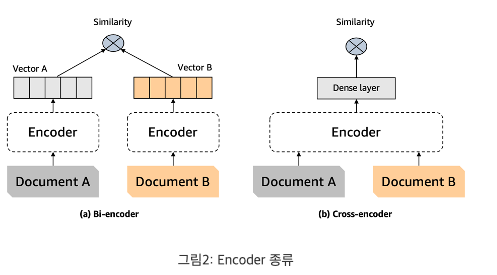

In [ ]:
!pip3 install boto3 sagemaker transformers torch -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00


In [ ]:
result_df

,정답 여부,정답,예측
P-1-1-1,O,"['O-1-1-11-7', 'P-1-1-17', 'P-1-1-21']","['O-1-1-28-4', 'O-1-1-37-3', 'O-1-1-31-6', 'O-1-1-16-4', 'P-1-1-3', 'O-1-1-25-4', 'P-1-1-10', 'P-1-1-5', 'P-1-1-60', 'P-1-1-37', 'P-1-1-33', 'P-1-1-62', 'O-1-1-25-1', 'O-1-1-27-1', 'O-1-1-11-2', 'P-1-1-2', 'P-1-1-64', 'O-1-1-37-5', 'O-1-1-30', 'P-1-1-58', 'P-1-1-59', 'P-1-1-47', 'BT-1-1-4', 'O-1-1-13-2', 'O-1-1-25-2', 'O-1-1-34-2', 'O-1-1-31-3', 'O-1-1-24-1', 'O-1-1-15-5', 'BT-1-1-5', 'BT-1-1-35', 'O-1-1-7-3', 'O-1-1-11-3', 'O-1-1-14-1', 'P-1-1-14', 'BT-1-1-34', 'BT-1-1-21', 'O-1-1-24-3', 'O-1-1-15-3', 'O-1-1-28-3']"
P-1-1-2,X,"['BT-1-1-37', 'BT-1-1-39']","['O-1-1-28-4', 'P-1-1-1', 'O-1-1-37-3', 'O-1-1-31-6', 'O-1-1-16-4', 'P-1-1-3', 'O-1-1-25-4', 'P-1-1-10', 'P-1-1-5', 'P-1-1-60', 'P-1-1-37', 'P-1-1-33', 'P-1-1-62', 'O-1-1-25-1', 'O-1-1-27-1', 'O-1-1-11-2', 'P-1-1-64', 'O-1-1-37-5', 'O-1-1-30', 'P-1-1-58', 'P-1-1-59', 'P-1-1-47', 'BT-1-1-4', 'O-1-1-13-2', 'O-1-1-25-2', 'O-1-1-34-2', 'O-1-1-31-3', 'O-1-1-24-1', 'O-1-1-15-5', 'BT-1-1-5', 'BT-1-1-35', 'O-1-1-7-3', 'O-1-1-11-3', 'O-1-1-14-1', 'P-1-1-14', 'BT-1-1-34', 'BT-1-1-21', 'O-1-1-24-3', 'O-1-1-15-3', 'O-1-1-28-3']"
P-1-1-3,X,['O-1-1-20'],"['O-1-1-28-4', 'P-1-1-1', 'O-1-1-37-3', 'O-1-1-31-6', 'O-1-1-16-4', 'O-1-1-25-4', 'P-1-1-10', 'P-1-1-5', 'P-1-1-60', 'P-1-1-37', 'P-1-1-33', 'P-1-1-62', 'O-1-1-25-1', 'O-1-1-27-1', 'O-1-1-11-2', 'P-1-1-2', 'P-1-1-64', 'O-1-1-37-5', 'O-1-1-30', 'P-1-1-58', 'P-1-1-59', 'P-1-1-47', 'BT-1-1-4', 'O-1-1-13-2', 'O-1-1-25-2', 'O-1-1-34-2', 'O-1-1-31-3', 'O-1-1-24-1', 'O-1-1-15-5', 'BT-1-1-5', 'BT-1-1-35', 'O-1-1-7-3', 'O-1-1-11-3', 'O-1-1-14-1', 'P-1-1-14', 'BT-1-1-34', 'BT-1-1-21', 'O-1-1-24-3', 'O-1-1-15-3', 'O-1-1-28-3']"
P-1-1-4,O,"['O-1-1-13-1', 'P-1-1-17']","['O-1-1-28-4', 'P-1-1-1', 'O-1-1-37-3', 'O-1-1-31-6', 'O-1-1-16-4', 'P-1-1-3', 'O-1-1-25-4', 'P-1-1-10', 'P-1-1-5', 'P-1-1-60', 'P-1-1-37', 'P-1-1-33', 'P-1-1-62', 'O-1-1-25-1', 'O-1-1-27-1', 'O-1-1-11-2', 'P-1-1-2', 'P-1-1-64', 'O-1-1-37-5', 'O-1-1-30', 'P-1-1-58', 'P-1-1-59', 'P-1-1-47', 'BT-1-1-4', 'O-1-1-13-2', 'O-1-1-25-2', 'O-1-1-34-2', 'O-1-1-31-3', 'O-1-1-24-1', 'O-1-1-15-5', 'BT-1-1-5', 'BT-1-1-35', 'O-1-1-7-3', 'O-1-1-11-3', 'O-1-1-14-1', 'P-1-1-14', 'BT-1-1-34', 'BT-1-1-21', 'O-1-1-24-3', 'O-1-1-15-3', 'O-1-1-28-3']"
P-1-1-5,O,"['BT-1-1-5', 'BT-1-1-11', 'O-1-1-24-1']","['O-1-1-28-4', 'P-1-1-1', 'O-1-1-37-3', 'O-1-1-31-6', 'O-1-1-16-4', 'P-1-1-3', 'O-1-1-25-4', 'P-1-1-10', 'P-1-1-60', 'P-1-1-37', 'P-1-1-33', 'P-1-1-62', 'O-1-1-25-1', 'O-1-1-27-1', 'O-1-1-11-2', 'P-1-1-2', 'P-1-1-64', 'O-1-1-37-5', 'O-1-1-30', 'P-1-1-58', 'P-1-1-59', 'P-1-1-47', 'BT-1-1-4', 'O-1-1-13-2', 'O-1-1-25-2', 'O-1-1-34-2', 'O-1-1-31-3', 'O-1-1-24-1', 'O-1-1-15-5', 'BT-1-1-5', 'BT-1-1-35', 'O-1-1-7-3', 'O-1-1-11-3', 'O-1-1-14-1', 'P-1-1-14', 'BT-1-1-34', 'BT-1-1-21', 'O-1-1-24-3', 'O-1-1-15-3', 'O-1-1-28-3']"
P-1-1-6,O,"['BT-1-1-37', 'BT-1-1-39']","['O-1-1-31-5', 'O-1-1-10-1', 'P-1-1-44', 'O-1-1-37-5', 'P-1-1-69', 'O-1-1-27-1', 'BT-1-1-18', 'O-1-1-17-3', 'O-1-1-17-4', 'O-1-1-35', 'O-1-1-29-4', 'P-1-1-14', 'O-1-1-37-2', 'P-1-1-19', 'O-1-1-13-2', 'O-1-1-30', 'O-1-1-29-2', 'O-1-1-6-2', 'O-1-1-15-4', 'O-1-1-28-4', 'O-1-1-28-3', 'P-1-1-40', 'O-1-1-11-1', 'O-1-1-3', 'O-1-1-16-3', 'BT-1-1-32', 'O-1-1-12', 'O-1-1-25-2', 'O-1-1-15-5', 'O-1-1-9', 'O-1-1-31-6', 'BT-1-1-36', 'O-1-1-25-3', 'O-1-1-28-2', 'BT-1-1-12', 'BT-1-1-23', 'O-1-1-31-3', 'O-1-1-5-2', 'BT-1-1-37', 'BT-1-1-1']"
P-1-1-7,O,['O-1-1-11-3'],"['O-1-1-28-4', 'P-1-1-1', 'O-1-1-37-3', 'O-1-1-31-6', 'O-1-1-16-4', 'P-1-1-3', 'O-1-1-25-4', 'P-1-1-10', 'P-1-1-5', 'P-1-1-60', 'P-1-1-37', 'P-1-1-33', 'P-1-1-62', 'O-1-1-25-1', 'O-1-1-27-1', 'O-1-1-11-2', 'P-1-1-2', 'P-1-1-64', 'O-1-1-37-5', 'O-1-1-30', 'P-1-1-58', 'P-1-1-59', 'P-1-1-47', 'BT-1-1-4', 'O-1-1-13-2', 'O-1-1-25-2', 'O-1-1-34-2', 'O-1-1-31-3', 'O-1-1-24-1', 'O-1-1-15-5', 'BT-1-1-5', 'BT-1-1-35', 'O-1-1-7-3', 'O-1-1-11-3', 'O-1-1-14-1', 'P-1-1-14', 'BT-1-1-34', 'BT-1-1-21', 'O-1-1-24-3', 'O-1-1-15-3', 'O-1-1-28-3']"
P-1-1-8,O,"['BT-1-1-6'

In [ ]:
import torch
import numpy as np
from transformers import AutoModelForSequenceClassification, AutoTokenizer

def exp_normalize(x):
    b = x.max()
    y = np.exp(x - b)
    return y / y.sum()

## Hugging Face 모델 허브에서 모델과 토크나이저 로드 ##
model_name = "Dongjin-kr/ko-reranker"
#############################################
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
model.eval()

# 문장 쌍
pairs = []
for predict in predict_top5_list
  pairs.append([query, predict])

# 모델 평가를 위한 코드
with torch.no_grad():
    inputs = tokenizer(pairs, padding=True, truncation=True, return_tensors="pt", max_length=512)
    scores = model(**inputs, return_dict=True).logits.view(-1, ).float()
    scores = exp_normalize(scores.numpy())
    print(f'first: {scores[0]}, second: {scores[1]}')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/963 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/802 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

first: 0.0001856761082308367, second: 0.9998143315315247


# Connect to ChatBot

이제 기본적인 기능 구현을 위한 로직들의 개발이 완료되었습니다. <br>
최종적으로 아래와 같은 함수를 구현해 위 모든 과정을 하나의 로직으로 통합할 수 있습니다.

In [ ]:
import requests

class Child_CompletionExecutor(CompletionExecutor):
    def _send_request(self, completion_request):
        headers = {
            'X-NCP-CLOVASTUDIO-API-KEY': self._api_key,
            'X-NCP-APIGW-API-KEY': self._api_key_primary_val,
            'X-NCP-CLOVASTUDIO-REQUEST-ID': self._request_id,
            'Content-Type': 'application/json; charset=utf-8'
        }

        # Initialize result variable
        result = None

        try:
            # Use requests.post for making an HTTP POST request
            # Base model /testapp/v1/chat-completions/HCX-002
            # Tunning model
            response = requests.post(
                f"{self._host}/testapp/v1/chat-completions/HCX-002",
                headers=headers, json=completion_request, stream=False
            )

            # Check if the request was successful (status code 200)
            if response.status_code == 200:
                result = response.json()
            else:
                print(f"Request failed with status code: {response.status_code}")
        except requests.RequestException as e:
            # Handle exceptions, log, or raise accordingly
            print(f"Request failed: {e}")

        return result


    def execute(self, completion_request):
        res = self._send_request(completion_request)

        if res['status']['code'] == '40103':
            # Check whether the token has expired and reissue the token.
            self._access_token = None
            return self.execute(completion_request)
        elif res['status']['code'] == '20000':
            return res['result']['message']['content']
        else:
            return 'Error'


In [ ]:
def pdf_chat(query: str) -> str:
    # 1. 사용자 쿼리 벡터화
    query_vector = query_embed(query)

    # 2. Hybrid Search 통해 레퍼런스 문서 반환
    query_response = index.query(
        namespace="pdf_vectors",
        top_k=10,
        include_values=True,
        include_metadata=True,
        vector=query_vector,
        filter={
            "file": {"$in": [FILE_NAME]},
        },
    )

    reference = query_response["matches"][0]["metadata"]

    # 3. 프롬프트에 레퍼런스 문서 정보와 사용자 쿼리 정보 입력
    child_completion_executor = Child_CompletionExecutor(
        host='https://clovastudio.stream.ntruss.com',
        api_key='{api_key}',
        api_key_primary_val='{api_key_primary_val}',
        request_id='{request_id}'
    )

    preset_text = [{"role": "system", "content": "\n".join([
                "Your role is to answer the user's query based on the references provided.",
                "You must base your answer solely on the references, regardless of your own knowledge, and you must include the page information in your answer.",
            ])},
            {"role": "system", "content": f"reference: {reference['text']}, page: ({int(reference['page'])})"},
            {"role": "user", "content": query}]

    request_data = {
        'messages': preset_text,
        'topP': 0.8,
        'topK': 0,
        'maxTokens': 256,
        'temperature': 0.5,
        'repeatPenalty': 5.0,
        'stopBefore': [],
        'includeAiFilters': True
    }

    # 4. LLM 생성 답변 반환
    response_text = child_completion_executor.execute(request_data)

    return response_text

In [ ]:
response = pdf_chat("What advantages do transformers have over RNNs?")

In [ ]:
response

'Transformers offer several advantages over RNNs as mentioned in the reference text:\n\n1. Significantly faster training times: Transformers can be trained much faster than architectures based on recurrent or convolutional layers due to their efficient use of attention mechanisms.\n\n2. Better performance without task-specific tuning: The Transformer model achieves better results than previously reported models, including RNNs, even without any task-specific tuning. This shows its ability to generalize well across different tasks.\n\n3. Outperforms RNNs on smaller datasets: The Transformer model outperforms the Berkeley Parser and other RNN-based models when trained only on the smaller WSJ training set of 40K sentences.\n\n4. State-of-the-art results on translation tasks: The Transformer model sets a new state of the art on both WMT 2014 English-to-German and WMT 2014 English-to-French translation tasks, achieving better results than previous models, including those using RNNs. In the 

# Future Work

본 튜토리얼에 소개된 기능 외에도 추가적으로 아래와 같은 기능을 구현해볼 수 있습니다.

- **Multi-turn Chat**: 싱글 턴 대화가 아닌 멀티 턴 대화를 이어나가기 위해 대화 이력을 관리 및 활용해볼 수 있습니다.
- **Query Refinement**: 검색 로직을 개선하기 위해 쿼리를 정제 및 강화해주는 로직을 더해볼 수 있습니다.
- **Term-based Search**: 필터, 벡터 기반 검색 외 키워드 기반 검색을 더해볼 수 있습니다.

# Contributors

- [jaechan jo](jjc12223a@gmail.com)

본 내용의 원본은 [liner-pdf-chat-tutorial](https://github.com/liner-engineering/liner-pdf-chat-tutorial) 의 Ada V2 Embedding 과 chatgpt 사용을 VoyageAI와 네이버클라우드에서 제공하는 Embedding/ Tokenizer/Segmentation API 와 Hyperclova X chatbot 을 이용하여 각색 하였습니다.